# ACM et traits communs aux clients dans une même branche

# Table des matières  <a id="sommaire" name="sommaire"></a>
        
**[I. Analyse exploratoire des données](#M1)**
- [1. Détermination du nombre de composantes principales](#M11)
    - [a) Etude de l'inertie](#M111)
- [2. Analyse des Correspondances Multiples](#M12)
    - [a) Plan factoriel de dimension 1 et 2](#M121)
    - [b) Plan factoriel de dimension 1 et 4](#M122)
    - [c) Plan factoriel de dimension 2 et 4](#M123)
    
**[II. Analyse prédictive](#M2)**
- [1. Modélisation à l'aide d'une régression logistique multiple à variable binaire](#M21)
    - [a) Modélisation](#M211)
    - [b) Courbe ROC](#M212)
- [2. Test de prédiction du taux d'attrition](#M22)
    - [a) Programme](#M221)
    - [b) Essai](#M222)

In [1]:
library(tibble)
library(dplyr) 
library(tidyr)
library(FactoMineR) 
library(factoextra) 
library(ggplot2)  
library(corrplot) # Matrice de corrélation
library(repr) 
library(reshape2)
library(EnvStats) 
library(normtest) # Test de normalité
library(Hmisc) # matrice de corrélations
library(devtools)
library(ggpubr)
library(ggcorrplot) # Graphe de corrélation
library(stats)
library(fpc)
library(caret) # matrice de confusion et validation croisée, analyse prédictive (modélisation)
library(MASS) # modèle pas à pas basé sur le critère d'Akaïke
library(pROC) # courbe ROC
library(nortest) # Test de normalité

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message

In [2]:
options(repr.matrix.max.rows = 15, repr.matrix.max.cols = 65)

In [3]:
data <- read.csv('Fichiers/dataset2.csv', header = T)
dim(data)
data

[1] 3135   24

id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,age,segment_client,var_0,branche,churn
3463,H,0,non,non,37,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,30,A4,3788.1827,NORD-OUEST,non
1463,F,0,non,non,4,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,32,B2,5108.9941,NORD-OUEST,oui
688,H,0,non,non,52,non,bail,basic,non,oui,non,non,non,non,perso,non,courrier,30.10,57,A1,13927.9081,NORD-OUEST,non
2478,H,0,non,non,4,oui,permanent,basic,non,non,non,non,non,non,pro,non,courrier,44.55,27,D1,6609.0311,NORD-OUEST,non
242,F,0,oui,oui,41,oui,permanent,basic,oui,non,non,oui,oui,oui,perso,oui,sms,74.70,71,D1,3582.7990,NORD-OUEST,non
3395,H,0,non,non,62,oui,consommation,medium,oui,oui,oui,non,non,non,pro,non,telephone,90.70,30,A4,12999.7461,NORD-OUEST,non
3150,H,0,non,non,17,non,bail,basic,non,non,non,non,non,non,pro,oui,courrier,25.65,57,C1,3925.1393,NORD-OUEST,non
1097,H,0,oui,oui,25,oui,permanent,medium,non,non,non,non,oui,oui,perso,oui,mail,90.40,34,D3,393.7576,NORD-OUEST,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,H,0,oui,non,18,oui,permanent,basic,non,non,non,non,non,non,pro,oui,telephone,44.35,37,B1,9473.085,NORD-EST,non


In [4]:
str(data)

'data.frame':	3135 obs. of  24 variables:
 $ id_client           : int  3463 1463 688 2478 242 3395 3150 1097 210 1716 ...
 $ genre               : Factor w/ 2 levels "F","H": 2 1 2 2 1 2 2 2 2 2 ...
 $ espace_client_web   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ assurance_vie       : Factor w/ 2 levels "non","oui": 1 1 1 1 2 1 1 2 1 1 ...
 $ banque_principale   : Factor w/ 2 levels "non","oui": 1 1 1 1 2 1 1 2 1 1 ...
 $ anciennete_mois     : num  37 4 52 4 41 62 17 25 2 8 ...
 $ compte_epargne      : Factor w/ 2 levels "non","oui": 2 2 1 2 2 2 1 2 2 2 ...
 $ credit_autres       : Factor w/ 3 levels "bail","consommation",..: 2 3 1 3 3 2 1 3 3 3 ...
 $ cartes_bancaires    : Factor w/ 2 levels "basic","medium": 2 2 1 1 1 2 1 2 1 1 ...
 $ compte_courant      : Factor w/ 2 levels "non","oui": 2 1 1 1 2 2 1 1 1 1 ...
 $ compte_joint        : Factor w/ 2 levels "non","oui": 1 1 2 1 1 2 1 1 1 1 ...
 $ PEA                 : Factor w/ 2 levels "non","oui": 1 1 1 1 1 2 1 1 1 1 ...
 $ assurance_auto   

In [5]:
# Conversion de l'indicateur quantitatif en qualitatif: 
data[, 'espace_client_web'] <- as.factor(data[, 'espace_client_web'])

On fractionne de 10% le dataset 'train' afin d'en créer un nouveau, dans le but uniquement de tester la fiabilité de la modélisation avec des clients "nouveaux" et des pertes de clients connues d'avance.

In [6]:
test <- data[2201:3125, ]
train <- data[1:2200, ]

In [7]:
dim(train)

[1] 2200   24

In [8]:
dim(test)

[1] 925  24

In [9]:
table(test$churn)


non oui 
553 372 

In [10]:
# Pourcentage de clients ayant résiliés leurs comptes dans le jeu de données "test": 
round(125/325*100, 2)

[1] 38.46

In [11]:
table(train$churn)


 non  oui 
1362  838 

In [12]:
# Pourcentage de clients ayant résiliés leurs comptes dans le jeu de données "train":
round(1085/2800*100, 2)

[1] 38.75

CCL: Les taux d'attrition des deux jeu de données sont équivalents.

<a href="#sommaire">Retour au sommaire</a>
# I. Analyse exploratoire des données.<a name="M1"></a>
## <span style='color:blue'>1. Détermination du nombre de composantes principales.<a name="M11"></a>
### <span style='color:brown'>Etude de l'inertie:<a name="M111"></a>

In [13]:
perte <- train[, -1]
dim(perte)
head(perte)

[1] 2200   23

genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,age,segment_client,var_0,branche,churn
H,0,non,non,37,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,30,A4,3788.183,NORD-OUEST,non
F,0,non,non,4,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,32,B2,5108.994,NORD-OUEST,oui
H,0,non,non,52,non,bail,basic,non,oui,non,non,non,non,perso,non,courrier,30.10,57,A1,13927.908,NORD-OUEST,non
H,0,non,non,4,oui,permanent,basic,non,non,non,non,non,non,pro,non,courrier,44.55,27,D1,6609.031,NORD-OUEST,non
F,0,oui,oui,41,oui,permanent,basic,oui,non,non,oui,oui,oui,perso,oui,sms,74.70,71,D1,3582.799,NORD-OUEST,non
H,0,non,non,62,oui,consommation,medium,oui,oui,oui,non,non,non,pro,non,telephone,90.70,30,A4,12999.746,NORD-OUEST,non


In [14]:
# On place churn en variable qualitative supplémentaire:
mca <- MCA(perte, ncp = 8, quali.sup = 22, quanti.sup = c(5, 18, 19, 21))

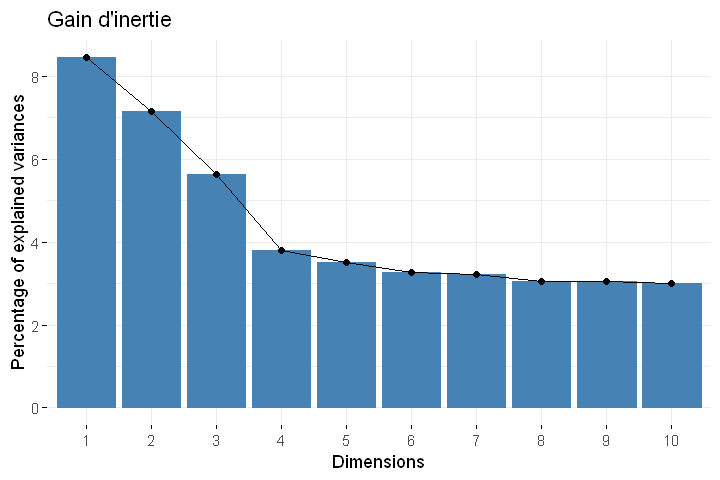

In [15]:
options(repr.plot.width = 6, repr.plot.height = 4)
fviz_eig(mca, addlabels = F, main = 'Gain d\'inertie')

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>2. Analyse des Correspondances Multiples.<a name="M12"></a>

In [16]:
mca <- MCA(perte, ncp = 4, quali.sup = 22, quanti.sup = c(5, 18, 19, 21))

In [17]:
var <- get_mca_var(mca)

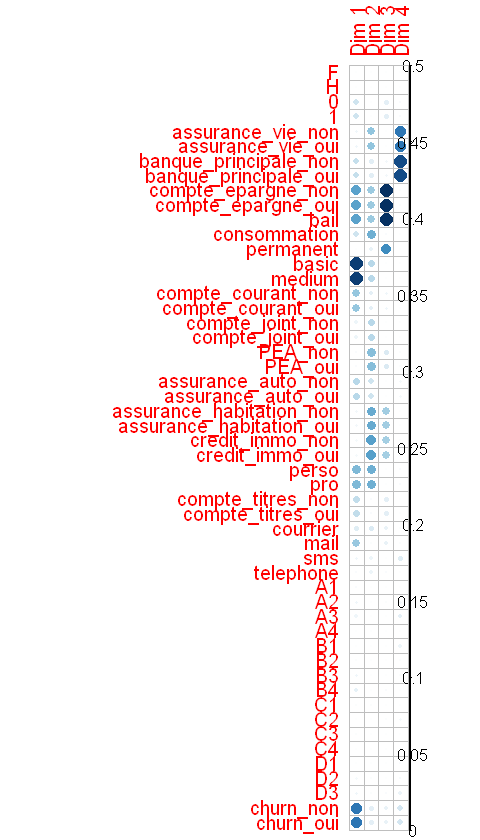

In [18]:
options(repr.plot.width = 4, repr.plot.height = 7)
corrplot(var$cos2, is.corr = F)

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>a) Plan factoriel de dimension 1 et 2.<a name="M121"></a>

# Graphes des modalités et des individus:

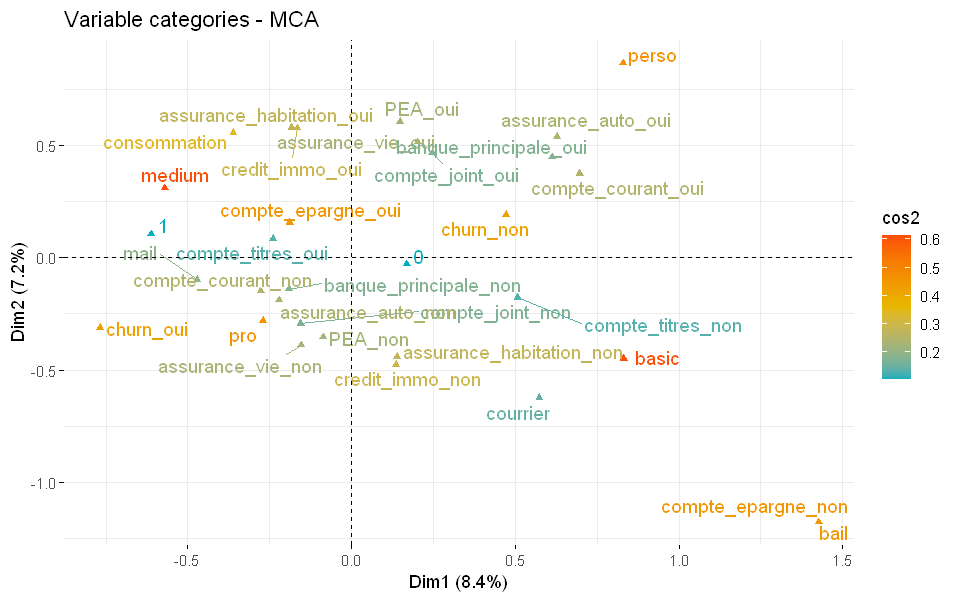

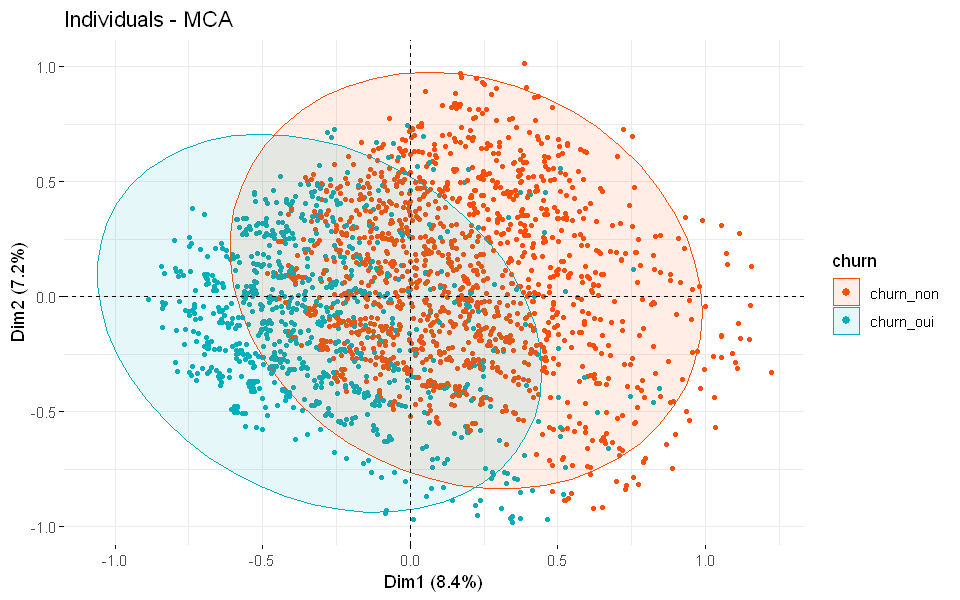

In [19]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_var(mca, axes = c(1, 2), col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE,
            select.var = list(cos2 = 0.1))

fviz_mca_ind (mca, axes = c(1, 2), geom = c('point'), habillage = 23, pointsize = 1, labelsize = 3, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = TRUE, ellipse.level = 0.95)

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>b) Plan factoriel de dimension 1 et 4.<a name="M122"></a>

# Graphes des modalités et des individus:

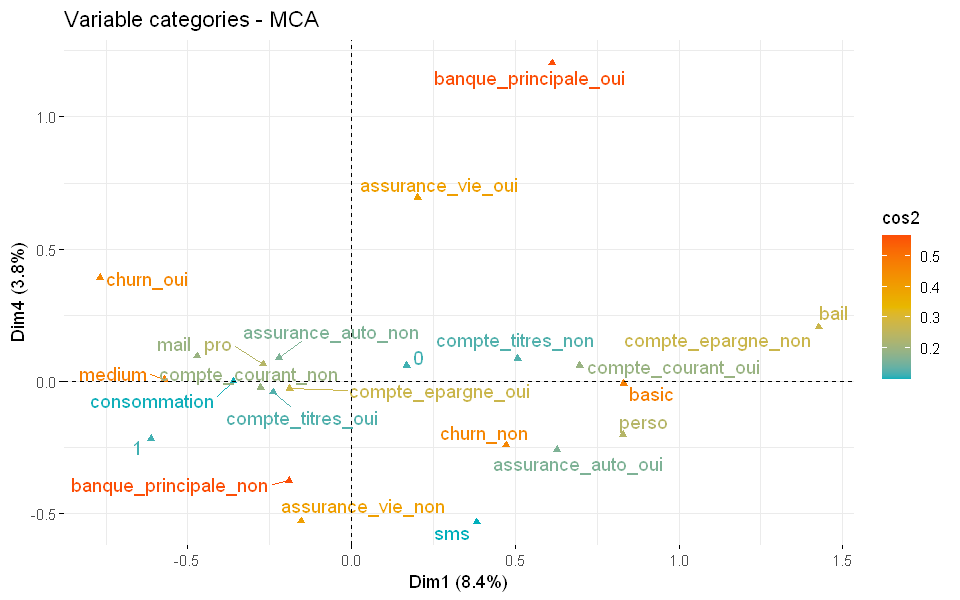

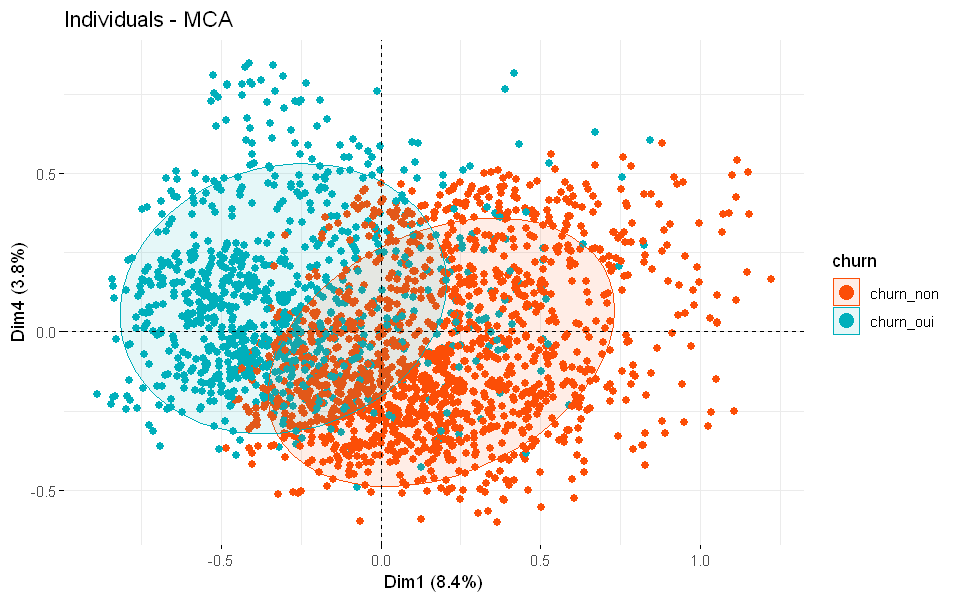

In [20]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_var(mca, axes = c(1, 4), col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE,
            select.var = list(cos2 = 0.1))

fviz_mca_ind (mca, axes = c(1, 4), geom = c('point'), habillage = 23, pointsize = 2, labelsize = 3, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = TRUE, ellipse.level = 0.75)

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:brown'>c) Plan factoriel de dimension 2 et 4.<a name="M123"></a>

# Graphes des modalités et des individus:

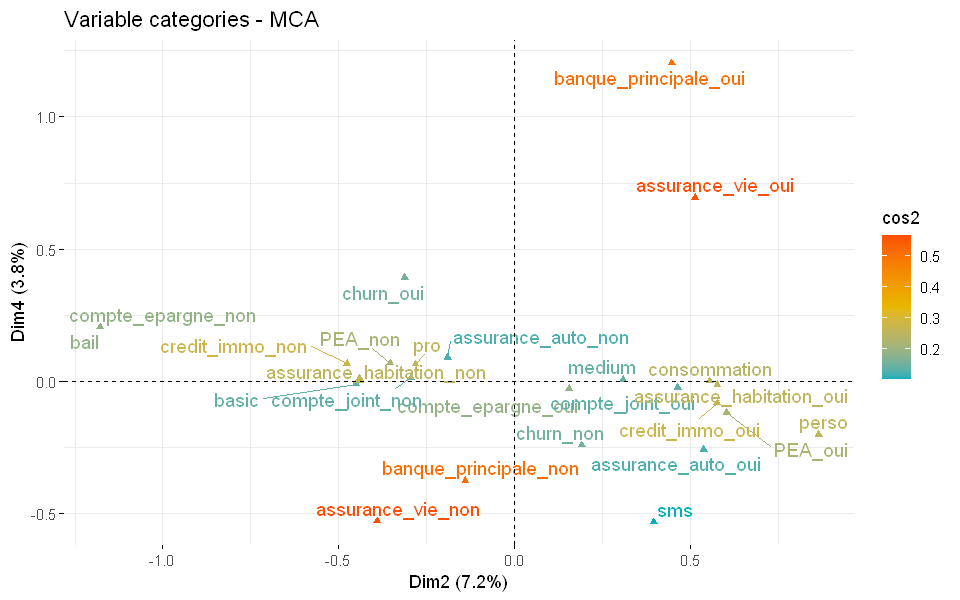

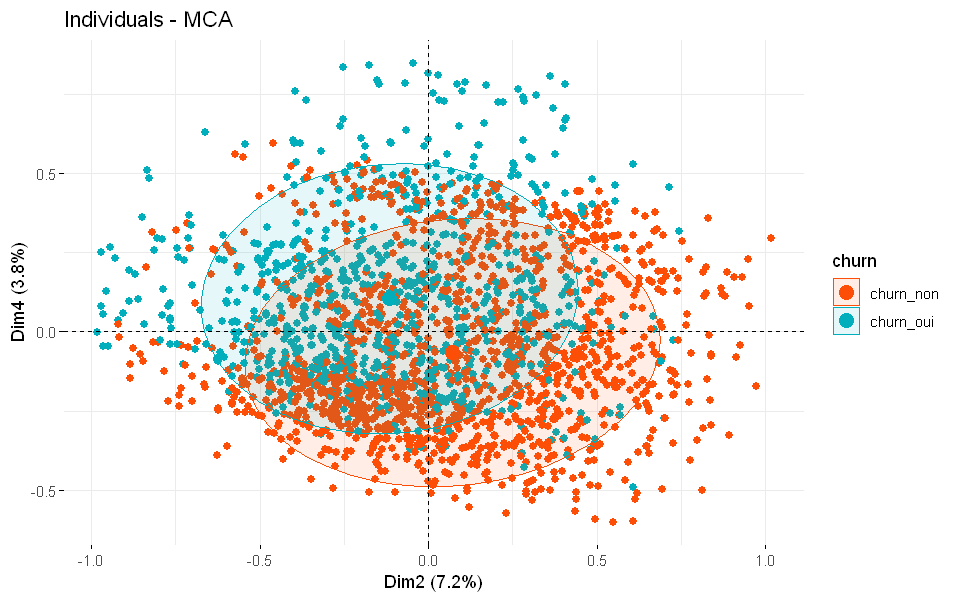

In [21]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_mca_var(mca, axes = c(2, 4), col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE,
             select.var = list(cos2 = 0.1))

fviz_mca_ind (mca, axes = c(2, 4), geom = c('point'), habillage = 23, pointsize = 2, labelsize = 3, 
              palette = c("#FC4E07", "#00AFBB"), addEllipses = TRUE, ellipse.level = 0.75)

<a href="#sommaire">Retour au sommaire</a>
# II. Analyse prédictive.<a name="M2"></a>
## <span style='color:blue'>1. Modélisation à l'aide d'une régression logistique multiple à variable binaire.<a name="M21"></a>
### <span style='color:brown'>a) Modélisation.<a name="M211"></a>

La banque est divisée en 6 branches, dont les processus de traitement de clients et les approches commerciales peuvent varier.<br/>
On divise donc notre jeu de données en fonction des branches indiquées.

In [22]:
branche1 <- train[which(train$branche == 'NORD-OUEST'), -23]
dim(branche1)

[1] 415  23

In [23]:
branche2 <- train[which(train$branche == 'NORD-EST'), -23]
dim(branche2)

[1] 367  23

In [24]:
branche3 <- train[which(train$branche == 'CENTRE'), -23]
dim(branche3)

[1] 362  23

In [25]:
branche4 <- train[which(train$branche == 'SUD-OUEST'), -23]
dim(branche4)

[1] 360  23

In [26]:
branche5 <- train[which(train$branche == 'SUD-EST'), -23]
dim(branche5)

[1] 344  23

In [27]:
branche6 <- train[which(train$branche == 'OUTRE-MER'), -23]
dim(branche6)

[1] 352  23

In [28]:
perte1 <- branche1[, -1]
perte2 <- branche2[, -1]
perte3 <- branche3[, -1]
perte4 <- branche4[, -1]
perte5 <- branche5[, -1]
perte6 <- branche6[, -1]

In [29]:
# Paramétrage du processus d'apprentissage par validation croisée stratifiée:
train.control <- trainControl(method = "cv", number = 10)

In [30]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model1 <- train(churn ~ ., data = perte1, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model1

Start:  AIC=398.29
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=398.29
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- credit_immooui             1   324.32 390.32
- segment_clientB1           1   324.34 390.34
- credit_autresconsommation  1   324.35 390.35
- cartes_bancairesmedium     1   324.37 390.37
- genreH                     1   324.38 390.38
- segment_clientA4           1   324.48 390.48
- segment_clientC2           1   324.52 390.52
- segment_clientD1           1   324.61 390.61
- segment_clientC4           1   324.66 390.66
- compte_courantoui          1   324.71 390.71
- methode_contactsms         1   324.81 390.81
- compte_titresoui           1   324.90 390.90
- segment_clientC3           1   325.07 391.07
- assurance_vieoui           1   325.13 391.13
- espace_client_web1         1   325.45 391.45
- methode_contacttelephone   1   325.50 391.50
- segment_clientC1           1   325.72 391.72
- agios_6mois                1   326.05 392.05
- assurance_autooui          1   326.28 392.28
<none>                           324.31 392.31
- methode_con


Step:  AIC=384.45
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + assurance_autooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- cartes_bancairesmedium    1   324.59 382.59
- segment_clientA4          1   324.59 382.59
- segment_clientD1          1   324.73 382.73
- segment_clientC4          1   324.77 382.77
- compte_courantoui         1   324.81 382.81
- segment_clientC2          1   324.85 382.85
- methode_contactsms        1   324.94 382.94
- compte_titresoui     

                           Df Deviance    AIC
- methode_contactsms        1   325.48 375.48
- compte_courantoui         1   325.52 375.52
- compte_titresoui          1   325.75 375.75
- assurance_vieoui          1   325.89 375.89
- methode_contacttelephone  1   326.07 376.07
- segment_clientC1          1   326.08 376.08
- espace_client_web1        1   326.13 376.13
- segment_clientC2          1   326.22 376.22
<none>                          325.00 377.00
- assurance_autooui         1   327.01 377.01
- methode_contactmail       1   327.27 377.27
- segment_clientC3          1   327.30 377.30
- segment_clientB2          1   327.59 377.59
- typepro                   1   327.84 377.84
- compte_epargneoui         1   328.66 378.66
- banque_principaleoui      1   329.90 379.90
- anciennete_mois           1   330.81 380.81
- agios_6mois               1   332.80 382.80
- segment_clientB4          1   333.08 383.08
- age                       1   333.86 383.86
- segment_clientA2          1   33


Step:  AIC=368.76
.outcome ~ espace_client_web1 + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + assurance_autooui + typepro + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                       Df Deviance    AIC
- segment_clientC2      1   330.09 368.09
- methode_contactmail   1   330.41 368.41
- espace_client_web1    1   330.60 368.60
<none>                      328.76 368.76
- assurance_autooui     1   330.93 368.93
- segment_clientB2      1   330.94 368.94
- typepro               1   331.44 369.44
- segment_clientC3      1   331.47 369.47
- banque_principaleoui  1   331.98 369.98
- compte_epargneoui     1   333.21 371.21
- anciennete_mois       1   333.81 371.81
- segment_clientB4      1   336.32 374.32
- age                   1   337.12 375.12
- segment_clientA3      1


Step:  AIC=391.17
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_immooui             1   321.18 389.18
- PEAoui                     1   321.20 389.20
- compte_jointoui            1   321.23 389.23
- segment_clientB1           1   321.30 389.30
- genreH                     1   321.35 389.35
- segment_clientC4     


Step:  AIC=383.37
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + assurance_autooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_vieoui           1   321.56 381.56
- credit_autresconsommation  1   321.57 381.57
- genreH                     1   321.60 381.60
- compte_courantoui          1   321.68 381.68
- segment_clientC4           1   321.68 381.68
- methode_contactsms         1   321.69 381.69
- cartes_bancairesmedium     1   321.70 381.

                           Df Deviance    AIC
- methode_contactsms        1   322.63 374.63
- segment_clientC3          1   322.66 374.66
- segment_clientC4          1   322.70 374.70
- compte_courantoui         1   322.85 374.85
- segment_clientA4          1   322.89 374.89
- segment_clientC2          1   323.07 375.07
- segment_clientC1          1   323.48 375.48
- methode_contacttelephone  1   323.79 375.79
- compte_titresoui          1   323.83 375.83
- assurance_autooui         1   323.87 375.87
- compte_epargneoui         1   323.90 375.90
<none>                          322.34 376.34
- methode_contactmail       1   324.70 376.70
- typepro                   1   325.00 377.00
- espace_client_web1        1   325.16 377.16
- agios_6mois               1   325.58 377.58
- segment_clientB2          1   325.91 377.91
- anciennete_mois           1   326.26 378.26
- age                       1   329.26 381.26
- segment_clientB4          1   331.03 383.03
- banque_principaleoui      1   33

                           Df Deviance    AIC
- segment_clientA4          1   325.86 367.86
- methode_contacttelephone  1   326.06 368.06
- compte_titresoui          1   326.07 368.07
- assurance_autooui         1   326.13 368.13
- segment_clientC1          1   326.49 368.49
- compte_epargneoui         1   326.68 368.68
<none>                          324.88 368.88
- typepro                   1   327.38 369.38
- methode_contactmail       1   327.42 369.42
- espace_client_web1        1   327.74 369.74
- anciennete_mois           1   328.65 370.65
- agios_6mois               1   328.91 370.91
- segment_clientB2          1   329.24 371.24
- age                       1   331.61 373.61
- banque_principaleoui      1   333.64 375.64
- segment_clientB4          1   334.04 376.04
- segment_clientA2          1   337.72 379.72
- segment_clientA3          1   338.07 380.07
- var_0                     1   341.23 383.23
- segment_clientB3          1   342.16 384.16
- segment_clientD3          1   34

Start:  AIC=393.22
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=393.22
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- genreH                     1   319.39 385.39
- assurance_habitationoui    1   319.53 385.53
- segment_clientC3           1   319.54 385.54
- credit_immooui             1   319.59 385.59
- methode_contactsms         1   319.63 385.63
- credit_autresconsommation  1   319.81 385.81
- cartes_bancairesmedium     1   319.86 385.86
- segment_clientC4           1   319.87 385.87
- compte_jointoui            1   319.92 385.92
- segment_clientB1           1   319.96 385.96
- assurance_vieoui           1   320.10 386.10
- espace_client_web1         1   320.12 386.12
- compte_titresoui           1   320.30 386.30
- segment_clientD1           1   320.55 386.55
- segment_clientA4           1   320.56 386.56
- methode_contacttelephone   1   320.64 386.64
<none>                           319.32 387.32
- typepro                    1   321.88 387.88
- methode_contactmail        1   322.16 388.16
- agios_6mois                1   322.19 388.19
- compte_epar


Step:  AIC=379.94
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    compte_jointoui + assurance_autooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC3           1   320.12 378.12
- methode_contactsms         1   320.18 378.18
- credit_autresconsommation  1   320.22 378.22
- compte_jointoui            1   320.28 378.28
- segment_clientB1           1   320.46 378.46
- segment_clientC4           1   320.47 378.47
- espace_client_web1         1   320.63 378.63
- assurance_vi

                           Df Deviance    AIC
- espace_client_web1        1   321.80 371.80
- segment_clientB1          1   321.88 371.88
- assurance_vieoui          1   321.92 371.92
- segment_clientC4          1   321.94 371.94
- compte_titresoui          1   321.97 371.97
- methode_contacttelephone  1   322.42 372.42
- segment_clientD1          1   322.72 372.72
- segment_clientA4          1   322.82 372.82
<none>                          321.05 373.05
- typepro                   1   323.45 373.45
- assurance_autooui         1   324.47 374.47
- methode_contactmail       1   324.60 374.60
- compte_epargneoui         1   324.69 374.69
- banque_principaleoui      1   324.85 374.85
- age                       1   325.36 375.36
- segment_clientC1          1   326.34 376.34
- anciennete_mois           1   327.51 377.51
- segment_clientB2          1   328.35 378.35
- agios_6mois               1   329.76 379.76
- segment_clientA2          1   329.98 379.98
- segment_clientB4          1   33


Step:  AIC=366.34
.outcome ~ banque_principaleoui + anciennete_mois + compte_epargneoui + 
    assurance_autooui + typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientD1          1   327.26 365.26
- methode_contacttelephone  1   327.52 365.52
<none>                          326.34 366.34
- typepro                   1   329.36 367.36
- assurance_autooui         1   329.42 367.42
- segment_clientC1          1   329.67 367.67
- banque_principaleoui      1   329.74 367.74
- age                       1   330.07 368.07
- compte_epargneoui         1   330.58 368.58
- methode_contactmail       1   330.85 368.85
- anciennete_mois           1   331.97 369.97
- segment_clientB2          1   332.07 370.07
- segment


Step:  AIC=386.03
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   316.03 384.03
- compte_courantoui          1   316.03 384.03
- agios_6mois                1   316.03 384.03
- assurance_habitationoui    1   316.05 384.05
- compte_jointoui            1   316.13 384.13
- credit_immooui


Step:  AIC=378.17
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- compte_jointoui           1   316.29 376.29
- segment_clientC2          1   316.37 376.37
- segment_clientC3          1   316.52 376.52
- methode_contactsms        1   316.66 376.66
- methode_contacttelephone  1   316.71 376.71
- assurance_vieoui          1   316.73 376.73
- credit_immooui            1   316.77 376.77
- PEAoui               

                           Df Deviance    AIC
- methode_contacttelephone  1   317.46 369.46
- assurance_vieoui          1   317.81 369.81
- credit_immooui            1   318.07 370.07
- PEAoui                    1   318.13 370.13
- anciennete_mois           1   318.22 370.22
- compte_titresoui          1   318.36 370.36
- segment_clientA4          1   318.60 370.60
- genreH                    1   318.74 370.74
- compte_epargneoui         1   318.98 370.98
- espace_client_web1        1   319.08 371.08
- segment_clientC4          1   319.23 371.23
<none>                          317.28 371.28
- segment_clientC1          1   319.49 371.49
- banque_principaleoui      1   319.57 371.57
- assurance_autooui         1   319.63 371.63
- methode_contactmail       1   320.32 372.32
- typepro                   1   320.75 372.75
- cartes_bancairesmedium    1   321.44 373.44
- segment_clientB2          1   321.55 373.55
- age                       1   326.32 378.32
- segment_clientB4          1   32


Step:  AIC=363.29
.outcome ~ espace_client_web1 + banque_principaleoui + compte_epargneoui + 
    cartes_bancairesmedium + assurance_autooui + typepro + compte_titresoui + 
    methode_contactmail + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                         Df Deviance    AIC
- segment_clientA4        1   322.48 362.48
- compte_titresoui        1   322.73 362.73
- segment_clientC1        1   323.03 363.03
- compte_epargneoui       1   323.14 363.14
- segment_clientC4        1   323.22 363.22
<none>                        321.29 363.29
- assurance_autooui       1   323.42 363.42
- espace_client_web1      1   323.71 363.71
- banque_principaleoui    1   323.94 363.94
- methode_contactmail     1   325.01 365.01
- segment_clientB2        1   325.75 365.75
- cartes_bancairesmedium  1   327.17 367.17
- typepro 

                            Df Deviance    AIC
- cartes_bancairesmedium     1   323.87 395.87
- genreH                     1   323.89 395.89
- assurance_habitationoui    1   323.90 395.90
- PEAoui                     1   323.90 395.90
- methode_contactsms         1   323.92 395.92
- credit_immooui             1   323.92 395.92
- segment_clientD1           1   323.97 395.97
- segment_clientB1           1   323.98 395.98
- compte_jointoui            1   323.98 395.98
- segment_clientA4           1   324.03 396.03
- segment_clientC1           1   324.14 396.14
- credit_autresconsommation  1   324.20 396.20
- segment_clientC4           1   324.23 396.23
- agios_6mois                1   324.29 396.29
- compte_courantoui          1   324.42 396.42
- methode_contacttelephone   1   324.60 396.60
- segment_clientC3           1   324.73 396.73
- assurance_autooui          1   325.15 397.15
- compte_epargneoui          1   325.21 397.21
- methode_contactmail        1   325.26 397.26
- segment_cli


Step:  AIC=389.95
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    compte_courantoui + compte_jointoui + assurance_autooui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactsms         1   324.00 388.00
- segment_clientD1           1   324.04 388.04
- segment_clientB1           1   324.05 388.05
- segment_clientA4           1   324.12 388.12
- credit_immooui             1   324.14 388.14
- segment_clientC1           1   324.20 388.20



Step:  AIC=382.28
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    compte_courantoui + compte_jointoui + assurance_autooui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC4           1   324.42 380.42
- credit_immooui             1   324.47 380.47
- compte_jointoui            1   324.59 380.59
- segment_clientB1           1   324.86 380.86
- credit_autresconsommation  1   324.89 380.89
- compte_courantoui          1   324.98 380.98
- methode_contacttelephone   1   325.06 381.06
- segment_clientB2           1   325


Step:  AIC=374.08
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + compte_courantoui + 
    assurance_autooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- methode_contacttelephone  1   326.98 372.98
- compte_courantoui         1   327.02 373.02
- compte_titresoui          1   327.62 373.62
- segment_clientB2          1   327.63 373.63
- assurance_autooui         1   327.94 373.94
- espace_client_web1        1   328.01 374.01
- assurance_vieoui          1   328.06 374.06
- methode_contactmail       1   328.07 374.07
<none>                          326.08 374.08
- typepro                   1   328.64 374.64
- segment_clientC


Step:  AIC=369.5
.outcome ~ espace_client_web1 + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + assurance_autooui + typepro + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                       Df Deviance    AIC
- assurance_autooui     1   335.20 369.20
<none>                      333.50 369.50
- typepro               1   336.40 370.40
- segment_clientC3      1   336.41 370.41
- anciennete_mois       1   337.21 371.21
- banque_principaleoui  1   337.39 371.39
- espace_client_web1    1   337.48 371.48
- segment_clientC2      1   337.48 371.48
- compte_epargneoui     1   337.89 371.89
- age                   1   339.96 373.96
- segment_clientB4      1   340.07 374.07
- segment_clientA3      1   342.41 376.41
- segment_clientD2      1   344.35 378.35
- agios_6mois           1   345.11 379.11
- segment_clientA2      1   34

                            Df Deviance    AIC
- segment_clientB1           1   323.91 391.91
- compte_jointoui            1   323.91 391.91
- segment_clientC2           1   323.92 391.92
- genreH                     1   323.93 391.93
- methode_contactsms         1   323.96 391.96
- methode_contacttelephone   1   323.96 391.96
- credit_autresconsommation  1   323.99 391.99
- cartes_bancairesmedium     1   324.01 392.01
- espace_client_web1         1   324.01 392.01
- credit_immooui             1   324.02 392.02
- PEAoui                     1   324.11 392.11
- agios_6mois                1   324.49 392.49
- segment_clientA4           1   324.51 392.51
- compte_courantoui          1   324.61 392.61
- compte_titresoui           1   324.76 392.76
- segment_clientD1           1   324.90 392.90
- anciennete_mois            1   325.46 393.46
- compte_epargneoui          1   325.72 393.72
<none>                           323.91 393.91
- methode_contactmail        1   326.43 394.43
- segment_cli


Step:  AIC=385.97
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_autooui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   324.02 384.02
- methode_contactsms         1   324.03 384.03
- credit_autresconsommation  1   324.06 384.06
- espace_client_web1         1   324.07 384.07
- cartes_bancairesmedium     1   324.09 384.09
- credit_immooui             1   324.11 384.11
- PEAoui                     1   324.19 384.19

                         Df Deviance    AIC
- credit_immooui          1   324.63 376.63
- cartes_bancairesmedium  1   324.65 376.65
- PEAoui                  1   324.70 376.70
- agios_6mois             1   324.89 376.89
- segment_clientA4        1   325.10 377.10
- compte_courantoui       1   325.26 377.26
- compte_titresoui        1   325.27 377.27
- segment_clientD1        1   325.93 377.93
- compte_epargneoui       1   326.28 378.28
- anciennete_mois         1   326.29 378.29
<none>                        324.41 378.41
- segment_clientC4        1   327.58 379.58
- typepro                 1   327.72 379.72
- segment_clientC1        1   327.86 379.86
- assurance_vieoui        1   327.90 379.90
- assurance_autooui       1   328.10 380.10
- banque_principaleoui    1   328.74 380.74
- age                     1   329.43 381.43
- methode_contactmail     1   330.70 382.70
- segment_clientB2        1   331.39 383.39
- segment_clientB4        1   336.61 388.61
- segment_clientA2        1   33


Step:  AIC=368.79
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + assurance_autooui + typepro + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                       Df Deviance    AIC
- segment_clientD1      1   327.97 367.97
- anciennete_mois       1   328.62 368.62
<none>                      326.79 368.79
- segment_clientC4      1   329.47 369.47
- segment_clientC1      1   329.61 369.61
- typepro               1   330.07 370.07
- assurance_vieoui      1   330.41 370.41
- compte_epargneoui     1   330.66 370.66
- banque_principaleoui  1   330.90 370.90
- assurance_autooui     1   331.28 371.28
- age                   1   332.06 372.06
- segment_clientB2      1   333.02 373.02
- methode_contactmail   1   333.50 373.50
- agios_


Step:  AIC=394.68
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- PEAoui                     1   324.69 392.69
- credit_immooui             1   324.70 392.70
- credit_autresconsommation  1   324.70 392.70
- cartes_bancairesmedium     1   324.72 392.72
- segment_clientB1           1   324.73 392.73
- segmen


Step:  AIC=386.79
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + compte_courantoui + 
    compte_jointoui + assurance_autooui + credit_immooui + typepro + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- methode_contactsms        1   324.89 384.89
- segment_clientD1          1   324.90 384.90
- credit_immooui            1   324.98 384.98
- segment_clientC3          1   325.00 385.00
- compte_jointoui           1   325.03 385.03
- compte_courantoui         1   325.17 385.17
- assurance_vieoui          1   325.17 385.17
- segmen

                           Df Deviance    AIC
- compte_courantoui         1   325.84 377.84
- segment_clientC3          1   325.91 377.91
- assurance_vieoui          1   325.95 377.95
- segment_clientA4          1   326.02 378.02
- methode_contacttelephone  1   326.32 378.32
- segment_clientC2          1   326.39 378.39
- segment_clientC1          1   326.39 378.39
- segment_clientC4          1   327.15 379.15
- compte_titresoui          1   327.42 379.42
<none>                          325.49 379.49
- espace_client_web1        1   327.49 379.49
- methode_contactmail       1   327.94 379.94
- compte_epargneoui         1   328.44 380.44
- typepro                   1   328.44 380.44
- segment_clientB2          1   328.47 380.47
- anciennete_mois           1   328.57 380.57
- assurance_autooui         1   329.01 381.01
- banque_principaleoui      1   329.07 381.07
- agios_6mois               1   330.75 382.75
- age                       1   331.67 383.67
- segment_clientB4          1   33

                       Df Deviance    AIC
- segment_clientA4      1   329.09 371.09
- compte_titresoui      1   329.50 371.50
- segment_clientC1      1   329.57 371.57
- methode_contactmail   1   329.81 371.81
<none>                      327.99 371.99
- segment_clientC4      1   330.41 372.41
- anciennete_mois       1   330.56 372.56
- banque_principaleoui  1   330.63 372.63
- espace_client_web1    1   330.73 372.73
- typepro               1   331.26 373.26
- assurance_autooui     1   331.27 373.27
- compte_epargneoui     1   331.36 373.36
- segment_clientB2      1   332.07 374.07
- age                   1   333.70 375.70
- agios_6mois           1   334.27 376.27
- segment_clientB4      1   335.42 377.42
- segment_clientA3      1   336.24 378.24
- segment_clientD2      1   339.79 381.79
- segment_clientA2      1   342.25 384.25
- segment_clientD3      1   344.47 386.47
- var_0                 1   346.81 388.81
- segment_clientB3      1   347.98 389.98

Step:  AIC=371.09
.outcome ~ espa

                            Df Deviance    AIC
- segment_clientB1           1   315.56 387.56
- credit_immooui             1   315.57 387.57
- credit_autresconsommation  1   315.57 387.57
- assurance_habitationoui    1   315.58 387.58
- compte_jointoui            1   315.59 387.59
- PEAoui                     1   315.59 387.59
- cartes_bancairesmedium     1   315.62 387.62
- segment_clientC2           1   315.68 387.68
- segment_clientD1           1   315.70 387.70
- segment_clientC3           1   315.84 387.84
- segment_clientA4           1   316.11 388.11
- genreH                     1   316.22 388.22
- agios_6mois                1   316.25 388.25
- compte_courantoui          1   316.42 388.42
- segment_clientC4           1   316.54 388.54
- segment_clientC1           1   316.90 388.90
- compte_epargneoui          1   317.24 389.24
- assurance_autooui          1   317.25 389.25
- compte_titresoui           1   317.47 389.47
- assurance_vieoui           1   317.51 389.51
<none>       


Step:  AIC=381.6
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_autooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- PEAoui                     1   315.61 379.61
- credit_autresconsommation  1   315.64 379.64
- cartes_bancairesmedium     1   315.64 379.64
- segment_clientC2           1   315.72 379.72
- segment_clientD1           1   315.83 379.83
- segment_clientC3           1   315.96 379.96
- genreH    


Step:  AIC=373.84
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + compte_courantoui + 
    assurance_autooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- segment_clientC3          1   316.09 372.09
- segment_clientD1          1   316.28 372.28
- genreH                    1   316.55 372.55
- segment_clientA4          1   316.99 372.99
- compte_courantoui         1   317.32 373.32
- assurance_autooui         1   317.70 373.70
- compte_titresoui          1   317.76 373.76
- assurance_vieoui          1   317.76 373.76
- methode_co


Step:  AIC=368.2
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + assurance_autooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- assurance_autooui         1   321.48 367.48
- compte_titresoui          1   321.65 367.65
- segment_clientC4          1   321.88 367.88
- assurance_vieoui          1   322.12 368.12
<none>                          320.20 368.20
- methode_contactsms        1   322.21 368.21
- segment_clientC1          1   322.46 368.46
- typepro                   1   322.79 368.79
- compte_epargneoui         1   323.08 369.08
- segment_clientB2          1   323.46 369.46
- methode_contact

Start:  AIC=395.35
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=395.35
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- agios_6mois                1   321.37 387.37
- compte_epargneoui          1   321.40 387.40
- credit_autresconsommation  1   321.41 387.41
- methode_contactsms         1   321.41 387.41
- cartes_bancairesmedium     1   321.49 387.49
- compte_jointoui            1   321.56 387.56
- segment_clientC3           1   321.57 387.57
- genreH                     1   321.68 387.68
- methode_contacttelephone   1   321.76 387.76
- compte_courantoui          1   321.79 387.79
- credit_immooui             1   321.79 387.79
- segment_clientC2           1   321.79 387.79
- segment_clientC4           1   321.89 387.89
- assurance_habitationoui    1   321.96 387.96
- segment_clientC1           1   322.04 388.04
- PEAoui                     1   322.32 388.32
- segment_clientB2           1   322.48 388.48
- espace_client_web1         1   322.50 388.50
- assurance_vieoui           1   322.77 388.77
- assurance_autooui          1   322.90 388.90
- methode_con

                           Df Deviance    AIC
- compte_jointoui           1   321.87 379.87
- genreH                    1   321.99 379.99
- compte_epargneoui         1   322.02 380.02
- methode_contacttelephone  1   322.04 380.04
- segment_clientC2          1   322.05 380.05
- compte_courantoui         1   322.12 380.12
- segment_clientC4          1   322.36 380.36
- cartes_bancairesmedium    1   322.39 380.39
- segment_clientC1          1   322.52 380.52
- credit_immooui            1   322.61 380.61
- espace_client_web1        1   322.88 380.88
- assurance_habitationoui   1   322.91 380.91
- segment_clientB2          1   323.00 381.00
- assurance_vieoui          1   323.04 381.04
- PEAoui                    1   323.19 381.19
<none>                          321.66 381.66
- assurance_autooui         1   323.90 381.90
- anciennete_mois           1   324.05 382.05
- methode_contactmail       1   324.78 382.78
- compte_titresoui          1   325.02 383.02
- typepro                   1   32


Step:  AIC=373.32
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- compte_epargneoui        1   323.74 371.74
- credit_immooui           1   324.08 372.08
- segment_clientC4         1   324.20 372.20
- cartes_bancairesmedium   1   324.20 372.20
- segment_clientC1         1   324.24 372.24
- espace_client_web1       1   324.51 372.51
- assurance_habitationoui  1   324.55 372.55
- PEAoui                   1   324.71 372.71
- assurance_vieoui         1   324.75 372.75
- segment_clientB2         1   324.77 372.77
- ancie


Step:  AIC=365.86
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + PEAoui + assurance_autooui + assurance_habitationoui + 
    typepro + compte_titresoui + methode_contactmail + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- anciennete_mois          1   328.84 364.84
- assurance_vieoui         1   329.29 365.29
- espace_client_web1       1   329.30 365.30
- PEAoui                   1   329.62 365.62
<none>                         327.86 365.86
- assurance_autooui        1   330.01 366.01
- assurance_habitationoui  1   330.44 366.44
- methode_contactmail      1   331.16 367.16
- compte_titresoui         1   331.95 367.95
- typepro                  1   333.36 369.36
- banque_principaleoui     1   334.74 370.74
- age                      1   335.71 371.71
- segment_clientA2         1   336.14 372.14
-

                            Df Deviance    AIC
- segment_clientC3           1   321.70 391.70
- assurance_habitationoui    1   321.81 391.81
- assurance_vieoui           1   321.88 391.88
- methode_contactsms         1   321.92 391.92
- segment_clientA4           1   321.95 391.95
- segment_clientB1           1   321.97 391.97
- segment_clientD1           1   322.00 392.00
- compte_jointoui            1   322.01 392.01
- genreH                     1   322.05 392.05
- compte_epargneoui          1   322.18 392.18
- credit_autresconsommation  1   322.20 392.20
- PEAoui                     1   322.28 392.28
- cartes_bancairesmedium     1   322.50 392.50
- segment_clientC2           1   322.80 392.80
- compte_courantoui          1   322.82 392.82
- compte_titresoui           1   322.86 392.86
- segment_clientC4           1   323.08 393.08
- credit_immooui             1   323.15 393.15
- assurance_autooui          1   323.30 393.30
- segment_clientC1           1   323.62 393.62
<none>       


Step:  AIC=386.25
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contacttelephone + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- compte_jointoui            1   322.56 384.56
- genreH                     1   322.58 384.58
- segment_clientA4           1   322.65 384.65
- segment_clientB1           1   322.66 384.66
- credit_autresconsommation  1   322.74 384.74
- compte_epargneoui          1   322.74 384.74
- segment_clientD1           1


Step:  AIC=379.42
.outcome ~ espace_client_web1 + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + PEAoui + assurance_autooui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB1           1   323.57 377.57
- credit_autresconsommation  1   323.90 377.90
- PEAoui                     1   323.91 377.91
- compte_epargneoui          1   323.99 377.99
- cartes_bancairesmedium     1   324.54 378.54
- compte_courantoui          1   324.58 378.58
- compte_titresoui           1   324.59 378.59
- credit_immooui             1   324.76 378.76
- segment_c


Step:  AIC=371.88
.outcome ~ espace_client_web1 + banque_principaleoui + anciennete_mois + 
    cartes_bancairesmedium + assurance_autooui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- compte_titresoui          1   326.79 370.79
- cartes_bancairesmedium    1   327.01 371.01
- segment_clientC4          1   327.13 371.13
- assurance_autooui         1   327.25 371.25
- anciennete_mois           1   327.36 371.36
- segment_clientC1          1   327.47 371.47
- credit_immooui            1   327.47 371.47
<none>                          325.88 371.88
- banque_principaleoui      1   327.90 371.90
- segment_clientB2          1   328.54 372.54
- espace_client_web1        1


Step:  AIC=366.87
.outcome ~ espace_client_web1 + banque_principaleoui + credit_immooui + 
    typepro + methode_contactmail + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- credit_immooui            1   334.43 366.43
- segment_clientB2          1   334.45 366.45
<none>                          332.87 366.87
- methode_contacttelephone  1   335.82 367.82
- espace_client_web1        1   336.27 368.27
- banque_principaleoui      1   336.89 368.89
- age                       1   337.71 369.71
- segment_clientC2          1   338.37 370.37
- segment_clientB4          1   340.46 372.46
- methode_contactmail       1   341.94 373.94
- typepro                   1   342.84 374.84
- segment_clientA2          1   343.88 375.88
- segment_clientD2          1   346.69 378.69
- segment_clientA3   


Step:  AIC=430.47
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB1           1   360.48 428.48
- credit_autresconsommation  1   360.49 428.49
- compte_jointoui            1   360.50 428.50
- credit_immooui             1   360.51 428.51
- PEAoui                     1   360.55 428.55
- segment_clientD1           


Step:  AIC=422.6
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + compte_courantoui + 
    PEAoui + assurance_autooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- PEAoui                    1   360.69 420.69
- segment_clientD1          1   360.74 420.74
- genreH                    1   360.88 420.88
- methode_contactsms        1   360.93 420.93
- segment_clientC3          1   360.96 420.96
- segment_clientA4          1   360.96 420.96
- compte_courantoui         1   361.02 421.02
- segment_clientC2          1  

                           Df Deviance    AIC
- methode_contactsms        1   361.60 413.60
- compte_courantoui         1   361.77 413.77
- segment_clientC4          1   361.88 413.88
- segment_clientC3          1   362.31 414.31
- segment_clientC1          1   362.43 414.43
- assurance_vieoui          1   362.46 414.46
- methode_contacttelephone  1   362.57 414.57
- segment_clientC2          1   362.61 414.61
- compte_titresoui          1   362.93 414.93
- espace_client_web1        1   363.09 415.09
<none>                          361.31 415.31
- segment_clientB2          1   364.18 416.18
- assurance_autooui         1   364.26 416.26
- compte_epargneoui         1   364.41 416.41
- methode_contactmail       1   364.45 416.45
- typepro                   1   364.77 416.77
- anciennete_mois           1   365.44 417.44
- banque_principaleoui      1   366.60 418.60
- agios_6mois               1   367.71 419.71
- age                       1   369.60 421.60
- segment_clientB4          1   36

                       Df Deviance    AIC
- assurance_vieoui      1   365.47 407.47
- compte_titresoui      1   365.80 407.80
- espace_client_web1    1   365.85 407.85
- segment_clientC3      1   366.17 408.17
- segment_clientB2      1   366.33 408.33
<none>                      364.42 408.42
- segment_clientC2      1   366.46 408.46
- methode_contactmail   1   366.80 408.80
- assurance_autooui     1   367.56 409.56
- typepro               1   367.72 409.72
- anciennete_mois       1   368.06 410.06
- compte_epargneoui     1   368.39 410.39
- banque_principaleoui  1   369.27 411.27
- segment_clientB4      1   372.41 414.41
- age                   1   372.81 414.81
- agios_6mois           1   372.87 414.87
- segment_clientA3      1   375.35 417.35
- segment_clientA2      1   376.09 418.09
- segment_clientD2      1   377.88 419.88
- segment_clientD3      1   381.34 423.34
- segment_clientB3      1   381.53 423.53
- var_0                 1   382.83 424.83

Step:  AIC=407.47
.outcome ~ espa

Generalized Linear Model with Stepwise Feature Selection 

415 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 374, 374, 373, 373, 374, 373, ... 
Resampling results:

  Accuracy   Kappa    
  0.7130662  0.3890028


In [31]:
summary(model1)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7944  -0.7881  -0.3169   0.7861   2.5470  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.618e-01  7.172e-01  -0.644  0.51961    
espace_client_web1    5.204e-01  3.203e-01   1.625  0.10426    
banque_principaleoui -6.286e-01  3.581e-01  -1.755  0.07921 .  
anciennete_mois      -1.511e-02  8.438e-03  -1.791  0.07329 .  
compte_epargneoui    -1.014e+00  5.034e-01  -2.015  0.04391 *  
assurance_autooui    -5.000e-01  3.136e-01  -1.595  0.11079    
typepro               7.423e-01  3.715e-01   1.998  0.04570 *  
methode_contactmail   4.603e-01  2.639e-01   1.744  0.08109 .  
agios_6mois           2.754e-02  8.845e-03   3.114  0.00185 ** 
age                  -2.575e-02  9.916e-03  -2.597  0.00941 ** 
segment_clientA2      1.887e+01  2.185e+03   0.009  0.99311    
segment_clientA3      1.904e+01  2.198e+03   0.009  0.99309    
segment_clientB2      7.477

Les clients de la branche NORD-OUEST qui partent ont pour caractéristique commune:
- espace_client_web activé
- pas leur banque principale
- pas d'ancienneté
- pas de compte-épargne
- pas d'assurance auto
- un compte type pro
- contactés par mail
- versement d'agios
- peu âgés
- segmentés A2, A3, B3, B4, D2, D3
- peu d'apport initial

In [32]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model2 <- train(churn ~ ., data = perte2, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model2

Start:  AIC=256.68
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=256.68
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- compte_titresoui           1   182.73 248.73
- segment_clientC1           1   182.74 248.74
- methode_contactsms         1   182.75 248.75
- typepro                    1   182.94 248.94
- genreH                     1   183.08 249.08
- methode_contactmail        1   183.09 249.09
- segment_clientD1           1   183.12 249.12
- banque_principaleoui       1   183.15 249.15
- segment_clientB2           1   183.43 249.43
- assurance_autooui          1   183.54 249.54
- compte_jointoui            1   183.67 249.67
- assurance_habitationoui    1   183.88 249.88
- segment_clientC2           1   184.44 250.44
<none>                           182.69 250.69
- segment_clientC3           1   185.01 251.01
- segment_clientA4           1   185.27 251.27
- PEAoui                     1   185.31 251.31
- methode_contacttelephone   1   185.37 251.37
- segment_clientB1           1   185.73 251.73
- segment_clientC4           1   186.24 252.24
- agios_6mois


Step:  AIC=243.12
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactmail        1   183.43 241.43
- segment_clientD1           1   183.45 241.45
- banque_principaleoui       1   183.50 241.50
- genreH                     1   183.56 241.56
- assurance_autooui          1   183.80 241.80
- segment_clientB2           1   183.95 241.95
- compte_jointoui            1   184.04 242.04
- assurance_habit

                            Df Deviance    AIC
- assurance_autooui          1   185.16 235.16
- segment_clientB2           1   185.19 235.19
- compte_jointoui            1   185.54 235.54
- assurance_habitationoui    1   185.66 235.66
- segment_clientC2           1   186.26 236.26
- segment_clientC3           1   186.42 236.42
<none>                           184.66 236.66
- segment_clientA4           1   186.92 236.92
- methode_contacttelephone   1   187.38 237.38
- PEAoui                     1   187.50 237.50
- segment_clientB1           1   187.67 237.67
- segment_clientC4           1   188.31 238.31
- agios_6mois                1   190.16 240.16
- credit_immooui             1   190.62 240.62
- espace_client_web1         1   191.12 241.12
- credit_autresconsommation  1   191.63 241.63
- cartes_bancairesmedium     1   193.79 243.79
- segment_clientD3           1   195.15 245.15
- segment_clientB3           1   198.10 248.10
- anciennete_mois            1   200.55 250.55
- var_0      

                            Df Deviance    AIC
- segment_clientC3           1   189.74 229.74
- assurance_habitationoui    1   190.18 230.18
- segment_clientB1           1   190.56 230.56
- segment_clientC4           1   190.70 230.70
<none>                           188.84 230.84
- PEAoui                     1   192.09 232.09
- methode_contacttelephone   1   192.48 232.48
- credit_immooui             1   195.68 235.68
- espace_client_web1         1   195.72 235.72
- credit_autresconsommation  1   196.90 236.90
- agios_6mois                1   197.90 237.90
- segment_clientD3           1   197.99 237.99
- segment_clientB3           1   200.94 240.94
- cartes_bancairesmedium     1   203.72 243.72
- var_0                      1   207.91 247.91
- segment_clientB4           1   208.70 248.70
- segment_clientA2           1   208.81 248.81
- segment_clientA3           1   210.19 250.19
- anciennete_mois            1   210.43 250.43
- segment_clientD2           1   211.81 251.81
- age        


Step:  AIC=255.51
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientB2           1   183.51 253.51
- typepro                    1   183.51 253.51
- PEAoui                     1   183.52 253.52
- assurance_habitationoui    1   183.52 253.52
- assurance_vieoui           1   183.52


Step:  AIC=247.52
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    assurance_autooui + credit_immooui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_vieoui           1   183.53 245.53
- segment_clientD1           1   183.55 245.55
- banque_principaleoui       1   183.56 245.56
- segment_clientC1           1   183.58 245.58
- methode_contactmail        1   183.70 245.70
- segment_clientC2           1   183.94 245.94
- agios_6mois 


Step:  AIC=239.65
.outcome ~ genreH + espace_client_web1 + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + assurance_autooui + credit_immooui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactmail        1   183.83 237.83
- segment_clientC2           1   183.99 237.99
- compte_courantoui          1   184.13 238.13
- agios_6mois                1   184.26 238.26
- assurance_autooui          1   184.42 238.42
- segment_clientA4           1   184.46 238.46
- methode_contactsms         1   184.66 238.66
- genreH                     1   184.85 238.85
- credit_i


Step:  AIC=231.64
.outcome ~ genreH + espace_client_web1 + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + compte_jointoui + 
    credit_immooui + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- genreH                     1   186.52 230.52
- segment_clientB1           1   186.64 230.64
- compte_epargneoui          1   186.65 230.65
- segment_clientC4           1   186.66 230.66
- methode_contactsms         1   186.82 230.82
- compte_jointoui            1   187.22 231.22
- methode_contacttelephone   1   187.57 231.57
<none>                           185.64 231.64
- espace_client_web1         1   188.04 232.04
- agios_6mois                1   188.26 232.26
- credit_immooui     


Step:  AIC=225.59
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + credit_immooui + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB3 + segment_clientB4 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   193.47 225.47
<none>                           191.59 225.59
- segment_clientC3           1   194.09 226.09
- espace_client_web1         1   195.53 227.53
- credit_autresconsommation  1   195.84 227.84
- segment_clientD3           1   199.17 231.17
- credit_immooui             1   202.85 234.85
- segment_clientB3           1   203.82 235.82
- agios_6mois                1   204.16 236.16
- segment_clientA3           1   209.98 241.98
- var_0                      1   210.18 242.18
- segment_clientD2           1   211.73 243.73
- anciennete_mois            1   212.61 244

                            Df Deviance    AIC
- compte_jointoui            1   173.04 241.04
- typepro                    1   173.05 241.05
- segment_clientC1           1   173.08 241.08
- banque_principaleoui       1   173.14 241.14
- compte_epargneoui          1   173.18 241.18
- segment_clientC2           1   173.38 241.38
- segment_clientB2           1   173.39 241.39
- methode_contactsms         1   173.50 241.50
- genreH                     1   173.52 241.52
- compte_courantoui          1   173.71 241.71
- assurance_vieoui           1   173.76 241.76
- methode_contacttelephone   1   173.82 241.82
- PEAoui                     1   174.46 242.46
- methode_contactmail        1   174.57 242.57
- segment_clientD1           1   174.61 242.61
- segment_clientA4           1   174.83 242.83
<none>                           172.94 242.94
- assurance_habitationoui    1   175.05 243.05
- agios_6mois                1   176.23 244.23
- segment_clientB1           1   176.58 244.58
- espace_clie


Step:  AIC=235.42
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + PEAoui + assurance_habitationoui + credit_immooui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_epargneoui          1   173.59 233.59
- segment_clientC2           1   173.75 233.75
- segment_clientB2           1   173.75 233.75
- methode_contactsms         1   174.01 234.01
- genreH                     1   174.02 234.02
- assurance_vieoui           1   174.04 234.04
- compte_courantoui          1   174.09 234.0

                            Df Deviance    AIC
- methode_contactsms         1   175.20 227.20
- assurance_vieoui           1   175.22 227.22
- genreH                     1   175.26 227.26
- methode_contacttelephone   1   175.55 227.55
- PEAoui                     1   175.57 227.57
- segment_clientD1           1   175.68 227.68
- segment_clientA4           1   175.97 227.97
- methode_contactmail        1   175.99 227.99
<none>                           174.57 228.57
- assurance_habitationoui    1   177.36 229.36
- segment_clientB1           1   177.94 229.94
- espace_client_web1         1   178.17 230.17
- segment_clientC3           1   178.87 230.87
- segment_clientC4           1   180.68 232.68
- credit_autresconsommation  1   182.98 234.98
- segment_clientD3           1   183.69 235.69
- credit_immooui             1   185.40 237.40
- segment_clientB3           1   188.93 240.93
- anciennete_mois            1   190.44 242.44
- agios_6mois                1   190.48 242.48
- segment_cli

                            Df Deviance    AIC
- assurance_vieoui           1   178.49 220.49
- segment_clientD1           1   178.56 220.56
- segment_clientA4           1   178.97 220.97
<none>                           177.63 221.63
- assurance_habitationoui    1   179.75 221.75
- segment_clientB1           1   180.73 222.73
- espace_client_web1         1   181.09 223.09
- segment_clientC3           1   181.75 223.75
- segment_clientC4           1   184.05 226.05
- credit_autresconsommation  1   184.85 226.85
- segment_clientD3           1   187.90 229.90
- credit_immooui             1   189.95 231.95
- segment_clientB3           1   192.42 234.42
- agios_6mois                1   192.85 234.85
- segment_clientD2           1   195.18 237.18
- anciennete_mois            1   196.90 238.90
- segment_clientA2           1   200.52 242.52
- cartes_bancairesmedium     1   200.62 242.62
- segment_clientB4           1   200.89 242.89
- var_0                      1   201.25 243.25
- segment_cli


Step:  AIC=268.52
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- compte_courantoui          1   196.53 266.52
- methode_contactsms         1   196.56 266.56
- assurance_vieoui           1   196.59 266.59
- compte_jointoui            1   196.64 266.64
- segment_clientC1           1   196.65 


Step:  AIC=260.75
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- compte_jointoui            1   196.89 258.89
- assurance_autooui          1   196.92 258.92
- compte_titresoui           1   196.95 258.95
- typepro                    1   197.03 259.02
- methode_contactmail        1   197.14 259.14
- methode_contacttelephone   1   197.27 259.27
- banque_principaleoui       1


Step:  AIC=253.51
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    PEAoui + assurance_habitationoui + credit_immooui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- methode_contactmail        1   197.79 251.79
- methode_contacttelephone   1   198.02 252.02
- banque_principaleoui       1   198.04 252.04
- segment_clientB2           1   198.34 252.34
- genreH                     1   198.48 252.48
- segment_clientC2           1   199.11 253.11
- segment_clientD1           1   199.17 253.17
<none>                           197.51 253.51
- PEAoui


Step:  AIC=246.63
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + assurance_habitationoui + 
    credit_immooui + agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC2           1   201.84 245.84
- segment_clientA4           1   201.90 245.90
- segment_clientD1           1   202.21 246.21
- PEAoui                     1   202.34 246.34
<none>                           200.63 246.63
- segment_clientB1           1   202.75 246.75
- assurance_habitationoui    1   203.60 247.60
- espace_client_web1         1   204.08 248.08
- segment_clientC3           1   204.43 248.43
- credit_autresconsommation  1   205.20 249.20
- segment_clientC4      


Step:  AIC=241.6
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + credit_immooui + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC3           1   209.49 241.49
<none>                           207.60 241.60
- segment_clientC4           1   210.08 242.08
- credit_autresconsommation  1   210.23 242.23
- espace_client_web1         1   211.49 243.49
- segment_clientD3           1   212.18 244.18
- agios_6mois                1   214.86 246.86
- segment_clientA3           1   216.84 248.84
- credit_immooui             1   218.11 250.11
- segment_clientB3           1   219.67 251.67
- cartes_bancairesmedium     1   222.25 254.25
- var_0                      1   223.99 255.99
- segment_clientD2           1   225.98 257.98
- seg

                            Df Deviance    AIC
- compte_courantoui          1   182.07 250.07
- typepro                    1   182.08 250.08
- compte_jointoui            1   182.14 250.14
- assurance_autooui          1   182.16 250.16
- segment_clientD1           1   182.29 250.29
- compte_epargneoui          1   182.34 250.34
- assurance_habitationoui    1   182.55 250.55
- segment_clientB2           1   182.67 250.67
- methode_contacttelephone   1   182.75 250.75
- compte_titresoui           1   182.83 250.83
- assurance_vieoui           1   182.85 250.85
- agios_6mois                1   183.03 251.03
- methode_contactmail        1   183.04 251.04
- credit_autresconsommation  1   183.66 251.66
- PEAoui                     1   183.68 251.68
- credit_immooui             1   183.78 251.78
<none>                           182.06 252.06
- cartes_bancairesmedium     1   184.14 252.14
- banque_principaleoui       1   184.25 252.25
- segment_clientA4           1   184.31 252.31
- genreH     


Step:  AIC=244.44
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + compte_titresoui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_epargneoui          1   182.95 242.95
- segment_clientB2           1   182.95 242.95
- compte_jointoui            1   183.04 243.04
- assurance_vieoui           1   183.24 243.24
- compte_titresoui           1   183.25 243.25
- assurance_habitationoui    1   183.39 243.39
- methode_contacttelephone   1   183.40 243.4

                            Df Deviance    AIC
- assurance_vieoui           1   185.19 237.19
- methode_contactmail        1   185.40 237.40
- compte_titresoui           1   186.13 238.13
- credit_autresconsommation  1   186.23 238.23
- segment_clientA4           1   186.38 238.38
- banque_principaleoui       1   186.50 238.50
- genreH                     1   186.55 238.55
- segment_clientC2           1   186.57 238.57
<none>                           184.61 238.61
- PEAoui                     1   186.88 238.88
- segment_clientC4           1   187.02 239.02
- compte_jointoui            1   187.18 239.18
- segment_clientB1           1   188.26 240.26
- segment_clientC3           1   189.36 241.36
- espace_client_web1         1   191.23 243.23
- segment_clientD3           1   191.88 243.88
- credit_immooui             1   192.76 244.76
- agios_6mois                1   193.77 245.77
- anciennete_mois            1   198.44 250.44
- segment_clientB3           1   199.06 251.06
- cartes_banc

                            Df Deviance    AIC
- segment_clientA4           1   190.67 232.67
- genreH                     1   191.15 233.15
- credit_autresconsommation  1   191.25 233.25
<none>                           189.62 233.62
- PEAoui                     1   191.66 233.66
- segment_clientC4           1   191.79 233.79
- segment_clientB1           1   192.21 234.21
- compte_jointoui            1   192.43 234.43
- segment_clientC3           1   193.50 235.50
- segment_clientD3           1   197.00 239.00
- espace_client_web1         1   197.58 239.58
- credit_immooui             1   198.45 240.45
- agios_6mois                1   198.47 240.47
- segment_clientB3           1   203.65 245.65
- anciennete_mois            1   204.27 246.27
- cartes_bancairesmedium     1   206.09 248.09
- segment_clientD2           1   207.23 249.23
- var_0                      1   209.98 251.98
- segment_clientA3           1   213.18 255.18
- segment_clientA2           1   215.27 257.27
- segment_cli

Start:  AIC=272.97
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=272.97
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- methode_contactsms         1   199.00 265.00
- segment_clientC1           1   199.02 265.02
- typepro                    1   199.05 265.05
- assurance_habitationoui    1   199.07 265.07
- assurance_vieoui           1   199.13 265.13
- methode_contactmail        1   199.19 265.19
- banque_principaleoui       1   199.27 265.27
- segment_clientD1           1   199.39 265.39
- segment_clientB2           1   199.53 265.53
- compte_courantoui          1   199.80 265.80
- assurance_autooui          1   199.82 265.82
- methode_contacttelephone   1   199.95 265.95
- genreH                     1   200.24 266.24
- segment_clientC2           1   200.28 266.28
- credit_immooui             1   200.72 266.71
<none>                           198.99 266.99
- credit_autresconsommation  1   201.00 267.00
- segment_clientA4           1   201.13 267.13
- segment_clientB1           1   201.23 267.23
- compte_jointoui            1   202.40 268.40
- segment_cli


Step:  AIC=259.19
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    assurance_autooui + credit_immooui + methode_contactmail + 
    methode_contacttelephone + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_vieoui           1   199.31 257.31
- methode_contactmail        1   199.38 257.38
- banque_principaleoui       1   199.47 257.47
- segment_clientD1           1   199.59 257.59
- segment_clientB2           1   199.81 257.81
- assurance_autooui          1   199.95 257.95
- compte_courantoui          1   199.97 257.97
- metho

                            Df Deviance    AIC
- segment_clientB2           1   200.84 250.84
- assurance_autooui          1   201.14 251.14
- segment_clientC2           1   201.47 251.47
- compte_courantoui          1   201.54 251.54
- methode_contacttelephone   1   201.59 251.59
- genreH                     1   201.88 251.88
- segment_clientB1           1   202.38 252.38
- credit_immooui             1   202.42 252.42
- credit_autresconsommation  1   202.45 252.45
<none>                           200.52 252.52
- segment_clientA4           1   202.54 252.54
- segment_clientC4           1   204.17 254.17
- compte_jointoui            1   204.22 254.22
- espace_client_web1         1   204.31 254.31
- segment_clientC3           1   205.08 255.08
- compte_epargneoui          1   207.60 257.60
- segment_clientD3           1   209.78 259.78
- cartes_bancairesmedium     1   212.33 262.33
- segment_clientB3           1   212.38 262.38
- var_0                      1   217.45 267.45
- anciennete_

                            Df Deviance    AIC
- segment_clientA4           1   205.40 245.40
- segment_clientB1           1   205.80 245.80
- methode_contacttelephone   1   206.07 246.07
- credit_autresconsommation  1   206.16 246.16
<none>                           204.37 246.37
- segment_clientC4           1   206.53 246.53
- credit_immooui             1   206.88 246.88
- segment_clientC3           1   207.72 247.72
- compte_jointoui            1   208.08 248.08
- espace_client_web1         1   209.09 249.09
- compte_epargneoui          1   211.00 251.00
- segment_clientD3           1   213.45 253.45
- segment_clientB3           1   215.73 255.73
- cartes_bancairesmedium     1   219.05 259.05
- var_0                      1   222.74 262.74
- segment_clientD2           1   225.72 265.72
- segment_clientA2           1   225.76 265.76
- segment_clientB4           1   227.71 267.71
- segment_clientA3           1   228.06 268.06
- anciennete_mois            1   229.45 269.45
- age        


Step:  AIC=265.66
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB2           1   193.69 263.69
- compte_epargneoui          1   193.69 263.69
- segment_clientC1           1   193.69 263.69
- typepro                    1   193.73 263.73
- assurance_habitationoui    1   193.74


Step:  AIC=257.81
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- banque_principaleoui       1   193.93 255.93
- methode_contactsms         1   193.95 255.95
- compte_courantoui          1   194.00 256.00
- compte_titresoui           1   194.08 256.08
- assurance_autooui          1   194.21 256.21
- compte_jointoui            1   194.31 256.31
- segment_clientD1


Step:  AIC=250.61
.outcome ~ genreH + espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_autooui          1   195.05 249.05
- compte_jointoui            1   195.19 249.19
- segment_clientD1           1   195.29 249.29
- methode_contactmail        1   195.47 249.47
- genreH                     1   195.54 249.54
- methode_contacttelephone   1   195.96 249.96
- segment_clientC2           1   196.23 250.23
- segment_clientB1           1   196.47 250.47
- assurance_habit


Step:  AIC=243.7
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + assurance_habitationoui + 
    credit_immooui + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   198.79 242.79
- segment_clientB1           1   198.94 242.94
- segment_clientA4           1   198.99 242.99
- segment_clientC2           1   199.00 243.00
<none>                           197.70 243.70
- segment_clientC3           1   199.72 243.72
- assurance_habitationoui    1   199.89 243.89
- PEAoui                     1   200.36 244.36
- segment_clientC4           1   201.27 245.27
- espace_client_web1         1   202.56 246.56
- credit_autresco


Step:  AIC=239.15
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + credit_immooui + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- PEAoui                     1   206.65 238.65
<none>                           205.16 239.16
- segment_clientC4           1   207.45 239.45
- credit_autresconsommation  1   210.40 242.40
- espace_client_web1         1   211.54 243.54
- segment_clientD3           1   211.55 243.55
- segment_clientD2           1   214.01 246.01
- credit_immooui             1   214.65 246.65
- agios_6mois                1   215.62 247.62
- segment_clientB3           1   218.01 250.01
- var_0                      1   218.96 250.96
- cartes_bancairesmedium     1   225.29 257.29
- segment_clientA2           1   226.58 258.58
- anciennete_m

                            Df Deviance    AIC
- compte_courantoui          1   173.04 241.04
- typepro                    1   173.05 241.05
- assurance_vieoui           1   173.07 241.07
- segment_clientB2           1   173.08 241.08
- banque_principaleoui       1   173.22 241.22
- segment_clientB1           1   173.23 241.23
- assurance_autooui          1   173.31 241.31
- segment_clientA4           1   173.54 241.54
- compte_titresoui           1   173.66 241.66
- segment_clientD1           1   173.74 241.74
- methode_contactsms         1   173.84 241.84
- methode_contactmail        1   174.12 242.12
- compte_jointoui            1   174.31 242.31
- PEAoui                     1   174.43 242.43
- assurance_habitationoui    1   174.52 242.52
<none>                           173.02 243.02
- segment_clientC4           1   175.12 243.12
- espace_client_web1         1   175.35 243.35
- segment_clientC3           1   175.55 243.55
- segment_clientC1           1   175.81 243.81
- genreH     


Step:  AIC=235.15
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- banque_principaleoui       1   173.31 233.31
- assurance_autooui          1   173.51 233.51
- segment_clientB1           1   173.56 233.56
- compte_titresoui           1   173.86 233.86
- segment_clientA4           1   174.00 234.00
- methode_contactsms         1   174.05 234.05
- segment_clientD1           1   174.1

                            Df Deviance    AIC
- segment_clientA4           1   175.53 227.53
- methode_contactsms         1   175.60 227.60
- segment_clientD1           1   175.74 227.74
- methode_contactmail        1   175.86 227.86
- assurance_habitationoui    1   176.15 228.15
- PEAoui                     1   176.15 228.15
- compte_jointoui            1   176.52 228.52
<none>                           174.69 228.69
- segment_clientC4           1   177.43 229.43
- genreH                     1   177.63 229.63
- espace_client_web1         1   177.78 229.78
- segment_clientC3           1   177.85 229.85
- segment_clientC1           1   177.93 229.93
- methode_contacttelephone   1   178.95 230.95
- credit_autresconsommation  1   180.72 232.72
- segment_clientD3           1   182.48 234.48
- agios_6mois                1   182.64 234.64
- credit_immooui             1   182.92 234.92
- segment_clientB3           1   187.14 239.14
- cartes_bancairesmedium     1   191.22 243.22
- var_0      

                            Df Deviance    AIC
- PEAoui                     1   180.29 222.29
- compte_jointoui            1   180.79 222.79
<none>                           179.06 223.06
- genreH                     1   181.09 223.09
- segment_clientC4           1   181.16 223.16
- segment_clientC3           1   181.18 223.18
- espace_client_web1         1   181.84 223.84
- methode_contacttelephone   1   182.15 224.15
- segment_clientC1           1   183.94 225.94
- credit_autresconsommation  1   184.32 226.32
- agios_6mois                1   185.77 227.77
- segment_clientD3           1   186.48 228.48
- credit_immooui             1   188.72 230.72
- segment_clientB3           1   191.17 233.17
- cartes_bancairesmedium     1   194.57 236.57
- var_0                      1   197.50 239.50
- segment_clientB4           1   198.03 240.03
- segment_clientA3           1   199.64 241.64
- segment_clientA2           1   201.72 243.72
- segment_clientD2           1   202.15 244.15
- age        


Step:  AIC=269.85
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_courantoui          1   195.85 267.85
- assurance_vieoui           1   195.85 267.86
- compte_epargneoui          1   195.86 267.86
- segment_clientC1           1   195.88 267.88
- segment_clientB2  


Step:  AIC=261.9
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB2           1   196.05 260.05
- compte_titresoui           1   196.14 260.14
- assurance_autooui          1   196.35 260.35
- methode_contactmail        1   196.40 260.40
- segment_clientD1           1   196.47 260.47
- methode_contactsms         1   196.48 260.48
- banque_p


Step:  AIC=255.1
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- methode_contactmail        1   197.34 253.34
- genreH                     1   197.73 253.73
- assurance_autooui          1   197.91 253.91
- banque_principaleoui       1   197.92 253.92
- PEAoui                     1   197.94 253.94
- assurance_habitationoui    1   197.94 253.94
- typepro                    1   198.01 254.01
- segment_clientC4           1   198.35 254.35


Step:  AIC=247.89
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_jointoui + assurance_autooui + 
    credit_immooui + typepro + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- typepro                    1   200.90 246.90
- segment_clientC2           1   200.98 246.98
- assurance_autooui          1   201.03 247.03
- segment_clientC4           1   201.04 247.04
- segment_clientA4           1   201.23 247.23
- methode_contacttelephone   1   201.41 247.41
- segment_clientB1           1   201.64 247.64
<none>                           199.90 247.90
- compte_jointoui            1   202.57 248.57
- espace_client_web1         1   203.58 249.58
- a


Step:  AIC=240.58
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_jointoui + credit_immooui + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB3 + segment_clientB4 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
<none>                           204.57 240.57
- methode_contacttelephone   1   206.58 240.58
- compte_jointoui            1   206.88 240.88
- segment_clientC3           1   207.09 241.09
- espace_client_web1         1   208.56 242.56
- agios_6mois                1   209.10 243.10
- credit_autresconsommation  1   209.55 243.55
- segment_clientB3           1   210.65 244.65
- segment_clientD3           1   212.24 246.24
- credit_immooui             1   212.36 246.36
- cartes_bancairesmedium     1   218.28 252.28
- segment_clientA2           1   220.39 254.39
- var_0             


Step:  AIC=253.71
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_titresoui           1   185.81 251.81
- segment_clientC1           1   185.84 251.84
- typepro                    1   185.86 251.86
- assurance_habitationoui    1   185.95 251.95
- genreH                     1   186.01 252.01
- credit_immooui             1  


Step:  AIC=246.39
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + credit_immooui + methode_contactmail + 
    methode_contacttelephone + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- genreH                     1   186.72 244.72
- segment_clientD1           1   186.74 244.74
- compte_courantoui          1   186.78 244.78
- banque_principaleoui       1   186.84 244.84
- PEAoui                     1   186.88 244.88
- methode_contactmail        1   187.26 245.26
- segment_clientB2           1   187.38 245.38
- credit_immooui 

                            Df Deviance    AIC
- banque_principaleoui       1   188.27 238.27
- segment_clientB2           1   188.54 238.54
- segment_clientC4           1   188.87 238.87
- methode_contactmail        1   188.91 238.91
- segment_clientC2           1   189.36 239.36
- assurance_autooui          1   189.40 239.40
- credit_immooui             1   189.58 239.58
- segment_clientA4           1   189.61 239.61
<none>                           187.77 239.77
- segment_clientC3           1   190.22 240.22
- segment_clientB1           1   190.35 240.35
- compte_jointoui            1   190.38 240.38
- methode_contacttelephone   1   190.53 240.53
- espace_client_web1         1   190.95 240.95
- credit_autresconsommation  1   191.43 241.43
- compte_epargneoui          1   191.55 241.55
- segment_clientB3           1   195.76 245.76
- segment_clientD3           1   196.09 246.09
- cartes_bancairesmedium     1   198.66 248.66
- segment_clientB4           1   208.57 258.57
- segment_cli

                            Df Deviance    AIC
- methode_contactmail        1   191.77 231.77
- segment_clientB1           1   191.91 231.91
- segment_clientC3           1   191.95 231.95
- assurance_autooui          1   192.08 232.08
<none>                           190.87 232.87
- credit_immooui             1   192.98 232.98
- compte_jointoui            1   193.51 233.51
- credit_autresconsommation  1   194.05 234.05
- compte_epargneoui          1   194.36 234.36
- methode_contacttelephone   1   194.42 234.42
- espace_client_web1         1   194.69 234.69
- segment_clientB3           1   197.68 237.68
- segment_clientD3           1   197.85 237.85
- cartes_bancairesmedium     1   203.40 243.40
- segment_clientB4           1   209.39 249.39
- segment_clientA3           1   209.76 249.76
- segment_clientA2           1   212.86 252.86
- segment_clientD2           1   213.48 253.48
- var_0                      1   215.22 255.22
- anciennete_mois            1   216.44 256.44
- age        

                            Df Deviance    AIC
- segment_clientC1           1   211.11 283.11
- compte_epargneoui          1   211.11 283.11
- assurance_vieoui           1   211.11 283.11
- compte_courantoui          1   211.12 283.12
- assurance_autooui          1   211.18 283.18
- typepro                    1   211.19 283.19
- compte_titresoui           1   211.22 283.22
- assurance_habitationoui    1   211.26 283.26
- methode_contactsms         1   211.31 283.31
- agios_6mois                1   211.35 283.35
- segment_clientB2           1   211.36 283.36
- compte_jointoui            1   211.36 283.36
- banque_principaleoui       1   211.39 283.39
- PEAoui                     1   211.50 283.50
- segment_clientD1           1   211.63 283.63
- methode_contactmail        1   211.69 283.69
- credit_immooui             1   211.85 283.85
- cartes_bancairesmedium     1   212.10 284.11
- genreH                     1   212.14 284.14
- segment_clientC2           1   212.17 284.17
- segment_cli


Step:  AIC=277.13
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- typepro                    1   211.20 275.20
- assurance_autooui          1   211.26 275.26
- compte_titresoui           1   211.26 275.26
- methode_contactsms         1   211.32 275.32
- banque_principaleoui       1   211.49 275.49
- segment_clientB2           1   211.54 275.54
- methode


Step:  AIC=269.69
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactmail        1   212.00 268.00
- banque_principaleoui       1   212.01 268.01
- segment_clientB2           1   212.09 268.10
- segment_clientD1           1   212.41 268.40
- compte_jointoui            1   212.48 268.48
- genreH                     1   212.87 268.87
- segment_clientC2           1   213.02 269.02
- methode_contacttelephone   1   213.


Step:  AIC=261.98
.outcome ~ genreH + espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_jointoui            1   214.93 260.93
- segment_clientA4           1   215.09 261.09
- genreH                     1   215.16 261.16
- assurance_habitationoui    1   215.55 261.55
- segment_clientB1           1   215.55 261.55
- methode_contacttelephone   1   215.61 261.61
- PEAoui                     1   215.76 261.76
<none>                           213.98 261.98
- segment_clientC4           1   216.56 262.56
- segment_clientC3           1   217.13 263.13
- espace


Step:  AIC=256.86
.outcome ~ espace_client_web1 + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + assurance_habitationoui + credit_immooui + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB3 + segment_clientB4 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- assurance_habitationoui    1   222.49 256.49
- segment_clientC3           1   222.69 256.69
<none>                           220.86 256.86
- methode_contacttelephone   1   223.28 257.28
- espace_client_web1         1   225.55 259.55
- credit_autresconsommation  1   226.20 260.20
- segment_clientD3           1   229.14 263.14
- credit_immooui             1   230.22 264.22
- agios_6mois                1   231.08 265.08
- segment_clientB3           1   232.33 266.33
- cartes_bancairesmedium     1   240.58 274.58
- segment_clientD2           1   241.32 275.32
- var_0     

Generalized Linear Model with Stepwise Feature Selection 

367 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 331, 330, 330, 330, 330, 331, ... 
Resampling results:

  Accuracy   Kappa    
  0.8258258  0.6097569


In [33]:
summary(model2)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.22606  -0.45687  -0.15586   0.00017   2.59813  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                5.107e+00  1.145e+00   4.459 8.25e-06 ***
espace_client_web1         9.873e-01  4.219e-01   2.340 0.019267 *  
anciennete_mois           -5.244e-02  1.125e-02  -4.661 3.15e-06 ***
credit_autresconsommation  8.726e-01  4.140e-01   2.108 0.035057 *  
cartes_bancairesmedium     3.134e+00  8.098e-01   3.870 0.000109 ***
credit_immooui             1.575e+00  5.089e-01   3.095 0.001967 ** 
methode_contacttelephone  -8.121e-01  5.574e-01  -1.457 0.145127    
agios_6mois               -5.910e-02  2.085e-02  -2.835 0.004584 ** 
age                       -6.684e-02  1.420e-02  -4.707 2.51e-06 ***
segment_clientA2           2.005e+01  1.963e+03   0.010 0.991850    
segment_clientA3           1.956e+01  1.626e+03   0.012 0.990402    
segment_clientB3     

Les clients de la branche NORD-EST qui partent ont pour caractéristique commune:
- espace_client_web activé
- peu d'ancienneté
- un crédit consommation
- une carte médium
- un crédit immobilier
- pas contacté par téléphone
- versent des agios
- peu âgé
- segmentés A2, A3, B3, B4, D2, D3
- peu d'apport initial

In [34]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model3 <- train(churn ~ ., data = perte3, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model3

Start:  AIC=272.63
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=272.63
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- credit_immooui             1   198.69 264.69
- segment_clientC3           1   198.70 264.70
- assurance_autooui          1   198.72 264.72
- assurance_vieoui           1   198.95 264.95
- espace_client_web1         1   198.96 264.96
- cartes_bancairesmedium     1   199.03 265.03
- segment_clientA4           1   199.07 265.07
- segment_clientB2           1   199.10 265.10
- compte_jointoui            1   199.16 265.15
- credit_autresconsommation  1   199.18 265.18
- banque_principaleoui       1   199.21 265.21
- methode_contactmail        1   199.23 265.23
- segment_clientC2           1   199.36 265.36
- segment_clientC1           1   199.52 265.52
- segment_clientB1           1   199.79 265.79
- segment_clientC4           1   199.95 265.95
- agios_6mois                1   200.11 266.11
- genreH                     1   200.13 266.13
- compte_courantoui          1   200.16 266.16
<none>                           198.67 266.67
- compte_epar


Step:  AIC=259.11
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    methode_contactmail + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- banque_principaleoui       1   199.46 257.46
- assurance_vieoui           1   199.66 257.65
- segment_clientA4           1   199.68 257.68
- segment_clientB2           1   199.69 257.69
- credit_autresconsommation  1   199.71 257.71
- segment_clientC2           1   199.75 257.75
- methode_contactmail        1   199.85 257.85
- compte_jointoui            1   

                            Df Deviance    AIC
- compte_jointoui            1   201.43 251.43
- credit_autresconsommation  1   201.51 251.51
- methode_contactmail        1   201.73 251.73
- assurance_vieoui           1   201.96 251.96
- cartes_bancairesmedium     1   202.04 252.04
- genreH                     1   202.25 252.25
- segment_clientC2           1   202.46 252.46
<none>                           200.93 252.93
- typepro                    1   203.00 253.00
- segment_clientB1           1   203.07 253.07
- compte_courantoui          1   203.34 253.34
- segment_clientB3           1   203.85 253.85
- segment_clientC4           1   204.25 254.25
- PEAoui                     1   204.35 254.35
- compte_epargneoui          1   204.76 254.76
- agios_6mois                1   205.72 255.72
- compte_titresoui           1   206.07 256.07
- assurance_habitationoui    1   207.54 257.54
- segment_clientD3           1   208.13 258.13
- anciennete_mois            1   208.40 258.40
- segment_cli


Step:  AIC=245.04
.outcome ~ genreH + anciennete_mois + compte_epargneoui + compte_courantoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- segment_clientB1         1   206.16 244.16
- genreH                   1   206.62 244.62
- compte_courantoui        1   206.83 244.83
<none>                         205.04 245.04
- typepro                  1   207.27 245.27
- PEAoui                   1   207.45 245.45
- segment_clientC4         1   207.57 245.57
- compte_epargneoui        1   207.66 245.66
- segment_clientB3         1   207.94 245.94
- assurance_habitationoui  1   209.40 247.40
- compte_titresoui         1   210.80 248.80
- agios_6mois              1   211.29 249.29
- segment_clientD3         1   212.94 250.94
- anc


Step:  AIC=269.74
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   197.75 267.75
- credit_immooui             1   197.75 267.75
- credit_autresconsommation  1   197.81 267.81
- segment_clientC1           1   197.83 267.83
- assurance_autooui          1   197.83


Step:  AIC=261.87
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- cartes_bancairesmedium   1   197.91 259.91
- segment_clientC1         1   197.96 259.96
- segment_clientB2         1   197.97 259.97
- methode_contactmail      1   198.05 260.05
- segment_clientA4         1   198.23 260.23
- banque_principaleoui     1   198.43 260.43
- methode_contactsms       1   198.44 260.44
- segment_c

                          Df Deviance    AIC
- banque_principaleoui     1   198.75 252.75
- compte_jointoui          1   198.93 252.93
- typepro                  1   199.01 253.01
- methode_contactsms       1   199.22 253.22
- segment_clientA4         1   199.25 253.25
- genreH                   1   199.43 253.43
- segment_clientD1         1   199.63 253.63
- segment_clientC3         1   199.78 253.78
- espace_client_web1       1   199.94 253.94
- compte_courantoui        1   200.05 254.05
- segment_clientC2         1   200.14 254.14
<none>                         198.20 254.20
- segment_clientC4         1   201.16 255.16
- segment_clientB1         1   201.43 255.43
- compte_epargneoui        1   201.67 255.67
- PEAoui                   1   202.04 256.05
- segment_clientB3         1   203.36 257.36
- assurance_habitationoui  1   204.27 258.27
- segment_clientB4         1   204.90 258.90
- compte_titresoui         1   205.56 259.56
- segment_clientA3         1   206.82 260.82
- segment_

                          Df Deviance    AIC
- segment_clientD1         1   202.89 246.89
- segment_clientC2         1   202.90 246.90
- genreH                   1   202.99 246.99
- espace_client_web1       1   203.49 247.49
- segment_clientC4         1   203.58 247.58
- methode_contactsms       1   203.71 247.71
- segment_clientB1         1   203.78 247.78
- compte_courantoui        1   203.97 247.97
<none>                         202.03 248.03
- compte_epargneoui        1   204.86 248.86
- PEAoui                   1   205.39 249.39
- segment_clientB3         1   207.95 251.95
- assurance_habitationoui  1   208.23 252.23
- compte_titresoui         1   209.08 253.08
- segment_clientB4         1   209.39 253.39
- agios_6mois              1   210.65 254.65
- segment_clientD2         1   213.25 257.25
- segment_clientA3         1   213.55 257.55
- segment_clientD3         1   213.99 257.99
- segment_clientA2         1   215.75 259.75
- anciennete_mois          1   222.68 266.68
- age     

Start:  AIC=262.71
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=262.71
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- segment_clientB2           1   188.83 254.83
- segment_clientC3           1   188.83 254.83
- espace_client_web1         1   188.87 254.87
- banque_principaleoui       1   188.91 254.91
- methode_contacttelephone   1   188.94 254.94
- assurance_vieoui           1   189.06 255.06
- segment_clientC2           1   189.07 255.07
- PEAoui                     1   189.11 255.11
- compte_jointoui            1   189.15 255.15
- methode_contactmail        1   189.21 255.21
- segment_clientA4           1   189.33 255.33
- typepro                    1   189.82 255.82
- genreH                     1   189.87 255.87
- cartes_bancairesmedium     1   189.91 255.91
- segment_clientB1           1   190.06 256.06
- segment_clientC1           1   190.16 256.15
- compte_courantoui          1   190.19 256.19
<none>                           188.77 256.77
- segment_clientC4           1   190.85 256.85
- compte_epargneoui          1   191.02 257.02
- credit_autr


Step:  AIC=249.12
.outcome ~ genreH + assurance_vieoui + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   189.31 247.31
- PEAoui                     1   189.41 247.41
- segment_clientC2           1   189.45 247.45
- compte_jointoui            1   189.52 247.52
- methode_contactmail        1   189.60 247.60
- segment_clientA4           1   189.81 247.81
- assurance_vieoui           1   189.82 247.82
- typepro                   

                            Df Deviance    AIC
- methode_contactmail        1   190.53 240.53
- cartes_bancairesmedium     1   190.73 240.73
- assurance_vieoui           1   190.74 240.74
- typepro                    1   190.98 240.98
- genreH                     1   190.99 240.99
- segment_clientA4           1   191.06 241.06
- segment_clientB1           1   191.13 241.13
- compte_courantoui          1   191.58 241.58
- compte_epargneoui          1   191.73 241.73
- segment_clientC1           1   191.84 241.84
<none>                           190.09 242.09
- segment_clientC4           1   192.62 242.62
- credit_autresconsommation  1   192.68 242.68
- assurance_autooui          1   193.07 243.07
- assurance_habitationoui    1   194.38 244.38
- agios_6mois                1   195.09 245.09
- compte_titresoui           1   197.54 247.54
- segment_clientB3           1   197.93 247.93
- segment_clientB4           1   199.24 249.24
- segment_clientA3           1   200.84 250.84
- segment_cli


Step:  AIC=233.99
.outcome ~ genreH + anciennete_mois + credit_autresconsommation + 
    compte_courantoui + assurance_autooui + assurance_habitationoui + 
    compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- genreH                     1   195.19 233.19
- segment_clientA4           1   195.32 233.32
- credit_autresconsommation  1   195.55 233.55
- compte_courantoui          1   195.76 233.76
- segment_clientC1           1   195.88 233.88
<none>                           193.99 233.99
- segment_clientC4           1   196.35 234.35
- assurance_habitationoui    1   196.97 234.97
- assurance_autooui          1   197.64 235.64
- segment_clientB3           1   201.58 239.58
- compte_titresoui           1   202.26 240.26
- segment_clientA3           1   204.73 242

                            Df Deviance    AIC
- segment_clientB2           1   188.00 260.00
- segment_clientC2           1   188.01 260.01
- methode_contactmail        1   188.01 260.01
- agios_6mois                1   188.04 260.04
- credit_autresconsommation  1   188.04 260.04
- espace_client_web1         1   188.06 260.06
- assurance_autooui          1   188.07 260.07
- segment_clientD1           1   188.08 260.08
- cartes_bancairesmedium     1   188.15 260.15
- methode_contactsms         1   188.23 260.23
- segment_clientC4           1   188.28 260.28
- compte_epargneoui          1   188.39 260.39
- credit_immooui             1   188.43 260.43
- methode_contacttelephone   1   188.46 260.46
- segment_clientA4           1   188.48 260.48
- compte_courantoui          1   188.65 260.65
- segment_clientC3           1   188.68 260.68
- assurance_habitationoui    1   188.86 260.86
- assurance_vieoui           1   188.93 260.93
- segment_clientC1           1   188.96 260.96
- typepro    


Step:  AIC=254.07
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   188.08 252.08
- assurance_autooui          1   188.12 252.12
- espace_client_web1         1   188.13 252.13
- segment_clientD1           1   188.22 252.22
- methode_contactsms         1   188.44 252.44
- segment_clientC4           1   188.45 252.45
- com


Step:  AIC=246.31
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactsms + 
    methode_contacttelephone + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- methode_contactsms        1   188.79 244.79
- segment_clientC4          1   188.83 244.83
- segment_clientA4          1   189.02 245.02
- compte_courantoui         1   189.16 245.16
- methode_contacttelephone  1   189.20 245.20
- segment_clientC3          1   189.36 245.36
- banque_principaleoui      1   189.47 245.47
- compte_epargneoui         1   189.48 245.48
- assurance_v


Step:  AIC=239.5
.outcome ~ genreH + assurance_vieoui + anciennete_mois + compte_epargneoui + 
    cartes_bancairesmedium + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- segment_clientA4         1   192.47 238.47
- segment_clientC3         1   192.49 238.49
- compte_jointoui          1   193.06 239.06
- assurance_vieoui         1   193.17 239.17
- assurance_habitationoui  1   193.18 239.18
- segment_clientC1         1   193.20 239.20
- compte_epargneoui        1   193.27 239.27
- segment_clientB1         1   193.31 239.31
- typepro                  1   193.42 239.42
<none>                         191.50 239.50
- PEAoui                   1   193.92 239.92
- credit


Step:  AIC=235.03
.outcome ~ genreH + anciennete_mois + cartes_bancairesmedium + 
    PEAoui + credit_immooui + typepro + compte_titresoui + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0

                         Df Deviance    AIC
- segment_clientB1        1   200.19 234.19
- segment_clientC1        1   200.39 234.39
- credit_immooui          1   200.48 234.48
- typepro                 1   200.79 234.79
<none>                        199.03 235.03
- PEAoui                  1   201.38 235.38
- genreH                  1   202.83 236.83
- cartes_bancairesmedium  1   203.97 237.97
- compte_titresoui        1   204.75 238.75
- segment_clientB3        1   206.15 240.15
- segment_clientB4        1   209.43 243.43
- segment_clientD2        1   210.60 244.60
- segment_clientA3        1   211.04 245.04
- segment_clientD3        1   211.72 245.72
- anciennete_mois 


Step:  AIC=274.32
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientD1           1   202.32 272.32
- credit_immooui             1   202.34 272.33
- assurance_vieoui           1   202.41 272.41
- segment_clientC2           1   202.41 272.42
- espace_client_web1         1   202.43


Step:  AIC=266.51
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- espace_client_web1         1   202.68 264.68
- methode_contactsms         1   202.87 264.87
- segment_clientC3           1   202.93 264.93
- credit_autresconsommation  1   202.96 264.96
- assurance_autooui          1   203.02 265.02
- methode_contacttelephone   1   203.06 265.06
- methode_contactmail   


Step:  AIC=259.47
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- methode_contacttelephone  1   203.77 257.77
- assurance_autooui         1   203.79 257.79
- cartes_bancairesmedium    1   203.91 257.92
- methode_contactmail       1   203.92 257.92
- segment_clientC4          1   204.16 258.16
- segment_clientB2          1   204.58 258.58
- segment_clientB1          1   205.12 259.12
- segment_clientC1          1   205.29 259.29
- compte_courantoui         1   205.42


Step:  AIC=251.29
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
- segment_clientB1         1   206.37 250.37
- compte_courantoui        1   206.76 250.76
- segment_clientB2         1   206.85 250.85
- PEAoui                   1   207.08 251.08
- assurance_habitationoui  1   207.16 251.16
<none>                         205.29 251.29
- banque_principaleoui     1   207.50 251.50
- segment_clientC1         1   207.65 251.65
- compte_epargneoui        1   208.07 252.07
- genreH                   1   208.09 252.09
- compte_jointoui          1   208.15 252.15
- typepro                  1  

                   Df Deviance    AIC
- segment_clientC1  1   214.20 246.20
- compte_jointoui   1   214.21 246.21
<none>                  212.71 246.71
- segment_clientB2  1   215.26 247.26
- genreH            1   216.25 248.25
- agios_6mois       1   217.41 249.41
- compte_titresoui  1   217.90 249.90
- typepro           1   217.96 249.96
- anciennete_mois   1   220.09 252.09
- segment_clientB3  1   221.36 253.36
- segment_clientA3  1   225.74 257.74
- segment_clientD2  1   227.00 259.00
- segment_clientD3  1   227.55 259.55
- segment_clientB4  1   229.70 261.70
- segment_clientA2  1   230.38 262.38
- age               1   234.04 266.04
- var_0             1   252.45 284.45

Step:  AIC=246.2
.outcome ~ genreH + anciennete_mois + compte_jointoui + typepro + 
    compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientD2 + segment_clientD3 + 
    var_0

                   Df Deviance   


Step:  AIC=275.07
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientA4           1   205.11 273.11
- compte_jointoui            1   205.14 273.14
- methode_contactsms         1   205.17 273.17
- cartes_bancairesmedium     1   205.21 273.21
- segment_clientB2           1   205.21 273.21
- methode_contactmail   


Step:  AIC=267.39
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    compte_courantoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactsms         1   205.51 265.51
- methode_contactmail        1   205.61 265.61
- credit_autresconsommation  1   205.68 265.68
- espace_client_web1         1   205.70 265.70
- segment_clientC3           1   205.71 265.71
- segment_clientC2           1   205.91 265.91
- assurance_autooui          1   205.97 265.97
- compte_courant

                          Df Deviance    AIC
- espace_client_web1       1   206.33 258.33
- segment_clientC2         1   206.61 258.61
- assurance_autooui        1   206.70 258.70
- assurance_vieoui         1   206.84 258.85
- compte_courantoui        1   206.92 258.92
- credit_immooui           1   207.21 259.21
- compte_epargneoui        1   207.24 259.24
- segment_clientC1         1   207.34 259.34
- typepro                  1   207.64 259.64
- banque_principaleoui     1   207.70 259.70
- PEAoui                   1   207.95 259.95
<none>                         206.07 260.07
- segment_clientC4         1   208.70 260.70
- genreH                   1   209.12 261.12
- agios_6mois              1   209.14 261.14
- segment_clientB1         1   209.46 261.46
- assurance_habitationoui  1   209.85 261.85
- segment_clientB3         1   213.09 265.09
- compte_titresoui         1   214.09 266.09
- segment_clientD3         1   215.96 267.96
- anciennete_mois          1   217.24 269.24
- segment_


Step:  AIC=252.3
.outcome ~ genreH + assurance_vieoui + anciennete_mois + PEAoui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
- segment_clientC1         1   211.48 251.48
- PEAoui                   1   211.66 251.66
- agios_6mois              1   211.84 251.84
<none>                         210.30 252.30
- segment_clientC4         1   212.41 252.41
- assurance_vieoui         1   212.50 252.50
- segment_clientB1         1   212.69 252.69
- typepro                  1   213.07 253.07
- credit_immooui           1   213.19 253.19
- genreH                   1   213.28 253.28
- assurance_habitationoui  1   213.87 253.87
- segment_clientB3         1   216.91 256.91
- compte_titresoui         1   219.9


Step:  AIC=274.61
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   202.61 272.61
- methode_contactsms         1   202.67 272.67
- assurance_vieoui           1   202.67 272.67
- segment_clientA4           1   202.69 272.69
- segment_clientB2           1   202.


Step:  AIC=266.83
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactmail + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB2           1   203.11 265.11
- segment_clientD1           1   203.12 265.12
- assurance_autooui          1   203.19 265.19
- segment_clientC2           1   203.24 265.24
- segment_clientC3           1   203.25 265.25
- segment_clientC1           1   203.54 265.54
- cartes_bancairesmedium     1   2


Step:  AIC=260.16
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    methode_contactmail + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- cartes_bancairesmedium     1   204.62 258.62
- espace_client_web1         1   204.90 258.90
- typepro                    1   204.94 258.94
- compte_jointoui            1   205.07 259.07
- genreH                     1   205.24 259.24
- compte_courantoui          1   205.28 259.28
- segment_clientC3           1   205.28 259.28
- segment_clientC2           1   205.31 259.31
- methode_contactmail 


Step:  AIC=253.47
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + PEAoui + 
    assurance_habitationoui + compte_titresoui + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   208.23 252.23
- banque_principaleoui       1   208.30 252.30
- segment_clientC3           1   208.33 252.33
- genreH                     1   208.84 252.84
- segment_clientC2           1   208.90 252.90
- compte_epargneoui          1   209.01 253.01
<none>                           207.47 253.47
- PEAoui                     1   209.91 253.91
- methode_contactmail        1   210.32 254.32
- segment_clientC4           1   210.45 254.45
- segment_clientB3           1  


Step:  AIC=247.03
.outcome ~ anciennete_mois + PEAoui + assurance_habitationoui + 
    compte_titresoui + methode_contactmail + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- PEAoui                   1   214.08 246.08
<none>                         213.03 247.03
- segment_clientC4         1   215.31 247.31
- segment_clientB1         1   215.34 247.34
- assurance_habitationoui  1   215.55 247.55
- methode_contactmail      1   215.56 247.56
- segment_clientB3         1   217.47 249.47
- agios_6mois              1   218.29 250.29
- segment_clientA3         1   218.50 250.50
- segment_clientD2         1   221.81 253.81
- compte_titresoui         1   223.39 255.39
- segment_clientB4         1   224.99 256.99
- segment_clientD3         1   225.67 257.67
- segment_clientA2         1   228.10 260.10
- 

                            Df Deviance    AIC
- segment_clientD1           1   201.63 269.63
- segment_clientC3           1   201.63 269.63
- assurance_vieoui           1   201.68 269.68
- methode_contactsms         1   201.70 269.70
- espace_client_web1         1   201.78 269.78
- methode_contacttelephone   1   201.94 269.94
- typepro                    1   201.98 269.98
- assurance_autooui          1   202.06 270.06
- segment_clientC4           1   202.06 270.06
- methode_contactmail        1   202.13 270.13
- compte_jointoui            1   202.15 270.15
- credit_autresconsommation  1   202.16 270.16
- cartes_bancairesmedium     1   202.20 270.20
- segment_clientC1           1   202.29 270.29
- segment_clientA4           1   202.34 270.34
- segment_clientB1           1   202.37 270.37
- banque_principaleoui       1   202.84 270.84
- segment_clientB2           1   203.08 271.08
- PEAoui                     1   203.29 271.29
<none>                           201.59 271.59
- compte_epar


Step:  AIC=263.9
.outcome ~ genreH + espace_client_web1 + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- espace_client_web1         1   202.16 262.16
- methode_contacttelephone   1   202.20 262.20
- typepro                    1   202.23 262.23
- credit_autresconsommation  1   202.30 262.30
- compte_jointoui            1   202.36 262.36
- assurance_autooui          1   202.37 262.37
- methode_contactmail        1   202.37 262.37

                          Df Deviance    AIC
- cartes_bancairesmedium   1   203.38 255.38
- assurance_autooui        1   203.56 255.56
- segment_clientC4         1   203.60 255.60
- compte_jointoui          1   203.62 255.62
- segment_clientB1         1   203.71 255.71
- typepro                  1   203.79 255.79
- segment_clientA4         1   204.10 256.10
- segment_clientC1         1   204.38 256.38
- PEAoui                   1   204.67 256.67
- segment_clientB2         1   204.75 256.75
- banque_principaleoui     1   204.81 256.81
<none>                         203.13 257.13
- compte_epargneoui        1   205.49 257.49
- compte_courantoui        1   205.58 257.58
- assurance_habitationoui  1   206.03 258.02
- agios_6mois              1   206.32 258.32
- genreH                   1   206.89 258.89
- compte_titresoui         1   207.26 259.26
- segment_clientB3         1   209.36 261.36
- anciennete_mois          1   214.54 266.54
- segment_clientA2         1   214.86 266.86
- segment_


Step:  AIC=247.44
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + compte_courantoui + PEAoui + assurance_habitationoui + 
    compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- banque_principaleoui     1   206.62 246.62
- PEAoui                   1   206.98 246.98
- segment_clientC1         1   207.01 247.01
- segment_clientA4         1   207.27 247.27
- compte_epargneoui        1   207.33 247.33
<none>                         205.44 247.44
- compte_courantoui        1   208.36 248.36
- segment_clientB2         1   208.44 248.44
- assurance_habitationoui  1   209.08 249.08
- compte_titresoui         1   209.32 249.32
- genreH                   1   209.92 249.92
- segment_clientB3         1   212.15 252.15
- agios_6mois     

                            Df Deviance    AIC
- segment_clientB2           1   201.66 273.66
- methode_contactmail        1   201.66 273.66
- credit_immooui             1   201.66 273.66
- methode_contacttelephone   1   201.69 273.69
- credit_autresconsommation  1   201.70 273.70
- segment_clientD1           1   201.70 273.70
- segment_clientA4           1   201.81 273.81
- genreH                     1   201.84 273.84
- assurance_autooui          1   201.87 273.87
- methode_contactsms         1   201.90 273.90
- espace_client_web1         1   201.90 273.90
- assurance_vieoui           1   201.97 273.98
- segment_clientC2           1   202.00 274.00
- cartes_bancairesmedium     1   202.07 274.07
- banque_principaleoui       1   202.08 274.08
- compte_jointoui            1   202.09 274.09
- segment_clientC3           1   202.14 274.14
- typepro                    1   202.19 274.19
- segment_clientC1           1   202.35 274.35
- agios_6mois                1   203.18 275.18
- segment_cli


Step:  AIC=267.71
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactsms + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientD1           1   201.75 265.75
- credit_autresconsommation  1   201.76 265.76
- segment_clientA4           1   201.89 265.89
- genreH                     1   201.90 265.90
- espace_client_web1         1   201.95 265.95
- assurance_autooui          1   201.97 265.97
- assurance_vieo


Step:  AIC=260.12
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + typepro + compte_titresoui + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- genreH                   1   202.34 258.34
- segment_clientC2         1   202.39 258.39
- segment_clientC3         1   202.45 258.45
- assurance_autooui        1   202.48 258.48
- banque_principaleoui     1   202.50 258.50
- typepro                  1   202.57 258.57
- methode_contactsms       1   202.58 258.58
- assurance_vieoui         1   202.70 258.70
- compte_jointoui          1   2


Step:  AIC=251.4
.outcome ~ assurance_vieoui + anciennete_mois + compte_epargneoui + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- typepro                  1   203.78 249.78
- compte_jointoui          1   203.81 249.81
- methode_contactsms       1   204.03 250.03
- cartes_bancairesmedium   1   204.05 250.05
- assurance_vieoui         1   204.89 250.89
- segment_clientB1         1   205.07 251.07
- segment_clientC4         1   205.32 251.32
<none>                         203.41 251.41
- segment_clientC1         1   205.51 251.51
- compte_epargneoui        1   206.72 252.72
- PEAoui                   1   207.62 253.6


Step:  AIC=243.95
.outcome ~ anciennete_mois + compte_epargneoui + compte_courantoui + 
    PEAoui + assurance_habitationoui + compte_titresoui + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- segment_clientC4         1   209.44 243.44
- compte_epargneoui        1   209.77 243.77
<none>                         207.94 243.94
- segment_clientC1         1   210.35 244.35
- PEAoui                   1   211.67 245.67
- assurance_habitationoui  1   211.76 245.76
- compte_titresoui         1   212.39 246.39
- compte_courantoui        1   214.03 248.03
- segment_clientD3         1   214.55 248.55
- segment_clientB3         1   214.63 248.63
- agios_6mois              1   215.29 249.29
- segment_clientA3         1   218.62 252.62
- anciennete_mois          1   219.17 253.17
- segment_clientD2         1 

                            Df Deviance    AIC
- assurance_autooui          1   194.61 262.61
- methode_contactsms         1   194.61 262.61
- credit_autresconsommation  1   194.63 262.63
- segment_clientD1           1   194.67 262.67
- segment_clientC3           1   194.70 262.70
- cartes_bancairesmedium     1   194.71 262.70
- agios_6mois                1   194.72 262.72
- compte_courantoui          1   194.76 262.76
- methode_contactmail        1   194.77 262.77
- compte_jointoui            1   194.78 262.78
- credit_immooui             1   194.79 262.79
- espace_client_web1         1   194.80 262.80
- methode_contacttelephone   1   194.91 262.91
- compte_epargneoui          1   194.95 262.95
- assurance_vieoui           1   194.99 262.99
- PEAoui                     1   195.19 263.19
- segment_clientC4           1   195.25 263.25
- segment_clientC1           1   195.41 263.41
- genreH                     1   195.62 263.62
- segment_clientB1           1   195.72 263.72
- segment_cli


Step:  AIC=256.73
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientC3          1   194.86 254.86
- cartes_bancairesmedium    1   194.93 254.93
- compte_courantoui         1   194.95 254.95
- espace_client_web1        1   194.95 254.95
- compte_jointoui           1   194.99 254.99
- methode_contactmail       1   195.00 255.00
- credit_immooui            1   195.04 255.04
- methode_contactteleph

                           Df Deviance    AIC
- methode_contacttelephone  1   195.61 247.61
- methode_contactmail       1   195.64 247.64
- segment_clientC4          1   195.90 247.90
- assurance_vieoui          1   196.06 248.06
- compte_courantoui         1   196.11 248.11
- compte_jointoui           1   196.20 248.20
- segment_clientB1          1   196.20 248.20
- segment_clientC1          1   196.39 248.39
- genreH                    1   196.41 248.41
- segment_clientC2          1   196.46 248.46
- typepro                   1   197.18 249.18
<none>                          195.30 249.30
- PEAoui                    1   197.34 249.34
- banque_principaleoui      1   197.40 249.40
- compte_epargneoui         1   198.22 250.22
- compte_titresoui          1   199.73 251.73
- segment_clientB3          1   202.53 254.53
- assurance_habitationoui   1   203.05 255.05
- agios_6mois               1   205.59 257.59
- segment_clientD3          1   207.60 259.60
- anciennete_mois           1   20


Step:  AIC=240.84
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    typepro + compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
- compte_jointoui          1   199.71 239.71
- segment_clientC2         1   199.94 239.94
- segment_clientC1         1   200.25 240.25
- genreH                   1   200.74 240.74
- PEAoui                   1   200.76 240.76
<none>                         198.84 240.84
- banque_principaleoui     1   200.89 240.89
- typepro                  1   202.02 242.02
- compte_epargneoui        1   202.15 242.15
- compte_titresoui         1   203.23 243.23
- assurance_habitationoui  1   205.91 245.91
- segment_clientB3         1   206.82 246.82
- agios_6mois              1 


Step:  AIC=235.53
.outcome ~ anciennete_mois + assurance_habitationoui + typepro + 
    compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB3 + segment_clientB4 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- typepro                  1   209.31 235.31
<none>                         207.53 235.53
- assurance_habitationoui  1   211.66 237.66
- compte_titresoui         1   214.03 240.03
- agios_6mois              1   214.13 240.13
- segment_clientB3         1   214.42 240.42
- segment_clientD2         1   221.17 247.17
- segment_clientA3         1   221.71 247.71
- segment_clientA2         1   222.35 248.35
- segment_clientB4         1   222.41 248.41
- segment_clientD3         1   222.88 248.88
- anciennete_mois          1   224.19 250.19
- age                      1   226.97 252.97
- var_0                    1   241.89 267.89

Step:  AIC=235.31
.outcome ~ anciennete_mois + assurance_habitati

                            Df Deviance    AIC
- methode_contacttelephone   1   223.83 291.83
- credit_immooui             1   223.85 291.85
- segment_clientA4           1   223.85 291.85
- cartes_bancairesmedium     1   223.97 291.97
- segment_clientB2           1   223.98 291.98
- assurance_vieoui           1   224.07 292.07
- espace_client_web1         1   224.12 292.12
- segment_clientC3           1   224.13 292.13
- assurance_autooui          1   224.19 292.19
- credit_autresconsommation  1   224.21 292.20
- segment_clientC2           1   224.21 292.21
- methode_contactmail        1   224.21 292.21
- compte_jointoui            1   224.50 292.50
- segment_clientC1           1   224.72 292.72
- agios_6mois                1   224.97 292.96
- banque_principaleoui       1   224.97 292.97
- typepro                    1   225.20 293.20
- compte_courantoui          1   225.24 293.24
- segment_clientC4           1   225.25 293.25
- compte_epargneoui          1   225.27 293.27
- genreH     


Step:  AIC=286.03
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    compte_titresoui + methode_contactmail + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_vieoui           1   224.28 284.28
- espace_client_web1         1   224.35 284.35
- methode_contactmail        1   224.40 284.40
- segment_clientC3           1   224.65 284.65
- cartes_bancairesmedium     1   224.66 284.66
- credit_autresconsommation  1   224.68 284.68
- assurance_autooui          1   224.71 284.71
- segment_c

                          Df Deviance    AIC
- segment_clientC3         1   225.86 277.86
- assurance_autooui        1   225.88 277.88
- espace_client_web1       1   225.95 277.95
- segment_clientC2         1   226.17 278.17
- compte_jointoui          1   226.20 278.20
- segment_clientC1         1   226.49 278.49
- typepro                  1   227.08 279.08
- compte_courantoui        1   227.27 279.27
- banque_principaleoui     1   227.35 279.35
<none>                         225.46 279.46
- genreH                   1   227.59 279.59
- segment_clientC4         1   227.68 279.68
- segment_clientB1         1   227.73 279.73
- PEAoui                   1   227.76 279.76
- compte_epargneoui        1   228.11 280.11
- assurance_habitationoui  1   229.27 281.27
- segment_clientB3         1   232.01 284.01
- compte_titresoui         1   232.75 284.75
- agios_6mois              1   233.75 285.75
- anciennete_mois          1   236.47 288.47
- segment_clientA3         1   236.47 288.48
- segment_


Step:  AIC=271.35
.outcome ~ genreH + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + compte_courantoui + PEAoui + assurance_habitationoui + 
    typepro + compte_titresoui + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
- banque_principaleoui     1   230.51 270.51
- compte_courantoui        1   231.14 271.14
- segment_clientB1         1   231.18 271.18
- genreH                   1   231.20 271.20
- typepro                  1   231.28 271.28
<none>                         229.35 271.35
- compte_epargneoui        1   231.37 271.37
- segment_clientC4         1   231.57 271.57
- PEAoui                   1   231.59 271.59
- assurance_habitationoui  1   232.34 272.34
- compte_titresoui         1   235.78 275.78
- segment_clientB3         1   235.87 275.87
- agios_6mois              

Generalized Linear Model with Stepwise Feature Selection 

362 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 326, 326, 326, 326, 325, 326, ... 
Resampling results:

  Accuracy  Kappa    
  0.815015  0.6031246


In [35]:
summary(model3)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06981  -0.55018  -0.15693   0.00018   2.64418  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.625e+00  8.379e-01   1.940  0.05243 .  
genreH                   4.737e-01  3.305e-01   1.433  0.15179    
anciennete_mois         -3.997e-02  9.503e-03  -4.206 2.60e-05 ***
compte_courantoui       -6.432e-01  3.912e-01  -1.644  0.10018    
assurance_habitationoui -6.568e-01  3.890e-01  -1.689  0.09130 .  
compte_titresoui         1.079e+00  3.750e-01   2.877  0.00401 ** 
agios_6mois              2.020e-02  8.991e-03   2.246  0.02468 *  
age                     -5.711e-02  1.284e-02  -4.448 8.68e-06 ***
segment_clientA2         1.907e+01  1.690e+03   0.011  0.99100    
segment_clientA3         1.913e+01  1.682e+03   0.011  0.99093    
segment_clientB3         1.854e+01  2.835e+03   0.007  0.99478    
segment_clientB4         1.931e+01  1.811e+03

Les clients de la branche CENTRE qui partent ont pour caractéristique commune:
- Genre masculin
- peu d'ancienneté
- pas de compte-courant
- pas d'assurance-habitation
- un compte titre
- versent des agios
- peu âgés
- peu d'apport initial
- segmentés A2, A3, B3, B4, D2, D3

In [36]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model4 <- train(churn ~ ., data = perte4, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model4

Start:  AIC=226.58
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=226.58
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                           Df Deviance    AIC
- segment_clientA4          1   153.06 219.06
- methode_contacttelephone  1   153.09 219.09
- methode_contactsms        1   153.18 219.18
- typepro                   1   153.22 219.22
- segment_clientC1          1   153.37 219.37
- assurance_autooui         1   153.47 219.47
- segment_clientC2          1   153.51 219.51
- compte_titresoui          1   153.59 219.59
- segment_clientB2          1   153.61 219.61
- banque_principaleoui      1   153.61 219.61
- PEAoui                    1   153.94 219.94
- credit_immooui            1   154.09 220.09
- segment_clientD1          1   154.20 220.20
- compte_epargneoui         1   154.26 220.26
- espace_client_web1        1   154.29 220.29
- compte_jointoui           1   154.61 220.61
<none>                          152.85 220.85
- assurance_vieoui          1   155.06 221.06
- assurance_habitationoui   1   155.40 221.40
- methode_contactmail       1   156.44 222.44
- cartes_bancairesmedium    1   15

                          Df Deviance    AIC
- segment_clientB2         1   154.25 212.25
- banque_principaleoui     1   154.51 212.51
- methode_contactsms       1   154.86 212.86
- assurance_autooui        1   154.91 212.91
- segment_clientD1         1   154.93 212.93
- compte_titresoui         1   154.99 212.99
- PEAoui                   1   155.28 213.28
- espace_client_web1       1   155.39 213.39
- segment_clientC1         1   155.53 213.53
- credit_immooui           1   155.65 213.65
- compte_epargneoui        1   155.80 213.80
<none>                         154.02 214.02
- assurance_vieoui         1   156.03 214.03
- compte_jointoui          1   156.35 214.35
- assurance_habitationoui  1   157.32 215.32
- segment_clientC4         1   157.51 215.51
- cartes_bancairesmedium   1   158.55 216.55
- agios_6mois              1   159.40 217.40
- segment_clientB1         1   160.09 218.09
- methode_contactmail      1   161.46 219.46
- anciennete_mois          1   162.55 220.55
- segment_


Step:  AIC=207.43
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + credit_immooui + compte_titresoui + 
    methode_contactmail + methode_contactsms + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- credit_immooui           1   157.78 205.78
- PEAoui                   1   157.94 205.94
- compte_jointoui          1   158.34 206.34
- methode_contactsms       1   158.68 206.68
- assurance_vieoui         1   158.73 206.73
- assurance_habitationoui  1   158.80 206.80
- espace_client_web1       1   158.93 206.93
- compte_titresoui         1   159.00 207.00
<none>                         157.43 207.43
- segment_clientC1         1   159.67 207.67
- carte


Step:  AIC=199.8
.outcome ~ assurance_vieoui + anciennete_mois + cartes_bancairesmedium + 
    compte_courantoui + compte_titresoui + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                         Df Deviance    AIC
- compte_titresoui        1   163.13 199.13
- cartes_bancairesmedium  1   163.17 199.17
- segment_clientC1        1   163.48 199.48
<none>                        161.80 199.80
- assurance_vieoui        1   163.88 199.88
- segment_clientC4        1   165.16 201.16
- segment_clientB1        1   166.14 202.14
- agios_6mois             1   166.59 202.59
- methode_contactmail     1   170.58 206.58
- segment_clientB3        1   172.10 208.10
- anciennete_mois         1   172.38 208.38
- segment_clientA3        1   172.69 208.69
- segment_clientB4        1   172.78 208.78
- segment

                           Df Deviance    AIC
- segment_clientB2          1   141.93 211.93
- typepro                   1   141.97 211.97
- banque_principaleoui      1   142.00 212.00
- assurance_autooui         1   142.04 212.04
- segment_clientC3          1   142.07 212.07
- segment_clientC1          1   142.07 212.07
- genreH                    1   142.27 212.27
- compte_titresoui          1   142.28 212.28
- segment_clientC2          1   142.31 212.31
- methode_contactsms        1   142.35 212.35
- compte_jointoui           1   142.62 212.62
- PEAoui                    1   142.69 212.69
- methode_contacttelephone  1   142.87 212.87
- segment_clientA4          1   142.99 212.99
- credit_immooui            1   143.03 213.03
- compte_epargneoui         1   143.18 213.18
- segment_clientD1          1   143.22 213.22
- assurance_habitationoui   1   143.84 213.84
<none>                          141.85 213.85
- assurance_vieoui          1   144.31 214.31
- segment_clientC4          1   14


Step:  AIC=206.43
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- segment_clientC3          1   142.85 204.85
- segment_clientC2          1   142.89 204.89
- segment_clientC1          1   142.91 204.91
- genreH                    1   142.98 204.98
- compte_jointoui           1   143.06 205.06
- compte_titresoui          1   143.06 205.06
- methode_contactsms        1   143.09


Step:  AIC=200.25
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- PEAoui                    1   145.15 199.15
- compte_jointoui           1   145.17 199.17
- segment_clientC2          1   145.34 199.34
- methode_contacttelephone  1   145.38 199.38
- compte_epargneoui         1   145.56 199.56
- credit_immooui            1   145.64 199.64
- methode_contactsms        1   145.65 199.65
- segment_clientA4          1   146.03 200.03
- assurance_habit


Step:  AIC=192.41
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    cartes_bancairesmedium + compte_courantoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientC2          1   147.21 191.21
- methode_contactsms        1   147.58 191.58
- methode_contacttelephone  1   147.93 191.93
- assurance_vieoui          1   148.38 192.38
<none>                          146.41 192.41
- segment_clientA4          1   148.70 192.70
- cartes_bancairesmedium    1   148.77 192.77
- segment_clientD1          1   149.34 193.34
- espace_client_web1        1   149.84 193.84
- segment_clientC4          1   152.15 196.15
- methode_contactmail    

Start:  AIC=224.14
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=224.14
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- credit_autresconsommation  1   150.40 216.40
- typepro                    1   150.46 216.46
- segment_clientB2           1   150.49 216.49
- segment_clientA4           1   150.59 216.59
- segment_clientC1           1   150.69 216.69
- methode_contactsms         1   150.72 216.72
- assurance_autooui          1   150.74 216.74
- methode_contacttelephone   1   150.75 216.75
- segment_clientC2           1   150.88 216.88
- banque_principaleoui       1   151.24 217.24
- credit_immooui             1   151.29 217.29
- PEAoui                     1   151.52 217.52
- compte_epargneoui          1   151.91 217.91
- compte_jointoui            1   151.99 217.99
<none>                           150.27 218.27
- assurance_habitationoui    1   152.28 218.28
- segment_clientD1           1   152.34 218.34
- segment_clientC4           1   152.51 218.51
- cartes_bancairesmedium     1   153.41 219.41
- assurance_vieoui           1   153.41 219.41
- agios_6mois

                           Df Deviance    AIC
- segment_clientC2          1   151.23 209.23
- assurance_autooui         1   151.34 209.34
- methode_contactsms        1   151.42 209.42
- methode_contacttelephone  1   151.45 209.45
- banque_principaleoui      1   151.68 209.68
- segment_clientC1          1   151.91 209.91
- credit_immooui            1   152.09 210.09
- PEAoui                    1   152.35 210.35
- segment_clientD1          1   152.77 210.77
<none>                          150.88 210.88
- compte_epargneoui         1   152.88 210.88
- compte_jointoui           1   152.89 210.89
- segment_clientC4          1   152.89 210.89
- assurance_habitationoui   1   153.67 211.67
- assurance_vieoui          1   153.73 211.73
- cartes_bancairesmedium    1   155.05 213.05
- espace_client_web1        1   155.14 213.14
- methode_contactmail       1   155.19 213.19
- agios_6mois               1   156.28 214.28
- anciennete_mois           1   156.48 214.48
- segment_clientB1          1   15


Step:  AIC=203.45
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + assurance_habitationoui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- compte_epargneoui         1   153.87 201.87
- compte_jointoui           1   154.15 202.15
- segment_clientC1          1   154.41 202.41
- banque_principaleoui      1   154.47 202.47
- assurance_habitationoui   1   154.73 202.73
- segment_clientD1          1   155.02 203.02
- segment_clientC4          1   155.30 203.30
- methode_contacttelephone  1   155.34 203.34
<none>                          153.45 203.45
- assurance_vieoui 

                           Df Deviance    AIC
<none>                          156.68 196.68
- methode_contacttelephone  1   158.75 196.75
- assurance_vieoui          1   158.75 196.75
- segment_clientD1          1   158.86 196.86
- cartes_bancairesmedium    1   159.28 197.28
- segment_clientC4          1   159.59 197.59
- espace_client_web1        1   160.26 198.26
- methode_contactmail       1   161.13 199.13
- segment_clientB1          1   164.31 202.31
- anciennete_mois           1   164.55 202.55
- agios_6mois               1   165.82 203.82
- segment_clientA2          1   170.25 208.25
- var_0                     1   170.37 208.37
- segment_clientA3          1   171.22 209.22
- segment_clientB4          1   173.15 211.15
- segment_clientB3          1   176.10 214.10
- segment_clientD3          1   181.88 219.88
- compte_courantoui         1   181.95 219.95
- segment_clientD2          1   183.91 221.91
- age                       1   201.33 239.33
Start:  AIC=213.02
.outcome ~ genr


Step:  AIC=207.08
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- assurance_autooui         1   139.15 205.15
- segment_clientC3          1   139.16 205.16
- segment_clientC1          1   139.19 205.19
- compte_jointoui           1   139.23 205.23
- segment_clientB2          1   139.25 205.25
- genreH                    1   139.25 205


Step:  AIC=199.46
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + cartes_bancairesmedium + compte_courantoui + 
    PEAoui + assurance_habitationoui + credit_immooui + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC2 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- genreH                    1   139.61 197.61
- credit_immooui            1   139.87 197.87
- methode_contacttelephone  1   139.90 197.90
- banque_principaleoui      1   140.00 198.00
- PEAoui                    1   140.09 198.09
- assurance_habitationoui   1   140.18 198.18
- segment_clientB2          1   140.22 198.22
- espace_client_web1        1  

                          Df Deviance    AIC
- assurance_habitationoui  1   141.53 191.53
- PEAoui                   1   141.66 191.66
- segment_clientB2         1   141.75 191.75
- espace_client_web1       1   142.65 192.65
<none>                         140.77 192.77
- compte_titresoui         1   143.17 193.17
- assurance_vieoui         1   143.60 193.60
- segment_clientC2         1   143.87 193.87
- segment_clientD1         1   145.10 195.10
- methode_contactsms       1   145.90 195.90
- segment_clientA4         1   146.25 196.25
- cartes_bancairesmedium   1   147.22 197.22
- segment_clientC4         1   147.58 197.58
- segment_clientB4         1   149.16 199.16
- anciennete_mois          1   151.42 201.42
- agios_6mois              1   152.09 202.09
- segment_clientB1         1   154.17 204.17
- var_0                    1   155.61 205.61
- segment_clientA2         1   159.35 209.35
- methode_contactmail      1   161.90 211.90
- segment_clientA3         1   164.12 214.12
- segment_


Step:  AIC=188.41
.outcome ~ assurance_vieoui + anciennete_mois + cartes_bancairesmedium + 
    compte_courantoui + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                         Df Deviance    AIC
<none>                        148.41 188.41
- segment_clientA4        1   150.69 188.69
- assurance_vieoui        1   150.83 188.83
- segment_clientD1        1   151.09 189.09
- cartes_bancairesmedium  1   152.23 190.23
- segment_clientC4        1   152.86 190.86
- methode_contactsms      1   153.13 191.13
- segment_clientB4        1   154.72 192.72
- segment_clientB1        1   157.97 195.97
- agios_6mois             1   158.34 196.34
- anciennete_mois         1   161.64 199.64
- var_0                   1   161.66 199.66
- segment_clientA2        1   1


Step:  AIC=205.51
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   137.70 203.70
- segment_clientC2           1   137.75 203.75
- segment_clientA4           1   137.84 203.84
- methode_contactsms         1   137.91 203.91
- compte_titresoui           1   137.97 203.97
- banque_principaleoui   


Step:  AIC=198.45
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- methode_contactsms        1   138.94 196.94
- banque_principaleoui      1   138.94 196.94
- assurance_vieoui          1   139.13 197.13
- PEAoui                    1   139.16 197.16
- typepro                   1   139.31 197.31
- methode_contacttelephone  1   139.52 197.52
- credit_immooui            1   139.75 197.75
- compte_epargneoui         1

                           Df Deviance    AIC
- compte_epargneoui         1   141.11 191.11
- typepro                   1   141.22 191.22
- credit_immooui            1   141.22 191.22
- assurance_habitationoui   1   141.30 191.30
- assurance_autooui         1   141.65 191.65
- segment_clientC4          1   142.33 192.33
<none>                          140.35 192.35
- compte_jointoui           1   142.39 192.39
- segment_clientD1          1   142.70 192.70
- segment_clientC1          1   142.73 192.73
- cartes_bancairesmedium    1   143.37 193.37
- segment_clientB1          1   143.76 193.76
- methode_contacttelephone  1   143.83 193.83
- espace_client_web1        1   144.02 194.02
- agios_6mois               1   144.38 194.38
- methode_contactmail       1   147.12 197.12
- segment_clientA3          1   149.95 199.95
- anciennete_mois           1   150.19 200.19
- segment_clientA2          1   152.82 202.82
- segment_clientB4          1   155.09 205.09
- segment_clientD3          1   15


Step:  AIC=184.06
.outcome ~ espace_client_web1 + anciennete_mois + cartes_bancairesmedium + 
    compte_courantoui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientD1          1   145.45 183.45
- segment_clientC4          1   145.83 183.83
- cartes_bancairesmedium    1   146.00 184.00
<none>                          144.06 184.06
- segment_clientC1          1   146.32 184.32
- segment_clientB1          1   147.00 185.00
- espace_client_web1        1   147.60 185.60
- methode_contacttelephone  1   147.68 185.68
- methode_contactmail       1   151.48 189.48
- agios_6mois               1   151.71 189.71
- segment_clientA3          1   153.10 191.10
- segment_clientA2          1   155.65 193.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=201.36
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Step:  AIC=201.36
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- methode_contactsms         1   127.36 199.36
- credit_autresconsommation  1   127.36 199.36
- segment_clientD1           1   127.37 199.37
- compte_titresoui           1   127.38 199.38
- segment_clientC2           1   127.39 199.39
- assurance_autooui          1   127.42 199.42
- segment_clientA4           1   127.54 199.54
- espace_client_web1         1   127.66 199.66
- segment_clientB2           1   127.73 199.74
- segment_clientC1           1   127.81 199.81
- segment_clientC4           1   127.83 199.83
- compte_jointoui            1   127.90 199.90
- banque_principaleoui       1   128.26 200.26
- typepro                    1   128.49 200.49
- segment_clientC3           1   128.55 200.55
- credit_immooui             1   128.70 200.70
- segment_clientB1           1   128.73 200.73
- PEAoui                     1   128.96 200.96
- compte_epargneoui          1   129.09 201.09
- methode_contacttelephone   1   129.23 201.23
<none>       

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=199.36
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- credit_autresconsommation  1   127.36 197.36
- segment_clientD1           1   127.37 197.37
- compte_titresoui           1   127.38 197.38
- segment_clientC2           1   127.39 197.39
- assurance_autooui          1   127.43 197.43
- segment_clientA4           1   127.54 197.54
- espace_client_web1         1   127.66 197.66
- segment_clientB2           1   127.74 197.74
- segment_clientC1           1   127.81 197.81
- segment_clientC4           1   127.83 197.83
- compte_jointoui            1   127.90 197.90
- banque_principaleoui       1   128.26 198.26
- typepro                    1   128.52 198.52
- segment_clientC3           1   128.62 198.62
- credit_immooui             1   128.71 198.71
- segment_clientB1           1   128.75 198.75
- PEAoui                     1   128.97 198.97
- compte_epargneoui          1   129.09 199.09
<none>                           127.36 199.36
- assurance_habitationoui    1   129.74 199.74
- methode_con

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=197.36
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- segment_clientD1          1   127.38 195.38
- compte_titresoui          1   127.39 195.40
- segment_clientC2          1   127.40 195.40
- assurance_autooui         1   127.43 195.43
- segment_clientA4          1   127.54 195.54
- espace_client_web1        1   127.67 195.67
- segment_clientB2          1   127.74 195.74
- segment_clientC1          1   127.83 195.83
- segment_clientC4          1   127.85 195.85
- compte_jointoui           1   128.19 196.19
- banque_principaleoui      1   128.27 196.27
- typepro                   1   128.52 196.52
- segment_clientC3          1   128.63 196.63
- segment_clientB1          1   128.75 196.75
<none>                          127.36 197.36
- methode_contacttelephone  1   129.80 197.80
- credit_immooui            1   129.86 197.86
- genreH                    1   129.88 197.88
- PEAoui                    1   130.01 198.01
- compte_epargneoui         1   130.26 198.26
- assurance_vieoui          1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=195.38
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- segment_clientC2          1   127.40 193.40
- compte_titresoui          1   127.41 193.41
- assurance_autooui         1   127.45 193.45
- segment_clientA4          1   127.55 193.55
- espace_client_web1        1   127.71 193.71
- segment_clientC4          1   127.90 193.90
- segment_clientB2          1   128.04 194.04
- segment_clientC1          1   128.13 194.13
- compte_jointoui           1   128.19 194.19
- banque_principaleoui      1   128.28 194.28
- typepro                   1   128.54 194.54
- segment_clientB1          1   129.00 195.00
- segment_clientC3          1   129.36 195.36
<none>                          127.38 195.38
- methode_contacttelephone  1   129.83 195.83
- genreH                    1   129.88 195.88
- credit_immooui            1   129.88 195.88
- PEAoui                    1   130.03 196.03
- compte_epargneoui         1   130.28 196.28
- assurance_vieoui          1   130.40 196.40
- assurance_habitationoui   1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=193.4
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- compte_titresoui          1   127.44 191.44
- assurance_autooui         1   127.49 191.49
- segment_clientA4          1   127.55 191.55
- espace_client_web1        1   127.75 191.75
- segment_clientC4          1   127.92 191.92
- compte_jointoui           1   128.27 192.27
- banque_principaleoui      1   128.28 192.28
- segment_clientC1          1   128.43 192.43
- segment_clientB2          1   128.44 192.44
- typepro                   1   128.55 192.55
- segment_clientB1          1   129.13 193.13
<none>                          127.40 193.40
- methode_contacttelephone  1   129.83 193.83
- genreH                    1   129.90 193.90
- credit_immooui            1   129.97 193.97
- segment_clientC3          1   129.99 193.99
- PEAoui                    1   130.05 194.05
- compte_epargneoui         1   130.38 194.38
- assurance_vieoui          1   130.40 194.40
- assurance_habitationoui   1   131.90 195.90
- methode_contactmail       1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=191.44
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- assurance_autooui         1   127.52 189.52
- segment_clientA4          1   127.59 189.59
- espace_client_web1        1   127.80 189.80
- segment_clientC4          1   127.98 189.98
- banque_principaleoui      1   128.29 190.29
- compte_jointoui           1   128.30 190.30
- segment_clientC1          1   128.47 190.47
- segment_clientB2          1   128.47 190.47
- typepro                   1   128.55 190.55
- segment_clientB1          1   129.15 191.15
<none>                          127.44 191.44
- methode_contacttelephone  1   129.87 191.87
- genreH                    1   129.91 191.91
- credit_immooui            1   129.97 191.97
- segment_clientC3          1   130.05 192.05
- PEAoui                    1   130.07 192.07
- compte_epargneoui         1   130.39 192.39
- assurance_vieoui          1   130.41 192.41
- assurance_habitationoui   1   131.90 193.90
- methode_contactmail       1   132.99 194.99
- cartes_bancairesmedium    1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- segment_clientA4          1   127.69 187.69
- espace_client_web1        1   127.87 187.87
- segment_clientC4          1   128.07 188.07
- compte_jointoui           1   128.31 188.31
- banque_principaleoui      1   128.37 188.37
- segment_clientC1          1   128.52 188.52
- segment_clientB2          1   128.53 188.53
- typepro                   1   128.81 188.81
- segment_clientB1          1   129.29 189.29
<none>                          127.52 189.52
- methode_contacttelephone  1   129.91 189.91
- genreH                    1   130.09 190.09
- PEAoui                    1   130.10 190.10
- segment_clientC3          1   130.16 190.16
- credit_immooui            1   130.29 190.29
- assurance_vieoui          1   130.46 190.46
- compte_epargneoui         1   130.85 190.85
- assurance_habitationoui   1   132.70 192.70
- methode_contactmail       1   133.72 193.72
- cartes_bancairesmedium    1   136.65 196.65
- segment_clientA2          1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- espace_client_web1        1   128.06 186.06
- segment_clientC4          1   128.13 186.13
- banque_principaleoui      1   128.46 186.46
- compte_jointoui           1   128.59 186.59
- typepro                   1   128.92 186.92
- segment_clientC1          1   128.99 186.99
- segment_clientB2          1   129.06 187.06
- segment_clientB1          1   129.29 187.29
<none>                          127.69 187.69
- methode_contacttelephone  1   130.16 188.16
- genreH                    1   130.19 188.19
- PEAoui                    1   130.21 188.21
- assurance_vieoui          1   130.48 188.48
- segment_clientC3          1   130.67 188.67
- credit_immooui            1   130.76 188.76
- compte_epargneoui         1   131.45 189.45
- assurance_habitationoui   1   133.32 191.32
- methode_contactmail       1   133.88 191.88
- cartes_bancairesmedium    1   137.10 195.10
- segment_clientA2          1   137.91 195.91
- agios_6mois               1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=186.06
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- segment_clientC4          1   128.55 184.55
- compte_jointoui           1   128.92 184.92
- banque_principaleoui      1   129.04 185.04
- typepro                   1   129.19 185.19
- segment_clientC1          1   129.33 185.33
- segment_clientB2          1   129.50 185.50
- segment_clientB1          1   129.60 185.60
<none>                          128.06 186.06
- methode_contacttelephone  1   130.44 186.44
- PEAoui                    1   130.70 186.70
- segment_clientC3          1   130.91 186.91
- genreH                    1   130.98 186.98
- credit_immooui            1   131.27 187.27
- assurance_vieoui          1   131.29 187.29
- compte_epargneoui         1   131.76 187.76
- assurance_habitationoui   1   133.51 189.51
- methode_contactmail       1   134.53 190.53
- cartes_bancairesmedium    1   137.55 193.55
- segment_clientA2          1   138.22 194.22
- agios_6mois               1   139.07 195.07
- anciennete_mois           1   13

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                           Df Deviance    AIC
- compte_jointoui           1   129.28 183.28
- banque_principaleoui      1   129.75 183.75
- segment_clientB1          1   129.84 183.84
- typepro                   1   129.89 183.89
- segment_clientC1          1   130.25 184.25
- segment_clientB2          1   130.39 184.39
<none>                          128.55 184.55
- methode_contacttelephone  1   130.66 184.66
- PEAoui                    1   130.99 184.99
- credit_immooui            1   131.52 185.52
- assurance_vieoui          1   131.70 185.70
- genreH                    1   131.78 185.78
- segment_clientC3          1   131.89 185.89
- compte_epargneoui         1   132.07 186.07
- assurance_habitationoui   1   133.99 187.99
- methode_contactmail       1   135.18 189.18
- cartes_bancairesmedium    1   137.77 191.77
- segment_clientA2          1   138.43 192.43
- agios_6mois               1   139.27 193.27
- anciennete_mois           1   139.71 193.71
- segment_clientB4          1   13


Step:  AIC=180.02
.outcome ~ genreH + anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + PEAoui + assurance_habitationoui + credit_immooui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
<none>                          134.02 180.02
- segment_clientC1          1   136.27 180.27
- PEAoui                    1   136.38 180.38
- credit_immooui            1   136.68 180.68
- compte_epargneoui         1   136.91 180.91
- methode_contacttelephone  1   137.59 181.59
- genreH                    1   138.00 182.00
- segment_clientC3          1   138.55 182.55
- assurance_habitationoui   1   138.60 182.60
- segment_clientB2          1   138.63 182.63
- methode_contactmail       1   140.94 184.


Step:  AIC=212.63
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC2           1   144.71 210.71
- segment_clientB2           1   144.72 210.72
- credit_autresconsommation  1   145.10 211.10
- banque_principaleoui       1   145.11 211.11
- genreH                     1   145.18 211.18
- segment_clientC4           1   145.20 211


Step:  AIC=205.64
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- typepro                  1   146.00 204.00
- compte_epargneoui        1   146.10 204.10
- segment_clientA4         1   146.16 204.16
- assurance_vieoui         1   146.24 204.24
- genreH                   1   146.25 204.25
- assurance_autooui        1   146.30 204.30
- segment_clientC4         1   146.38 204.38
- PEAoui                   1   146.41 204.41
- segment_clie


Step:  AIC=197.75
.outcome ~ espace_client_web1 + anciennete_mois + compte_epargneoui + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    methode_contactmail + methode_contactsms + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                          Df Deviance    AIC
- segment_clientD1         1   148.26 196.26
- compte_epargneoui        1   148.39 196.39
- PEAoui                   1   148.51 196.51
- assurance_autooui        1   148.88 196.88
- compte_jointoui          1   149.59 197.59
<none>                         147.75 197.75
- espace_client_web1       1   149.78 197.78
- credit_immooui           1   149.93 197.93
- methode_contactsms       1   150.29 198.29
- assurance_habitationoui  1   150.53 198.53
- seg


Step:  AIC=189.86
.outcome ~ espace_client_web1 + anciennete_mois + cartes_bancairesmedium + 
    compte_courantoui + assurance_habitationoui + methode_contactmail + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
- assurance_habitationoui  1   153.31 189.31
<none>                         151.86 189.86
- espace_client_web1       1   154.09 190.09
- cartes_bancairesmedium   1   154.28 190.28
- segment_clientC1         1   154.57 190.57
- methode_contactsms       1   154.74 190.74
- segment_clientB1         1   156.57 192.57
- agios_6mois              1   159.48 195.48
- segment_clientA2         1   164.29 200.29
- anciennete_mois          1   164.35 200.35
- segment_clientB4         1   165.85 201.85
- segment_clientA3         1   167.59 203.59
- var_0                    1


Step:  AIC=219.32
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- typepro                    1   149.40 217.40
- banque_principaleoui       1   149.48 217.48
- assurance_autooui          1   149.49 217.49
- genreH                     1   149.57 217.57
- segment_clientA4           1   149.66 217.66
- methode_contac


Step:  AIC=211.95
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientA4          1   150.23 210.23
- genreH                    1   150.26 210.26
- methode_contactsms        1   150.34 210.34
- PEAoui                    1   150.52 210.52
- compte_titresoui          1   150.55 210.55
- segment_clientC2          1   150.59 210.59
- methode_contacttelephone  1   150.78 210.78
- compte_epargne

                           Df Deviance    AIC
- PEAoui                    1   151.69 203.69
- compte_titresoui          1   151.92 203.92
- compte_epargneoui         1   152.28 204.28
- compte_jointoui           1   152.55 204.55
- segment_clientD1          1   152.66 204.66
- segment_clientC1          1   152.88 204.88
- credit_immooui            1   153.03 205.03
- methode_contacttelephone  1   153.09 205.09
<none>                          151.36 205.36
- assurance_vieoui          1   153.44 205.44
- segment_clientC4          1   154.21 206.21
- espace_client_web1        1   154.32 206.32
- assurance_habitationoui   1   154.68 206.68
- methode_contactmail       1   155.35 207.35
- cartes_bancairesmedium    1   156.88 208.88
- agios_6mois               1   156.89 208.89
- anciennete_mois           1   156.90 208.90
- segment_clientB1          1   157.44 209.44
- segment_clientA2          1   160.86 212.86
- var_0                     1   168.40 220.40
- segment_clientD3          1   16

                           Df Deviance    AIC
- segment_clientD1          1   155.11 197.11
- segment_clientC1          1   155.18 197.18
- assurance_habitationoui   1   155.61 197.61
<none>                          153.95 197.95
- assurance_vieoui          1   156.32 198.32
- segment_clientC4          1   156.43 198.43
- methode_contacttelephone  1   156.58 198.58
- espace_client_web1        1   156.76 198.76
- methode_contactmail       1   157.82 199.82
- cartes_bancairesmedium    1   158.53 200.53
- segment_clientB1          1   159.34 201.34
- anciennete_mois           1   160.71 202.71
- agios_6mois               1   163.51 205.51
- segment_clientA2          1   163.81 205.81
- segment_clientB4          1   170.21 212.21
- var_0                     1   170.43 212.43
- segment_clientA3          1   171.40 213.40
- segment_clientB3          1   173.17 215.17
- segment_clientD3          1   173.82 215.82
- segment_clientD2          1   177.95 219.95
- compte_courantoui         1   18


Step:  AIC=227.25
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   155.26 225.26
- typepro                    1   155.31 225.31
- assurance_autooui          1   155.40 225.40
- genreH                     1   155.41 225.41
- segment_clientB2           1   155.42


Step:  AIC=219.62
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- assurance_autooui         1   155.83 217.83
- banque_principaleoui      1   155.95 217.95
- segment_clientC2          1   156.00 218.00
- compte_titresoui          1   156.03 218.03
- segment_clientA4          1   156.06 218.06
- methode_contacttelephone  1   156.12 218.12
- methode_contactsms   


Step:  AIC=212.84
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- methode_contacttelephone  1   157.27 211.27
- compte_titresoui          1   157.29 211.29
- methode_contactsms        1   157.59 211.59
- segment_clientD1          1   157.66 211.66
- compte_epargneoui         1   157.81 211.81
- credit_immooui            1   157.89 211.89
- assurance_vieoui          1   157.89 211.89
- compte_jointoui           1   158.06 212.06
- PEAoui         


Step:  AIC=206.06
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + methode_contactmail + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- compte_jointoui          1   160.35 204.35
- assurance_habitationoui  1   160.64 204.64
- PEAoui                   1   160.83 204.83
- segment_clientC4         1   161.53 205.53
- assurance_vieoui         1   161.77 205.77
<none>                         160.06 206.06
- methode_contactsms       1   162.08 206.08
- segment_clientC1         1   162.47 206.47
- espace_client_web1       1   163.00 207.00
- cartes_bancairesmedium   1   163.07 207.07
- segment_clientB1         1   166.54 210.54
- a

                      Df Deviance    AIC
<none>                     165.59 199.59
- methode_contactsms   1   167.76 199.76
- segment_clientC1     1   168.33 200.33
- espace_client_web1   1   168.69 200.69
- segment_clientB1     1   171.87 203.87
- agios_6mois          1   172.56 204.56
- methode_contactmail  1   175.97 207.97
- segment_clientD3     1   176.90 208.90
- anciennete_mois      1   177.68 209.68
- segment_clientA2     1   177.95 209.95
- segment_clientA3     1   178.71 210.71
- segment_clientB4     1   178.75 210.75
- var_0                1   180.34 212.34
- segment_clientB3     1   186.41 218.41
- segment_clientD2     1   190.30 222.30
- compte_courantoui    1   190.69 222.69
- age                  1   219.96 251.96
Start:  AIC=205.34
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jo


Step:  AIC=199.44
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   131.53 197.53
- typepro                    1   131.87 197.87
- genreH                     1   131.91 197.91
- credit_immooui             1   132.19 198.19
- compte_jointoui            1   132.40 198.40
- segment_clientA4           1   132.


Step:  AIC=193.3
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + methode_contactmail + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- segment_clientB2          1   133.84 191.84
- segment_clientC2          1   134.18 192.18
- methode_contacttelephone  1   134.73 192.73
- segment_clientD1          1   134.81 192.81
- banque_principaleoui      1   134.88 192.88
<none>                          133.31 193.31
- segment_clientC4          1   135.48 193.48
- segment_clientC1     

                           Df Deviance    AIC
- methode_contacttelephone  1   137.35 187.35
<none>                          136.32 188.32
- banque_principaleoui      1   138.71 188.71
- compte_jointoui           1   138.75 188.75
- credit_immooui            1   138.80 188.80
- assurance_autooui         1   139.41 189.41
- segment_clientB1          1   139.46 189.46
- assurance_vieoui          1   139.55 189.55
- methode_contactmail       1   139.97 189.97
- espace_client_web1        1   140.42 190.42
- PEAoui                    1   140.95 190.95
- compte_epargneoui         1   141.09 191.09
- segment_clientC1          1   141.11 191.11
- cartes_bancairesmedium    1   142.34 192.34
- assurance_habitationoui   1   143.45 193.45
- anciennete_mois           1   145.04 195.04
- agios_6mois               1   145.24 195.24
- segment_clientA2          1   148.34 198.34
- segment_clientD3          1   148.52 198.52
- segment_clientB4          1   151.30 201.30
- segment_clientB3          1   15


Step:  AIC=232.76
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                           Df Deviance    AIC
- typepro                   1   162.90 230.90
- compte_titresoui          1   163.00 231.00
- segment_clientB2          1   163.04 231.04
- genreH                    1   163.08 231.08
- assurance_autooui         1   163.09 231.09
- methode_contactsms        1  


Step:  AIC=225.67
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                           Df Deviance    AIC
- segment_clientA4          1   164.22 224.22
- assurance_autooui         1   164.23 224.23
- segment_clientC2          1   164.27 224.27
- methode_contacttelephone  1   164.34 224.34
- banque_principaleoui      1   164.34 224.34
- methode_contactsms        1   164.57 224.57
- segment_clientC1          1   164.79 224

                          Df Deviance    AIC
- assurance_autooui        1   166.41 218.41
- segment_clientD1         1   166.89 218.89
- PEAoui                   1   167.62 219.62
- assurance_vieoui         1   167.69 219.69
<none>                         165.74 219.74
- methode_contactsms       1   167.78 219.78
- segment_clientC1         1   168.01 220.01
- credit_immooui           1   168.01 220.01
- segment_clientC4         1   168.03 220.03
- compte_jointoui          1   168.04 220.04
- compte_epargneoui        1   168.09 220.09
- espace_client_web1       1   168.83 220.83
- assurance_habitationoui  1   169.40 221.40
- cartes_bancairesmedium   1   171.79 223.79
- segment_clientB1         1   171.97 223.97
- agios_6mois              1   172.89 224.89
- anciennete_mois          1   174.66 226.66
- methode_contactmail      1   177.34 229.34
- segment_clientA2         1   179.08 231.08
- segment_clientB4         1   181.92 233.92
- var_0                    1   184.75 236.75
- segment_

                          Df Deviance    AIC
- PEAoui                   1   170.04 212.04
- assurance_habitationoui  1   170.53 212.53
- segment_clientC4         1   171.12 213.12
<none>                         169.59 213.59
- methode_contactsms       1   171.80 213.80
- assurance_vieoui         1   171.84 213.84
- segment_clientC1         1   171.93 213.93
- espace_client_web1       1   172.23 214.23
- cartes_bancairesmedium   1   173.10 215.10
- segment_clientB1         1   174.76 216.76
- agios_6mois              1   178.09 220.09
- anciennete_mois          1   180.07 222.07
- segment_clientA2         1   182.15 224.15
- segment_clientB4         1   183.39 225.39
- methode_contactmail      1   184.96 226.96
- segment_clientA3         1   185.89 227.89
- var_0                    1   186.65 228.65
- segment_clientB3         1   189.76 231.76
- segment_clientD3         1   191.19 233.19
- segment_clientD2         1   196.95 238.95
- compte_courantoui        1   198.06 240.06
- age     

Generalized Linear Model with Stepwise Feature Selection 

360 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 323, 323, 324, 324, 324, 324, ... 
Resampling results:

  Accuracy   Kappa    
  0.8640004  0.7009941


In [37]:
summary(model4)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.66816  -0.39194  -0.09504   0.00007   2.98358  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.381e+00  9.910e-01   2.403 0.016257 *  
espace_client_web1  -7.953e-01  4.773e-01  -1.666 0.095691 .  
anciennete_mois     -4.725e-02  1.277e-02  -3.699 0.000216 ***
compte_courantoui   -2.658e+00  6.123e-01  -4.341 1.42e-05 ***
methode_contactmail  1.725e+00  4.886e-01   3.532 0.000413 ***
methode_contactsms   1.043e+00  6.160e-01   1.693 0.090457 .  
agios_6mois          2.864e-02  1.037e-02   2.762 0.005748 ** 
age                 -1.015e-01  1.690e-02  -6.011 1.85e-09 ***
segment_clientA2     2.181e+01  4.602e+03   0.005 0.996219    
segment_clientA3     2.020e+01  3.406e+03   0.006 0.995269    
segment_clientB1     1.212e+00  5.910e-01   2.051 0.040263 *  
segment_clientB3     2.141e+01  2.290e+03   0.009 0.992542    
segment_clientB4     2.005e+01

Les clients de la branche SUD-OUEST qui partent ont pour caractéristique commune:
- pas d'espace client web
- pas d'ancienneté
- pas de compte-courant
- contactés par mail et par sms
- versent des agios
- peu âgés
- segmentés A2, A3, B1, B3, B4, D2, D3 mais pas C1
- peu d'apport initial

In [38]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model5 <- train(churn ~ ., data = perte5, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model5

Start:  AIC=201.87
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=201.87
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- segment_clientC2           1   128.00 194.00
- assurance_autooui          1   128.14 194.14
- credit_immooui             1   128.17 194.17
- genreH                     1   128.22 194.22
- compte_epargneoui          1   128.24 194.24
- segment_clientA4           1   128.33 194.33
- segment_clientD1           1   128.65 194.65
- segment_clientB1           1   128.76 194.76
- segment_clientB2           1   128.78 194.78
- PEAoui                     1   128.92 194.92
- segment_clientC3           1   128.98 194.98
- methode_contactsms         1   129.00 195.00
- banque_principaleoui       1   129.12 195.12
- compte_jointoui            1   129.23 195.23
- credit_autresconsommation  1   129.43 195.43
- methode_contacttelephone   1   129.82 195.82
<none>                           127.94 195.94
- methode_contactmail        1   129.98 195.98
- compte_courantoui          1   130.75 196.75
- cartes_bancairesmedium     1   131.01 197.01
- espace_clie


Step:  AIC=188.58
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientA4           1   128.96 186.96
- compte_epargneoui          1   129.00 187.00
- segment_clientB1           1   129.26 187.26
- segment_clientD1           1   129.32 187.32
- segment_clientC3           1   129.33 187.33
- PEAoui                     1   129.53 187.53
- methode_contactsms         1   129.73 187.73
- comp

                            Df Deviance    AIC
- methode_contactsms         1   132.00 182.00
- credit_autresconsommation  1   132.28 182.28
- compte_jointoui            1   132.45 182.45
- banque_principaleoui       1   132.51 182.51
- methode_contactmail        1   132.53 182.53
- methode_contacttelephone   1   132.56 182.56
- segment_clientC3           1   133.04 183.04
- segment_clientB1           1   133.05 183.05
<none>                           131.06 183.06
- segment_clientD1           1   133.25 183.25
- espace_client_web1         1   133.55 183.55
- cartes_bancairesmedium     1   133.84 183.84
- compte_courantoui          1   134.35 184.35
- assurance_habitationoui    1   134.75 184.75
- segment_clientD3           1   135.96 185.96
- anciennete_mois            1   136.39 186.39
- assurance_vieoui           1   138.68 188.68
- typepro                    1   140.29 190.29
- segment_clientA2           1   140.32 190.32
- segment_clientC1           1   140.49 190.49
- segment_cli


Step:  AIC=176.04
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    cartes_bancairesmedium + compte_courantoui + assurance_habitationoui + 
    typepro + age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                          Df Deviance    AIC
<none>                         136.04 176.04
- espace_client_web1       1   138.16 176.16
- segment_clientD1         1   138.24 176.24
- segment_clientB1         1   138.38 176.38
- compte_courantoui        1   139.81 177.81
- assurance_habitationoui  1   139.87 177.87
- cartes_bancairesmedium   1   139.98 177.98
- segment_clientC3         1   140.27 178.27
- segment_clientD3         1   141.24 179.24
- assurance_vieoui         1   142.13 180.13
- anciennete_mois          1   143.56 181.56
- segment_clientA2         1   144.91 182.91
- typepro         


Step:  AIC=184.39
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_jointoui            1   116.59 182.59
- genreH                     1   116.69 182.69
- methode_contactsms         1   116.72 182.72
- methode_contactmail        1   116.75 182.75
- credit_immooui             1   116.79 182.79
- espace_client_web1 


Step:  AIC=177.21
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- credit_immooui             1   117.66 175.66
- espace_client_web1         1   117.89 175.88
- segment_clientB2           1   117.92 175.92
- methode_contacttelephone   1   118.06 176.06
- compte_courantoui          1   118.12 176.12
- compte_titresoui           1   118.31 176.31
- segment_clientD3           1   118.32 176.32
- 

                            Df Deviance    AIC
- espace_client_web1         1   120.78 170.78
- compte_titresoui           1   120.83 170.83
- segment_clientA4           1   120.92 170.92
- banque_principaleoui       1   121.15 171.15
<none>                           119.79 171.79
- segment_clientD3           1   121.89 171.89
- credit_autresconsommation  1   122.52 172.52
- segment_clientC2           1   124.14 174.14
- segment_clientC4           1   124.87 174.87
- segment_clientC3           1   125.08 175.08
- segment_clientB1           1   125.18 175.18
- cartes_bancairesmedium     1   125.36 175.36
- compte_epargneoui          1   126.34 176.34
- segment_clientA2           1   126.50 176.50
- segment_clientB4           1   126.66 176.66
- anciennete_mois            1   128.53 178.53
- segment_clientA3           1   128.56 178.56
- segment_clientD1           1   128.66 178.66
- segment_clientB3           1   129.33 179.33
- segment_clientC1           1   130.21 180.21
- segment_cli


Step:  AIC=208.82
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientA4           1   134.82 206.82
- agios_6mois                1   134.82 206.82
- assurance_autooui          1   134.82 206.82
- credit_immooui             1   134.83 206.83
- segment_clientC3  


Step:  AIC=200.86
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC3           1   135.07 199.07
- segment_clientB2           1   135.08 199.08
- segment_clientC2           1   135.13 199.13
- genreH                     1   135.25 199.25
- segment_clientD1           1   135.25 199.25
- compte_titresoui           1   135.26 199.26
-


Step:  AIC=193.59
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_titresoui           1   135.98 191.98
- segment_clientC4           1   136.07 192.07
- espace_client_web1         1   136.16 192.16
- PEAoui                     1   136.19 192.19
- methode_contactmail        1   136.28 192.28
- segment_clientB2           1   136.30 192.30
- compte_courantoui          1   136.56 192.56
- banque_principaleoui   


Step:  AIC=186.34
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + assurance_habitationoui + 
    typepro + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientB2           1   139.23 185.23
- compte_courantoui          1   139.28 185.28
- methode_contacttelephone   1   139.41 185.41
- compte_epargneoui          1   139.44 185.44
- banque_principaleoui       1   139.50 185.50
- segment_clientB1           1   139.75 185.75
- credit_autresconsommation  1   139.86 185.86
- segment_clientC1           1   139.96 185.96
<none>                           138.34 186.34
- compte_jointoui         


Step:  AIC=179.82
.outcome ~ assurance_vieoui + anciennete_mois + cartes_bancairesmedium + 
    compte_jointoui + assurance_habitationoui + typepro + methode_contactsms + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- segment_clientB1         1   145.28 179.28
- methode_contactsms       1   145.57 179.57
<none>                         143.82 179.82
- segment_clientC1         1   145.93 179.93
- compte_jointoui          1   146.74 180.74
- anciennete_mois          1   147.92 181.92
- assurance_vieoui         1   148.15 182.15
- segment_clientA2         1   148.86 182.86
- assurance_habitationoui  1   149.65 183.65
- segment_clientD3         1   150.49 184.49
- cartes_bancairesmedium   1   151.05 185.05
- typepro                  1   156.60 190.60
- segment_clientA3         1   158.08 192.08
- age             

                            Df Deviance    AIC
- agios_6mois                1   135.08 205.08
- compte_titresoui           1   135.08 205.08
- assurance_autooui          1   135.10 205.10
- segment_clientA4           1   135.17 205.17
- credit_immooui             1   135.21 205.21
- compte_epargneoui          1   135.23 205.23
- compte_jointoui            1   135.24 205.24
- banque_principaleoui       1   135.27 205.27
- segment_clientC4           1   135.27 205.27
- espace_client_web1         1   135.40 205.40
- segment_clientB2           1   135.42 205.42
- genreH                     1   135.46 205.46
- methode_contactmail        1   135.52 205.52
- cartes_bancairesmedium     1   135.64 205.64
- segment_clientC3           1   135.69 205.69
- PEAoui                     1   135.82 205.82
- methode_contactsms         1   135.88 205.88
- segment_clientD1           1   135.89 205.89
- methode_contacttelephone   1   136.31 206.31
- segment_clientB1           1   136.97 206.97
<none>       


Step:  AIC=199.22
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + credit_immooui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientB2           1   135.48 197.48
- banque_principaleoui       1   135.48 197.48
- espace_client_web1         1   135.50 197.50
- segment_clientC4           1   135.57 197.57
- genreH                     1   135.57 197.57
- methode_contactmail        1   135.58 197.58
- compte_jointoui     


Step:  AIC=192.17
.outcome ~ genreH + assurance_vieoui + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    PEAoui + assurance_habitationoui + credit_immooui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactmail        1   136.44 190.44
- credit_immooui             1   136.45 190.45
- compte_epargneoui          1   136.49 190.49
- genreH                     1   136.57 190.57
- segment_clientC4           1   136.61 190.61
- methode_contactsms         1   137.03 191.03
- methode_contacttelephone   1   137.22 191.22
- PEAoui                     1   137.36 191.36
- segment_clientC3 


Step:  AIC=183.86
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_habitationoui + 
    typepro + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactsms         1   138.46 182.46
- methode_contacttelephone   1   138.72 182.72
- PEAoui                     1   139.21 183.21
- segment_clientC3           1   139.33 183.33
- segment_clientD1           1   139.37 183.37
<none>                           137.86 183.86
- cartes_bancairesmedium     1   140.37 184.37
- segment_clientB1           1   140.56 184.56
- credit_autresconsommation  1   140.77 184.77
- segment_clientD3           1   142.16 186.16
- assurance_vieou


Step:  AIC=178.79
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + assurance_habitationoui + 
    typepro + age + segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
<none>                           144.79 178.79
- credit_autresconsommation  1   147.50 179.50
- cartes_bancairesmedium     1   147.75 179.75
- compte_courantoui          1   147.80 179.80
- segment_clientC1           1   147.87 179.87
- assurance_vieoui           1   149.94 181.94
- segment_clientD3           1   151.15 183.15
- segment_clientA3           1   151.56 183.56
- anciennete_mois            1   151.75 183.75
- assurance_habitationoui    1   153.26 185.26
- typepro                    1   158.30 190.30
- segment_clientA2           1   158.76 190.76
- segment_clientB4           1   161.00 193.00



Step:  AIC=197.19
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC4           1   129.29 195.29
- segment_clientC2           1   129.30 195.30
- PEAoui                     1   129.38 195.38
- segment_clientB1           1   129.45 195.45
- genreH                     1   129.46 195.46
- credit_autresconsommation  1


Step:  AIC=189.69
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- PEAoui                     1   129.90 187.90
- genreH                     1   129.93 187.93
- credit_autresconsommation  1   129.99 187.99
- assurance_autooui          1   130.15 188.15
- banque_principaleoui       1   130.15 188.15
- compte_jointoui            1   130.20 188.20
- credit_immooui             1   130.34 188.34
- segment_clientB

                           Df Deviance    AIC
- banque_principaleoui      1   131.24 181.24
- compte_jointoui           1   131.42 181.42
- credit_immooui            1   131.43 181.43
- segment_clientB2          1   131.56 181.56
- compte_epargneoui         1   131.77 181.77
- segment_clientC1          1   132.57 182.57
<none>                          130.72 182.72
- segment_clientA4          1   132.77 182.77
- methode_contactsms        1   133.00 183.00
- compte_courantoui         1   133.11 183.11
- methode_contactmail       1   133.33 183.33
- espace_client_web1        1   133.73 183.73
- methode_contacttelephone  1   133.85 183.85
- assurance_vieoui          1   134.77 184.77
- anciennete_mois           1   134.91 184.91
- cartes_bancairesmedium    1   135.11 185.11
- assurance_habitationoui   1   135.75 185.75
- segment_clientD3          1   137.96 187.96
- typepro                   1   139.87 189.87
- segment_clientA2          1   144.64 194.64
- segment_clientB3          1   14


Step:  AIC=175.77
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    cartes_bancairesmedium + compte_courantoui + assurance_habitationoui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0

                           Df Deviance    AIC
- espace_client_web1        1   137.54 175.54
<none>                          135.77 175.77
- methode_contactmail       1   137.87 175.87
- methode_contactsms        1   138.63 176.63
- methode_contacttelephone  1   138.69 176.69
- assurance_vieoui          1   139.27 177.27
- segment_clientC1          1   139.43 177.43
- anciennete_mois           1   139.61 177.61
- cartes_bancairesmedium    1   139.62 177.62
- assurance_habitationoui   1   139.98 177.98
- compte_courantoui         1   140.11 178.11
- segment_clientD3          1   141.85

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Start:  AIC=194.23
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Step:  AIC=194.23
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientC4           1   120.25 192.25
- segment_clientB1           1   120.25 192.25
- espace_client_web1         1   120.27 192.27
- segment_clientC2           1   120.31 192.31
- compte_titresoui           1   120.32 192.32
- compte_epargneoui          1   120.33 192.33
- compte_jointoui            1   120.33 192.33
- compte_courantoui          1   120.36 192.36
- credit_immooui             1   120.39 192.38
- PEAoui                     1   120.39 192.40
- segment_clientC3           1   120.40 192.40
- segment_clientD1           1   120.47 192.47
- assurance_autooui          1   120.50 192.50
- segment_clientC1           1   120.50 192.50
- segment_clientA4           1   120.52 192.52
- agios_6mois                1   120.70 192.70
- genreH                     1   120.73 192.73
- banque_principaleoui       1   121.27 193.27
- methode_contactsms         1   121.28 193.28
- cartes_bancairesmedium     1   121.29 193.29
- methode_con

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=192.25
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientB1           1   120.26 190.26
- espace_client_web1         1   120.29 190.29
- segment_clientC2           1   120.31 190.31
- compte_epargneoui          1   120.34 190.34
- compte_titresoui           1   120.34 190.34
- compte_jointoui            1   120.35 190.35
- compte_courantoui          1   120.38 190.38
- PEAoui                     1   120.41 190.41
- credit_immooui             1   120.41 190.41
- segment_clientC3           1   120.41 190.41
- segment_clientD1           1   120.51 190.51
- assurance_autooui          1   120.53 190.53
- segment_clientA4           1   120.56 190.56
- agios_6mois                1   120.71 190.71
- genreH                     1   120.73 190.73
- segment_clientC1           1   120.74 190.74
- methode_contactsms         1   121.28 191.28
- cartes_bancairesmedium     1   121.33 191.33
- banque_principaleoui       1   121.35 191.35
- methode_contactmail        1   122.00 192.00
<none>       

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=190.26
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- espace_client_web1         1   120.30 188.30
- segment_clientC2           1   120.31 188.31
- compte_titresoui           1   120.35 188.35
- compte_epargneoui          1   120.35 188.35
- compte_jointoui            1   120.36 188.36
- compte_courantoui          1   120.38 188.38
- credit_immooui             1   120.42 188.42
- segment_clientC3           1   120.42 188.42
- PEAoui                     1   120.42 188.42
- assurance_autooui          1   120.55 188.55
- segment_clientD1           1   120.56 188.56
- segment_clientA4           1   120.60 188.60
- agios_6mois                1   120.72 188.72
- genreH                     1   120.79 188.79
- segment_clientC1           1   121.06 189.06
- methode_contactsms         1   121.28 189.28
- cartes_bancairesmedium     1   121.34 189.34
- banque_principaleoui       1   121.36 189.35
- methode_contactmail        1   122.00 190.00
<none>                           120.26 190.26
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=188.3
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientC2           1   120.37 186.37
- compte_titresoui           1   120.39 186.39
- compte_jointoui            1   120.39 186.39
- compte_epargneoui          1   120.40 186.40
- compte_courantoui          1   120.44 186.44
- PEAoui                     1   120.47 186.47
- credit_immooui             1   120.48 186.48
- segment_clientC3           1   120.48 186.48
- assurance_autooui          1   120.58 186.58
- segment_clientD1           1   120.63 186.63
- segment_clientA4           1   120.65 186.65
- agios_6mois                1   120.79 186.79
- genreH                     1   120.83 186.83
- segment_clientC1           1   121.08 187.09
- methode_contactsms         1   121.39 187.39
- banque_principaleoui       1   121.39 187.39
- cartes_bancairesmedium     1   121.44 187.44
- methode_contactmail        1   122.00 188.00
<none>                           120.30 188.30
- segment_clientB2           1   123.28 189.28
- methode_con

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=186.37
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- compte_jointoui            1   120.44 184.44
- compte_titresoui           1   120.46 184.46
- compte_epargneoui          1   120.49 184.49
- compte_courantoui          1   120.50 184.50
- segment_clientC3           1   120.50 184.50
- credit_immooui             1   120.56 184.56
- PEAoui                     1   120.59 184.59
- segment_clientD1           1   120.63 184.63
- assurance_autooui          1   120.64 184.64
- segment_clientA4           1   120.66 184.66
- agios_6mois                1   120.86 184.86
- genreH                     1   120.91 184.91
- banque_principaleoui       1   121.41 185.41
- methode_contactsms         1   121.47 185.47
- segment_clientC1           1   121.50 185.50
- cartes_bancairesmedium     1   121.57 185.57
- methode_contactmail        1   122.03 186.03
<none>                           120.37 186.37
- methode_contacttelephone   1   123.31 187.31
- segment_clientB2           1   123.44 187.44
- credit_autr

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=184.44
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- compte_titresoui           1   120.51 182.51
- segment_clientC3           1   120.56 182.56
- PEAoui                     1   120.62 182.62
- compte_courantoui          1   120.63 182.63
- segment_clientD1           1   120.71 182.71
- segment_clientA4           1   120.79 182.79
- compte_epargneoui          1   120.80 182.80
- assurance_autooui          1   120.91 182.91
- credit_immooui             1   121.04 183.04
- genreH                     1   121.07 183.07
- banque_principaleoui       1   121.48 183.48
- methode_contactsms         1   121.61 183.61
- segment_clientC1           1   121.65 183.65
- agios_6mois                1   121.80 183.79
- methode_contactmail        1   122.11 184.11
<none>                           120.44 184.44
- cartes_bancairesmedium     1   123.25 185.25
- methode_contacttelephone   1   123.32 185.32
- segment_clientB2           1   123.47 185.47
- credit_autresconsommation  1   125.05 187.05
- assurance_v

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=182.51
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientC3           1   120.61 180.61
- compte_courantoui          1   120.66 180.66
- PEAoui                     1   120.72 180.72
- segment_clientD1           1   120.76 180.76
- compte_epargneoui          1   120.84 180.84
- segment_clientA4           1   120.87 180.87
- assurance_autooui          1   121.01 181.01
- credit_immooui             1   121.09 181.09
- genreH                     1   121.14 181.14
- banque_principaleoui       1   121.55 181.55
- methode_contactsms         1   121.67 181.67
- segment_clientC1           1   121.74 181.74
- agios_6mois                1   121.83 181.83
- methode_contactmail        1   122.14 182.15
<none>                           120.51 182.51
- cartes_bancairesmedium     1   123.31 183.31
- methode_contacttelephone   1   123.33 183.33
- segment_clientB2           1   123.48 183.48
- credit_autresconsommation  1   125.16 185.16
- assurance_vieoui           1   126.23 186.23
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=180.61
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- compte_courantoui          1   120.73 178.73
- segment_clientD1           1   120.80 178.80
- PEAoui                     1   120.89 178.89
- segment_clientA4           1   120.93 178.93
- compte_epargneoui          1   120.94 178.94
- credit_immooui             1   121.11 179.11
- assurance_autooui          1   121.18 179.18
- genreH                     1   121.29 179.29
- banque_principaleoui       1   121.61 179.61
- methode_contactsms         1   121.71 179.71
- agios_6mois                1   121.84 179.84
- segment_clientC1           1   122.14 180.13
- methode_contactmail        1   122.15 180.15
<none>                           120.61 180.61
- cartes_bancairesmedium     1   123.33 181.33
- methode_contacttelephone   1   123.34 181.34
- segment_clientB2           1   123.50 181.50
- credit_autresconsommation  1   125.26 183.26
- assurance_vieoui           1   126.27 184.27
- segment_clientD3           1   126.70 184.70
- assurance_h

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=178.73
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientD1           1   120.89 176.89
- compte_epargneoui          1   120.98 176.98
- segment_clientA4           1   121.03 177.03
- credit_immooui             1   121.13 177.13
- PEAoui                     1   121.17 177.17
- assurance_autooui          1   121.25 177.25
- genreH                     1   121.38 177.38
- banque_principaleoui       1   121.65 177.65
- agios_6mois                1   121.91 177.91
- methode_contactsms         1   121.94 177.94
- methode_contactmail        1   122.33 178.33
- segment_clientC1           1   122.49 178.49
<none>                           120.73 178.73
- segment_clientB2           1   123.55 179.55
- methode_contacttelephone   1   123.56 179.56
- cartes_bancairesmedium     1   123.81 179.81
- credit_autresconsommation  1   125.31 181.31
- assurance_vieoui           1   126.28 182.28
- segment_clientD3           1   126.75 182.75
- assurance_habitationoui    1   127.37 183.37
- anciennete_

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=176.89
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- segment_clientA4           1   121.11 175.11
- compte_epargneoui          1   121.16 175.16
- credit_immooui             1   121.28 175.28
- assurance_autooui          1   121.32 175.32
- PEAoui                     1   121.34 175.34
- genreH                     1   121.60 175.60
- banque_principaleoui       1   121.95 175.95
- methode_contactsms         1   121.96 175.96
- agios_6mois                1   122.05 176.05
- methode_contactmail        1   122.36 176.36
<none>                           120.89 176.89
- segment_clientC1           1   122.91 176.91
- segment_clientB2           1   123.55 177.55
- methode_contacttelephone   1   123.60 177.60
- cartes_bancairesmedium     1   123.96 177.96
- credit_autresconsommation  1   125.35 179.35
- assurance_vieoui           1   126.48 180.48
- segment_clientD3           1   126.75 180.75
- assurance_habitationoui    1   127.50 181.50
- anciennete_mois            1   129.55 183.55
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=175.11
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- compte_epargneoui          1   121.47 173.47
- PEAoui                     1   121.49 173.49
- assurance_autooui          1   121.50 173.50
- genreH                     1   121.67 173.67
- credit_immooui             1   121.68 173.68
- methode_contactsms         1   122.12 174.12
- banque_principaleoui       1   122.15 174.15
- agios_6mois                1   122.38 174.38
- methode_contactmail        1   122.46 174.46
<none>                           121.11 175.11
- segment_clientC1           1   123.33 175.33
- segment_clientB2           1   123.63 175.63
- methode_contacttelephone   1   123.86 175.86
- cartes_bancairesmedium     1   124.25 176.25
- credit_autresconsommation  1   125.59 177.59
- assurance_vieoui           1   126.71 178.71
- segment_clientD3           1   126.84 178.84
- assurance_habitationoui    1   127.78 179.78
- anciennete_mois            1   129.67 181.67
- segment_clientB4           1   137.10 189.10
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=173.47
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- assurance_autooui          1   121.67 171.67
- credit_immooui             1   121.74 171.74
- genreH                     1   122.07 172.07
- PEAoui                     1   122.18 172.18
- methode_contactsms         1   122.43 172.43
- banque_principaleoui       1   122.54 172.54
- agios_6mois                1   122.57 172.57
- methode_contactmail        1   122.86 172.86
<none>                           121.47 173.47
- segment_clientC1           1   123.48 173.48
- segment_clientB2           1   124.05 174.05
- methode_contacttelephone   1   124.05 174.05
- cartes_bancairesmedium     1   124.50 174.50
- credit_autresconsommation  1   125.60 175.60
- segment_clientD3           1   127.20 177.20
- assurance_vieoui           1   127.27 177.27
- assurance_habitationoui    1   128.19 178.19
- anciennete_mois            1   131.29 181.29
- segment_clientB4           1   137.10 187.10
- segment_clientA2           1   139.26 189.26
- age        

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=171.67
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    PEAoui + assurance_habitationoui + credit_immooui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- credit_immooui             1   121.86 169.86
- genreH                     1   122.31 170.31
- PEAoui                     1   122.31 170.31
- methode_contactsms         1   122.57 170.57
- agios_6mois                1   122.62 170.62
- banque_principaleoui       1   122.73 170.73
- methode_contactmail        1   122.90 170.90
- segment_clientC1           1   123.64 171.64
<none>                           121.67 171.67
- methode_contacttelephone   1   124.06 172.06
- segment_clientB2           1   124.22 172.22
- cartes_bancairesmedium     1   124.50 172.50
- credit_autresconsommation  1   125.60 173.60
- assurance_vieoui           1   127.29 175.29
- segment_clientD3           1   127.46 175.46
- assurance_habitationoui    1   128.29 176.29
- anciennete_mois            1   131.48 179.48
- segment_clientB4           1   137.16 185.16
- segment_clientA2           1   139.44 187.44
- age                        1   140.00 188.00
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=169.86
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- PEAoui                     1   122.49 168.49
- genreH                     1   122.62 168.62
- agios_6mois                1   122.63 168.63
- methode_contactsms         1   122.63 168.63
- banque_principaleoui       1   122.79 168.79
- methode_contactmail        1   122.94 168.94
<none>                           121.86 169.86
- segment_clientC1           1   123.89 169.89
- methode_contacttelephone   1   124.11 170.10
- segment_clientB2           1   124.35 170.35
- cartes_bancairesmedium     1   124.54 170.54
- credit_autresconsommation  1   125.61 171.61
- assurance_vieoui           1   127.42 173.42
- segment_clientD3           1   127.65 173.65
- assurance_habitationoui    1   128.61 174.61
- anciennete_mois            1   131.84 177.84
- segment_clientB4           1   138.86 184.86
- segment_clientA2           1   139.45 185.45
- age                        1   140.61 186.61
- segment_clientA3           1   144.26 190.26
- typepro    

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=168.49
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + credit_autresconsommation + cartes_bancairesmedium + 
    assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- genreH                     1   123.02 167.02
- methode_contactsms         1   123.18 167.18
- banque_principaleoui       1   123.35 167.35
- methode_contactmail        1   123.57 167.57
- agios_6mois                1   123.78 167.78
- segment_clientC1           1   124.34 168.34
<none>                           122.49 168.49
- methode_contacttelephone   1   124.79 168.79
- segment_clientB2           1   125.40 169.40
- cartes_bancairesmedium     1   125.96 169.96
- credit_autresconsommation  1   126.95 170.95
- segment_clientD3           1   128.10 172.10
- assurance_vieoui           1   128.64 172.64
- assurance_habitationoui    1   129.07 173.07
- anciennete_mois            1   132.47 176.47
- segment_clientB4           1   139.41 183.41
- segment_clientA2           1   139.49 183.49
- age                        1   141.87 185.87
- segment_clientA3           1   144.42 188.42
- segment_clientB3           1   146.44 190.44
- typepro    

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=167.02
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + assurance_habitationoui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- methode_contactsms         1   123.72 165.72
- methode_contactmail        1   124.00 166.00
- banque_principaleoui       1   124.10 166.10
- agios_6mois                1   124.22 166.22
- segment_clientC1           1   124.68 166.68
<none>                           123.02 167.02
- methode_contacttelephone   1   125.28 167.28
- segment_clientB2           1   125.90 167.90
- cartes_bancairesmedium     1   126.36 168.37
- credit_autresconsommation  1   127.61 169.61
- segment_clientD3           1   128.78 170.78
- assurance_habitationoui    1   129.39 171.39
- assurance_vieoui           1   129.47 171.47
- anciennete_mois            1   132.55 174.55
- segment_clientA2           1   139.64 181.64
- segment_clientB4           1   140.06 182.06
- age                        1   142.81 184.81
- segment_clientA3           1   144.52 186.52
- segment_clientB3           1   146.59 188.59
- typepro                    1   148.33 190.33
- segment_cli

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=165.72
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + assurance_habitationoui + 
    typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- methode_contactmail        1   124.09 164.09
- banque_principaleoui       1   124.66 164.66
- agios_6mois                1   124.67 164.67
- segment_clientC1           1   125.28 165.28
- methode_contacttelephone   1   125.28 165.28
<none>                           123.72 165.72
- cartes_bancairesmedium     1   126.65 166.65
- segment_clientB2           1   126.81 166.81
- credit_autresconsommation  1   127.86 167.86
- segment_clientD3           1   129.57 169.57
- assurance_habitationoui    1   129.65 169.65
- assurance_vieoui           1   130.48 170.48
- anciennete_mois            1   133.69 173.69
- segment_clientA2           1   139.84 179.84
- segment_clientB4           1   140.96 180.96
- age                        1   144.09 184.09
- segment_clientA3           1   145.40 185.40
- segment_clientB3           1   146.78 186.78
- typepro                    1   150.39 190.39
- segment_clientD2           1   154.81 194.81
- var_0      

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=164.09
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + assurance_habitationoui + 
    typepro + methode_contacttelephone + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- agios_6mois                1   125.02 163.02
- methode_contacttelephone   1   125.28 163.28
- banque_principaleoui       1   125.31 163.31
- segment_clientC1           1   125.66 163.66
<none>                           124.09 164.09
- cartes_bancairesmedium     1   126.82 164.82
- segment_clientB2           1   127.14 165.13
- credit_autresconsommation  1   128.17 166.17
- assurance_habitationoui    1   129.67 167.67
- segment_clientD3           1   129.80 167.80
- assurance_vieoui           1   130.58 168.58
- anciennete_mois            1   133.77 171.77
- segment_clientA2           1   140.02 178.02
- segment_clientB4           1   141.11 179.11
- age                        1   144.33 182.33
- segment_clientA3           1   145.41 183.41
- segment_clientB3           1   146.84 184.84
- typepro                    1   150.43 188.43
- segment_clientD2           1   154.82 192.82
- var_0                      1   160.77 198.77


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=163.02
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + assurance_habitationoui + 
    typepro + methode_contacttelephone + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

                            Df Deviance    AIC
- banque_principaleoui       1   126.09 162.09
- methode_contacttelephone   1   126.36 162.36
- segment_clientC1           1   126.53 162.53
<none>                           125.02 163.02
- cartes_bancairesmedium     1   127.27 163.27
- segment_clientB2           1   128.19 164.19
- credit_autresconsommation  1   128.34 164.34
- assurance_habitationoui    1   130.04 166.04
- segment_clientD3           1   131.22 167.22
- assurance_vieoui           1   132.86 168.86
- anciennete_mois            1   134.40 170.40
- segment_clientA2           1   140.87 176.87
- segment_clientB4           1   142.10 178.10
- age                        1   146.09 182.09
- segment_clientA3           1   146.28 182.28
- segment_clientB3           1   147.32 183.32
- typepro                    1   153.07 189.07
- segment_clientD2           1   157.09 193.09
- var_0                      1   161.50 197.50


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=162.09
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + assurance_habitationoui + typepro + 
    methode_contacttelephone + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- methode_contacttelephone   1   127.47 161.47
- segment_clientC1           1   127.96 161.96
<none>                           126.09 162.09
- cartes_bancairesmedium     1   128.22 162.22
- credit_autresconsommation  1   129.06 163.06
- segment_clientB2           1   129.39 163.39
- assurance_habitationoui    1   130.94 164.94
- segment_clientD3           1   132.51 166.51
- assurance_vieoui           1   132.92 166.92
- anciennete_mois            1   135.16 169.16
- segment_clientA2           1   141.44 175.44
- segment_clientB4           1   143.47 177.47
- age                        1   146.99 180.99
- segment_clientB3           1   148.57 182.57
- segment_clientA3           1   148.80 182.80
- typepro                    1   153.30 187.30
- segment_clientD2           1   158.09 192.09
- var_0                      1   161.77 195.77


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=161.47
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + assurance_habitationoui + typepro + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
- segment_clientC1           1   129.35 161.35
<none>                           127.47 161.47
- credit_autresconsommation  1   130.05 162.05
- cartes_bancairesmedium     1   130.48 162.48
- segment_clientB2           1   130.55 162.55
- assurance_habitationoui    1   132.76 164.76
- segment_clientD3           1   134.09 166.09
- assurance_vieoui           1   134.45 166.45
- anciennete_mois            1   136.96 168.96
- segment_clientA2           1   143.85 175.85
- segment_clientB4           1   144.13 176.13
- age                        1   147.67 179.67
- segment_clientA3           1   149.29 181.29
- segment_clientB3           1   149.37 181.37
- typepro                    1   155.05 187.05
- segment_clientD2           1   160.64 192.64
- var_0                      1   163.43 195.43


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=161.35
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + assurance_habitationoui + typepro + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientD2 + 
    segment_clientD3 + var_0



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                            Df Deviance    AIC
<none>                           129.35 161.35
- credit_autresconsommation  1   131.87 161.87
- cartes_bancairesmedium     1   132.64 162.64
- segment_clientB2           1   132.91 162.91
- assurance_habitationoui    1   134.74 164.74
- assurance_vieoui           1   135.95 165.95
- segment_clientD3           1   136.52 166.52
- anciennete_mois            1   139.36 169.36
- segment_clientB4           1   146.59 176.59
- segment_clientA2           1   147.06 177.06
- age                        1   148.65 178.65
- segment_clientA3           1   152.01 182.01
- segment_clientB3           1   152.01 182.01
- typepro                    1   157.33 187.33
- var_0                      1   163.66 193.66
- segment_clientD2           1   164.25 194.25
Start:  AIC=214.2
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent +


Step:  AIC=208.21
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientB2           1   140.25 206.25
- genreH                     1   140.33 206.33
- compte_epargneoui          1   140.46 206.46
- agios_6mois                1   140.49 206.49
- compte_jointoui            1   140.54 206.54
- assurance_autooui          1   


Step:  AIC=200.91
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_jointoui            1   141.56 199.56
- segment_clientC4           1   141.67 199.67
- banque_principaleoui       1   141.69 199.69
- compte_epargneoui          1   141.95 199.95
- segment_clientC2           1   141.96 199.96
- methode_contactmail        1   141.99 199.99
- PEAoui                     1   142.05 200.05
- segm

                            Df Deviance    AIC
- methode_contactmail        1   144.42 194.42
- segment_clientC2           1   144.52 194.52
- PEAoui                     1   144.64 194.64
- segment_clientC3           1   144.80 194.80
- espace_client_web1         1   144.86 194.86
- segment_clientB1           1   144.95 194.95
- methode_contactsms         1   144.98 194.98
- segment_clientD3           1   145.01 195.01
- segment_clientD1           1   145.03 195.03
- methode_contacttelephone   1   145.03 195.03
<none>                           143.43 195.43
- credit_autresconsommation  1   145.51 195.51
- cartes_bancairesmedium     1   145.82 195.82
- compte_courantoui          1   146.12 196.12
- assurance_habitationoui    1   147.96 197.96
- anciennete_mois            1   148.06 198.06
- segment_clientC1           1   149.07 199.07
- assurance_vieoui           1   150.16 200.16
- typepro                    1   151.57 201.57
- segment_clientA2           1   153.73 203.73
- segment_cli


Step:  AIC=188.26
.outcome ~ espace_client_web1 + assurance_vieoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    PEAoui + assurance_habitationoui + typepro + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC3           1   149.00 187.00
- PEAoui                     1   149.06 187.06
- espace_client_web1         1   149.44 187.44
- credit_autresconsommation  1   149.49 187.49
- compte_courantoui          1   150.23 188.23
- cartes_bancairesmedium     1   150.24 188.24
<none>                           148.26 188.26
- segment_clientD3           1   150.73 188.73
- segment_clientC1           1   151.65 189.65
- anciennete_mois            1   153.38 191.38
- assurance_habitationoui    1   153.38 191.38
- assurance_vieoui           1   154.40 

                            Df Deviance    AIC
- banque_principaleoui       1   143.01 215.01
- segment_clientB2           1   143.01 215.01
- compte_titresoui           1   143.02 215.02
- credit_immooui             1   143.02 215.02
- compte_epargneoui          1   143.03 215.03
- assurance_autooui          1   143.07 215.07
- compte_jointoui            1   143.13 215.13
- segment_clientC3           1   143.21 215.21
- agios_6mois                1   143.22 215.22
- segment_clientA4           1   143.26 215.26
- segment_clientC2           1   143.29 215.29
- segment_clientC4           1   143.33 215.33
- segment_clientD1           1   143.40 215.40
- espace_client_web1         1   143.54 215.54
- genreH                     1   143.68 215.68
- segment_clientB1           1   143.80 215.80
- methode_contactmail        1   143.92 215.92
- cartes_bancairesmedium     1   144.08 216.08
- PEAoui                     1   144.11 216.11
- methode_contactsms         1   144.42 216.42
- compte_cour


Step:  AIC=209.03
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_epargneoui          1   143.04 207.04
- assurance_autooui          1   143.14 207.14
- compte_jointoui            1   143.16 207.16
- segment_clientA4           1   143.37 207.37
- segment_clientC3           1   143.38 207.38
- espace_client_web1         1   143.56 207.56
- segment


Step:  AIC=201.59
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + anciennete_mois + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientC4           1   143.89 199.89
- segment_clientC2           1   143.92 199.92
- espace_client_web1         1   143.99 199.99
- segment_clientD1           1   144.06 200.06
- genreH                     1   144.34 200.34
- segment_clientA4           1   144.39 200.39
- segment_clientB1           1   144.58 200.58
- methode_contactmail        1   144.64 200.


Step:  AIC=193.1
.outcome ~ genreH + assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_habitationoui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- genreH                     1   145.62 191.62
- methode_contactmail        1   145.94 191.94
- PEAoui                     1   146.44 192.44
- agios_6mois                1   146.50 192.50
- compte_courantoui          1   146.63 192.63
- segment_clientA4           1   146.95 192.95
- methode_contactsms         1   147.09 193.09
<none>                           145.10 193.10
- credit_autresconsommation  1   147.48 193.48
- segment_clientC1           1   147.69 193.69
- anciennet


Step:  AIC=186.56
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + assurance_habitationoui + typepro + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientA4           1   151.98 185.98
- segment_clientC1           1   152.38 186.38
- credit_autresconsommation  1   152.49 186.49
<none>                           150.56 186.56
- agios_6mois                1   154.75 188.75
- anciennete_mois            1   154.96 188.96
- assurance_vieoui           1   156.06 190.06
- segment_clientD3           1   157.08 191.08
- cartes_bancairesmedium     1   158.87 192.87
- assurance_habitationoui    1   159.24 193.24
- segment_clientA2           1   161.68 195.68
- typepro                    1   163.10 197.10
- segment_clientA3           


Step:  AIC=197.61
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientA4           1   127.63 195.63
- segment_clientC3           1   127.65 195.65
- assurance_autooui          1   127.74 195.74
- segment_clientB2           1   127.84 195.84
- genreH                     1   127.93 195.93
- methode_c


Step:  AIC=190.18
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + credit_immooui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- credit_immooui             1   128.44 188.44
- segment_clientB2           1   128.65 188.65
- methode_contactsms         1   128.69 188.69
- compte_jointoui            1   128.73 188.73
- methode_contactmail        1   128.96 188.96
- methode_contacttelephone   1   129.01 189.01
- segment_clientC2           1 

                            Df Deviance    AIC
- methode_contactmail        1   130.17 182.17
- methode_contacttelephone   1   130.23 182.23
- banque_principaleoui       1   130.77 182.77
- credit_autresconsommation  1   130.96 182.96
- compte_epargneoui          1   131.19 183.19
- segment_clientC2           1   131.34 183.34
- espace_client_web1         1   131.92 183.92
<none>                           129.94 183.94
- PEAoui                     1   132.12 184.12
- segment_clientD1           1   132.22 184.22
- compte_courantoui          1   132.60 184.60
- segment_clientC4           1   132.99 184.99
- segment_clientB1           1   133.33 185.33
- cartes_bancairesmedium     1   134.61 186.61
- segment_clientD3           1   134.84 186.84
- anciennete_mois            1   135.45 187.45
- segment_clientC1           1   136.25 188.25
- segment_clientB4           1   136.50 188.50
- assurance_habitationoui    1   137.70 189.70
- typepro                    1   138.61 190.61
- segment_cli

                          Df Deviance    AIC
- segment_clientC2         1   133.95 175.95
- espace_client_web1       1   134.24 176.24
- segment_clientD1         1   134.32 176.32
- PEAoui                   1   134.56 176.56
<none>                         132.74 176.74
- segment_clientC4         1   135.02 177.02
- segment_clientB1         1   135.37 177.37
- compte_courantoui        1   135.71 177.71
- anciennete_mois          1   136.69 178.69
- cartes_bancairesmedium   1   137.83 179.83
- segment_clientD3         1   139.15 181.15
- segment_clientC1         1   139.97 181.97
- typepro                  1   141.60 183.60
- assurance_habitationoui  1   141.89 183.89
- segment_clientB4         1   142.29 184.29
- segment_clientA2         1   142.29 184.29
- assurance_vieoui         1   143.62 185.62
- segment_clientB3         1   146.52 188.52
- segment_clientA3         1   148.83 190.83
- age                      1   149.90 191.90
- segment_clientD2         1   151.86 193.86
- var_0   

Start:  AIC=194.79
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=194.79
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- compte_titresoui           1   120.82 186.82
- assurance_autooui          1   120.83 186.83
- genreH                     1   120.84 186.84
- segment_clientD1           1   120.87 186.87
- segment_clientC3           1   120.94 186.94
- compte_jointoui            1   121.33 187.33
- compte_epargneoui          1   121.37 187.37
- segment_clientC4           1   121.38 187.38
- espace_client_web1         1   121.70 187.70
- segment_clientC1           1   121.73 187.73
- PEAoui                     1   121.89 187.89
- methode_contactmail        1   122.02 188.02
- segment_clientB1           1   122.16 188.16
- segment_clientA4           1   122.18 188.18
- banque_principaleoui       1   122.37 188.37
<none>                           120.80 188.80
- segment_clientB2           1   122.84 188.84
- credit_autresconsommation  1   122.85 188.85
- methode_contactsms         1   123.01 189.01
- methode_contacttelephone   1   123.08 189.08
- anciennete_


Step:  AIC=180.99
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC3 + segment_clientC4 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC3           1   121.24 179.24
- compte_jointoui            1   121.50 179.50
- compte_epargneoui          1   121.56 179.56
- segment_clientC4           1   121.92 179.92
- segment_clientC1           1   122.01 180.01
- espace_client_web1         1   122.03 180.03
- PEAoui                     1   122.21 180.21
- meth

                            Df Deviance    AIC
- methode_contactmail        1   124.00 174.00
- banque_principaleoui       1   124.02 174.02
- PEAoui                     1   124.22 174.22
- segment_clientC4           1   124.51 174.51
- segment_clientC1           1   124.82 174.82
<none>                           123.14 175.13
- segment_clientA4           1   125.15 175.15
- credit_autresconsommation  1   125.18 175.18
- segment_clientB2           1   125.41 175.41
- methode_contacttelephone   1   125.47 175.47
- segment_clientB1           1   125.49 175.49
- methode_contactsms         1   126.01 176.01
- anciennete_mois            1   127.34 177.34
- cartes_bancairesmedium     1   128.78 178.78
- typepro                    1   129.35 179.35
- assurance_habitationoui    1   130.87 180.87
- compte_courantoui          1   131.10 181.10
- segment_clientD3           1   131.91 181.91
- assurance_vieoui           1   138.05 188.05
- segment_clientA2           1   139.51 189.51
- segment_cli

                            Df Deviance    AIC
- segment_clientA4           1   129.18 169.18
- segment_clientB2           1   129.37 169.37
- credit_autresconsommation  1   129.81 169.81
- methode_contactsms         1   130.01 170.01
<none>                           128.10 170.10
- methode_contacttelephone   1   130.21 170.21
- anciennete_mois            1   131.43 171.43
- cartes_bancairesmedium     1   131.98 171.98
- segment_clientC1           1   132.45 172.45
- assurance_habitationoui    1   133.64 173.64
- compte_courantoui          1   134.47 174.47
- segment_clientD3           1   135.79 175.79
- typepro                    1   136.65 176.65
- segment_clientA2           1   141.01 181.01
- assurance_vieoui           1   143.40 183.40
- segment_clientB4           1   145.19 185.19
- segment_clientA3           1   146.73 186.73
- segment_clientB3           1   147.16 187.16
- age                        1   148.42 188.42
- segment_clientD2           1   150.47 190.47
- var_0      

                            Df Deviance    AIC
- credit_immooui             1   149.03 221.03
- compte_titresoui           1   149.04 221.04
- agios_6mois                1   149.05 221.05
- segment_clientA4           1   149.08 221.08
- assurance_autooui          1   149.09 221.09
- segment_clientC2           1   149.25 221.25
- segment_clientB2           1   149.26 221.26
- genreH                     1   149.29 221.29
- segment_clientC3           1   149.30 221.30
- compte_jointoui            1   149.31 221.31
- segment_clientC4           1   149.33 221.33
- compte_epargneoui          1   149.36 221.36
- segment_clientD1           1   149.63 221.63
- PEAoui                     1   149.66 221.66
- banque_principaleoui       1   149.68 221.68
- segment_clientB1           1   149.72 221.72
- cartes_bancairesmedium     1   149.81 221.81
- methode_contactmail        1   150.15 222.15
- methode_contactsms         1   150.23 222.23
- espace_client_web1         1   150.40 222.40
- compte_cour


Step:  AIC=215.21
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- agios_6mois                1   149.30 213.30
- genreH                     1   149.44 213.44
- segment_clientB2           1   149.45 213.45
- compte_jointoui            1   149.64 213.64
- compte_epargneoui          1   149.73 213.73
- segment_clientC3           1   149.76 213.76
- segm


Step:  AIC=208.35
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_habitationoui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- banque_principaleoui       1   151.15 207.15
- methode_contactmail        1   151.26 207.26
- PEAoui                     1   151.41 207.41
- segment_clientC2           1   151.44 207.44
- segment_clientC4           1   151.51 207.51
- espace_client_web1         1   151.52 207.52
- segment_clientC3           1   151.56 207.56
- compte_epargneoui     


Step:  AIC=202.18
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + PEAoui + assurance_habitationoui + 
    typepro + methode_contactsms + methode_contacttelephone + 
    age + segment_clientA2 + segment_clientA3 + segment_clientB1 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientC2           1   154.70 200.70
- methode_contacttelephone   1   155.11 201.11
- methode_contactsms         1   155.11 201.11
- PEAoui                     1   155.19 201.19
- segment_clientC3           1   155.29 201.29
- credit_autresconsommation  1   155.48 201.48
- segment_clientB1           1   155.59 201.59
- segment_clientD1           1   155.63 201.63
<none>                           154.18 202.18
- cartes_bancairesmedium     1   157.53 203.5


Step:  AIC=194.8
.outcome ~ assurance_vieoui + anciennete_mois + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + assurance_habitationoui + 
    typepro + methode_contactsms + age + segment_clientA2 + segment_clientA3 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactsms         1   159.51 193.51
- credit_autresconsommation  1   160.06 194.06
<none>                           158.80 194.80
- compte_courantoui          1   161.50 195.50
- cartes_bancairesmedium     1   162.35 196.35
- segment_clientC1           1   163.08 197.08
- anciennete_mois            1   163.44 197.44
- assurance_habitationoui    1   164.79 198.79
- segment_clientD3           1   165.55 199.55
- assurance_vieoui           1   166.07 200.07
- segment_clientA2           1   172.10 206.10
- typepro                    1   173.43 207.43
- segment_clientB4         

Generalized Linear Model with Stepwise Feature Selection 

344 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 310, 309, 309, 310, 310, 309, ... 
Resampling results:

  Accuracy  Kappa    
  0.837479  0.6514547


In [39]:
summary(model5)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06598  -0.29385  -0.05938   0.00006   2.72956  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              7.786e-01  1.211e+00   0.643  0.52012    
assurance_vieoui        -1.226e+00  4.664e-01  -2.628  0.00858 ** 
anciennete_mois         -2.685e-02  1.282e-02  -2.094  0.03627 *  
cartes_bancairesmedium   1.040e+00  4.569e-01   2.276  0.02284 *  
compte_courantoui       -8.263e-01  5.524e-01  -1.496  0.13472    
assurance_habitationoui  1.159e+00  4.458e-01   2.600  0.00933 ** 
typepro                  2.904e+00  8.886e-01   3.268  0.00108 ** 
age                     -6.375e-02  1.560e-02  -4.086 4.38e-05 ***
segment_clientA2         2.034e+01  2.674e+03   0.008  0.99393    
segment_clientA3         2.116e+01  2.627e+03   0.008  0.99357    
segment_clientB3         2.064e+01  2.926e+03   0.007  0.99437    
segment_clientB4         2.099e+01  2.749e+03

Les clients de la branche SUD-EST qui partent ont pour caractéristique commune:
- pas d'assurance-vie
- pas d'ancienneté
- carte médium
- pas de compte-courant
- une assurance-habitation
- un compte pro
- peu âgés
- segmentés A2, A3, B3, B4, D2, D3 mais pas C1
- peu d'apport initial

In [40]:
# Méthode de sélection pas à pas "Both", basée sur le critère d'Akaike:
model6 <- train(churn ~ ., data = perte6, method = 'glmStepAIC', family = 'binomial', trControl = train.control)
model6

Start:  AIC=231.45
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=231.45
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- methode_contacttelephone   1   157.72 223.72
- espace_client_web1         1   157.77 223.77
- genreH                     1   157.99 223.99
- segment_clientD1           1   158.29 224.29
- assurance_vieoui           1   158.43 224.43
- PEAoui                     1   158.44 224.44
- segment_clientC2           1   158.71 224.71
- segment_clientD2           1   158.94 224.94
- methode_contactsms         1   159.07 225.07
- compte_courantoui          1   159.28 225.28
- compte_jointoui            1   159.33 225.33
<none>                           157.62 225.62
- credit_autresconsommation  1   159.80 225.80
- typepro                    1   160.25 226.25
- segment_clientB4           1   160.49 226.49
- segment_clientA2           1   161.54 227.54
- anciennete_mois            1   162.52 228.52
- banque_principaleoui       1   162.55 228.55
- segment_clientB1           1   162.58 228.58
- compte_epargneoui          1   162.59 228.59
- segment_cli


Step:  AIC=218.83
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- PEAoui                     1   159.54 217.54
- assurance_vieoui           1   159.66 217.66
- segment_clientC2           1   159.68 217.68
- compte_jointoui            1   160.11 218.11
- segment_clientD2           1   160.37 218.37
- compte_courantoui          1   160.47 218.47
- methode_contactsms         1   160.47 218.47
<none>                 

                            Df Deviance    AIC
- compte_courantoui          1   163.57 213.57
- compte_jointoui            1   164.26 214.26
<none>                           162.35 214.35
- credit_autresconsommation  1   164.63 214.63
- segment_clientD2           1   165.01 215.01
- typepro                    1   165.34 215.34
- anciennete_mois            1   165.46 215.46
- segment_clientB4           1   166.06 216.06
- segment_clientB1           1   166.32 216.32
- banque_principaleoui       1   166.59 216.59
- segment_clientA2           1   167.55 217.55
- segment_clientC1           1   167.70 217.70
- segment_clientC3           1   167.78 217.78
- segment_clientA4           1   167.80 217.80
- compte_epargneoui          1   168.57 218.57
- segment_clientD3           1   169.56 219.56
- segment_clientB2           1   170.61 220.61
- assurance_habitationoui    1   171.24 221.24
- methode_contactmail        1   171.49 221.49
- segment_clientA3           1   173.02 223.02
- cartes_banc


Step:  AIC=231.23
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contactsms         1   157.24 229.24
- espace_client_web1         1   157.33 229.33
- segment_clientC4           1   157.35 229.35
- genreH                     1   157.41 229.41
- methode_contacttel


Step:  AIC=223.63
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   158.03 222.03
- compte_titresoui           1   158.04 222.04
- PEAoui                     1   158.15 222.15
- compte_courantoui          1   158.22 222.22
- segment_clientD1           1   158.31 222.31
- assurance_vieoui           1   158.54 222.54
-


Step:  AIC=217.12
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_jointoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- segment_clientD1           1   159.74 215.74
- assurance_autooui          1   159.84 215.84
- segment_clientC2           1   159.95 215.95
- assurance_vieoui           1   160.25 216.25
- credit_autresconsommation  1   160.51 216.51
- compte_jointoui            1   161.10 217.10
<none>                           159.12 217.12
- segment_clientD2           1   1


Step:  AIC=210.85
.outcome ~ banque_principaleoui + anciennete_mois + compte_epargneoui + 
    cartes_bancairesmedium + compte_jointoui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- anciennete_mois          1   164.47 210.47
- compte_jointoui          1   164.83 210.83
<none>                         162.85 210.85
- segment_clientC1         1   165.12 211.12
- segment_clientD2         1   165.61 211.61
- segment_clientB4         1   165.70 211.70
- methode_contactmail      1   166.93 212.93
- assurance_habitationoui  1   167.29 213.29
- typepro                  1   167.45 213.45
- banque_principaleoui     1   167.64 213.64
- compte_epargneoui        1  


Step:  AIC=230.51
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- espace_client_web1         1   158.76 228.76
- methode_contacttelephone   1   158.80 228.80
- compte_titresoui           1   158.84 228.84
- segment_clientD1           1   158.88 228.88
- methode_contactsms         1   159.67


Step:  AIC=223.78
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- methode_contactsms         1   160.78 222.78
- genreH                     1   160.80 222.80
- segment_clientD2           1   161.19 223.19
- assurance_autooui          1   161.47 223.47
- segment_clientB4           1   161.57 223.57
<none>                           159.78 223.78
- segment_clientC2           1   161


Step:  AIC=221.18
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_courantoui          1   165.99 219.99
- segment_clientB4           1   167.15 221.15
<none>                           165.19 221.19
- PEAoui                     1   167.41 221.41
- segment_clientC2           1   167.57 221.57
- compte_jointoui            1   167.58 221.58
- typepro                    1   167.67 221.67
- segment_clientA2           1   167.76 221.76
- methode_contactmail

Start:  AIC=242.3
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=242.3
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jo

                            Df Deviance    AIC
- compte_titresoui           1   168.41 234.41
- espace_client_web1         1   168.52 234.52
- segment_clientC4           1   168.55 234.55
- segment_clientD1           1   168.57 234.57
- assurance_vieoui           1   169.24 235.24
- segment_clientC2           1   169.33 235.33
- typepro                    1   169.40 235.40
- methode_contactsms         1   169.63 235.63
- compte_courantoui          1   169.77 235.77
- segment_clientD2           1   170.01 236.01
<none>                           168.37 236.37
- PEAoui                     1   170.51 236.51
- compte_jointoui            1   170.60 236.60
- segment_clientC1           1   171.46 237.46
- segment_clientB2           1   171.66 237.66
- segment_clientB4           1   171.77 237.77
- segment_clientA4           1   172.07 238.07
- credit_autresconsommation  1   172.17 238.17
- segment_clientB1           1   172.67 238.67
- segment_clientA2           1   172.84 238.84
- assurance_h


Step:  AIC=229.16
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_vieoui           1   170.10 228.10
- typepro                    1   170.23 228.23
- segment_clientC2           1   170.50 228.50
- compte_courantoui          1   170.57 228.57
- methode_contactsms         1   170.59 228.59
- segment_clientD2           1   170.81 228.81
- PEAoui                     1   171.07 229.07
<none>                 

                            Df Deviance    AIC
- compte_courantoui          1   174.62 224.62
<none>                           173.11 225.11
- PEAoui                     1   175.38 225.38
- segment_clientD2           1   175.89 225.89
- segment_clientC1           1   176.23 226.23
- compte_jointoui            1   176.42 226.42
- segment_clientA4           1   176.46 226.46
- segment_clientB2           1   177.43 227.43
- anciennete_mois            1   177.59 227.59
- segment_clientB4           1   177.81 227.81
- segment_clientB1           1   178.18 228.18
- credit_autresconsommation  1   178.29 228.29
- segment_clientA2           1   178.52 228.52
- assurance_habitationoui    1   179.65 229.65
- methode_contactmail        1   180.15 230.15
- banque_principaleoui       1   180.24 230.24
- segment_clientC3           1   180.25 230.25
- segment_clientA3           1   180.43 230.43
- compte_epargneoui          1   180.68 230.68
- segment_clientD3           1   181.48 231.48
- cartes_banc


Step:  AIC=219.34
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- genreH                     1   147.36 217.36
- segment_clientC2           1   147.39 217.39
- espace_client_web1         1   147.40 217.40
- segment_clientC4           1   147.40 217.40
- assurance_autooui          1   147.51


Step:  AIC=211.63
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + compte_titresoui + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- assurance_autooui          1   147.82 209.82
- credit_autresconsommation  1   148.18 210.18
- segment_clientC1           1   148.45 210.45
- methode_contacttelephone   1   148.60 210.60
- compte_titresoui           1   148.69 210.69
- methode_contactsms         1   149.16 211.16
- segment_clientD2


Step:  AIC=206.14
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- methode_contactsms       1   151.03 205.03
- compte_titresoui         1   151.36 205.36
<none>                         150.14 206.14
- compte_jointoui          1   152.33 206.33
- segment_clientD2         1   152.34 206.34
- segment_clientA4         1   152.85 206.85
- segment_clientB1         1   153.06 207.06
- assurance_vieoui         1   153.23 207.23
- PEAoui                   1   153.48 207.48
-


Step:  AIC=233.48
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientC4 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- segment_clientC2           1   161.50 231.50
- segment_clientD1           1   161.55 231.55
- methode_contactsms         1   161.59 231.59
- genreH                     1   161.61 231.61
- methode_contacttelephone   1   161.65


Step:  AIC=225.74
.outcome ~ espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientC4 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   161.83 223.83
- segment_clientC4           1   162.39 224.39
- assurance_autooui          1   162.59 224.59
- espace_client_web1         1   162.72 224.72
- assurance_vieoui           1   162.88 224.88
- compte_jointoui            1   163.03 225.03
- typepro         


Step:  AIC=220.39
.outcome ~ banque_principaleoui + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + methode_contactmail + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- typepro                    1   165.47 219.47
- assurance_autooui          1   165.63 219.63
- PEAoui                     1   165.93 219.93
- compte_jointoui            1   166.09 220.09
<none>                           164.39 220.39
- compte_courantoui          1   166.99 220.99
- segment_clientD2           1   167.37 221.37
- segment_clientC1           1   167.80 221.80
- banque_principaleo


Step:  AIC=214.31
.outcome ~ banque_principaleoui + anciennete_mois + compte_epargneoui + 
    credit_autresconsommation + cartes_bancairesmedium + assurance_habitationoui + 
    credit_immooui + methode_contactmail + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
<none>                           168.31 214.31
- compte_epargneoui          1   170.87 214.87
- segment_clientC1           1   171.07 215.07
- segment_clientD2           1   171.37 215.37
- credit_autresconsommation  1   172.37 216.37
- banque_principaleoui       1   172.44 216.44
- segment_clientA2           1   173.05 217.05
- segment_clientB1           1   173.12 217.12
- anciennete_mois            1   173.12 217.12
- segment_clientB2           1   173.30 217.30
- assura


Step:  AIC=237.85
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- genreH                     1   170.04 236.04
- compte_titresoui           1   170.08 236.08
- methode_contactsms         1   170.18 236.18
- segment_clientC2           1   170.21 236.21
- assurance_autooui          1   170.29 236.29
- assurance_vieoui           1   170.87 236.8


Step:  AIC=230.9
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC3 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_autooui          1   171.46 229.46
- assurance_vieoui           1   171.81 229.81
- segment_clientD1           1   172.08 230.08
- PEAoui                     1   172.09 230.09
- segment_clientD2           1   172.51 230.51
- compte_courantoui          1   172.82 230.82
<none>                           170.90 230.90
- typepro                

                            Df Deviance    AIC
- credit_autresconsommation  1   175.21 225.21
- compte_jointoui            1   175.57 225.57
- assurance_vieoui           1   175.59 225.59
- segment_clientD2           1   175.70 225.70
<none>                           174.09 226.09
- segment_clientC3           1   176.89 226.89
- typepro                    1   176.89 226.89
- segment_clientC1           1   177.16 227.16
- compte_epargneoui          1   177.54 227.54
- segment_clientB1           1   177.60 227.60
- segment_clientB4           1   177.62 227.62
- anciennete_mois            1   178.60 228.60
- assurance_habitationoui    1   178.89 228.89
- methode_contactmail        1   178.94 228.94
- segment_clientB2           1   178.97 228.97
- segment_clientA4           1   179.01 229.01
- segment_clientA2           1   179.25 229.25
- banque_principaleoui       1   181.37 231.37
- segment_clientD3           1   182.81 232.81
- credit_immooui             1   183.35 233.35
- cartes_banc


Step:  AIC=228.3
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientC4 + segment_clientD1 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_autooui          1   156.32 226.32
- segment_clientC4           1   156.34 226.34
- compte_titresoui           1   156.36 226.36
- segment_clientD1           1   156.49 226.49
- compte_jointoui            1   156.59 22


Step:  AIC=220.78
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + credit_immooui + typepro + 
    methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- compte_jointoui            1   157.25 219.25
- PEAoui                     1   157.31 219.31
- genreH                     1   157.33 219.33
- methode_contacttelephone   1   157.39 219.39
- typepro                    1   157.62 219.62
- methode_contactsms         1   157.65 219.65
- credit_autresconsommation  


Step:  AIC=214.52
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- credit_autresconsommation  1   158.87 212.87
- methode_contacttelephone   1   158.95 212.95
- segment_clientD2           1   159.38 213.38
- typepro                    1   159.40 213.40
- methode_contactsms         1   159.77 213.77
<none>                           158.52 214.52
- compte_epargneoui          1   160.91 214.91
- assurance_vieoui           1   161.55 215

Start:  AIC=237.64
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    credit_autrespermanent + cartes_bancairesmedium + compte_courantoui + 
    compte_jointoui + PEAoui + assurance_autooui + assurance_habitationoui + 
    credit_immooui + typepro + compte_titresoui + methode_contactmail + 
    methode_contactsms + methode_contacttelephone + agios_6mois + 
    age + segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientC4 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0


Step:  AIC=237.64
.outcome ~ genreH + espace_client_web1 + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_

                            Df Deviance    AIC
- compte_titresoui           1   163.68 229.68
- segment_clientD1           1   163.72 229.72
- methode_contacttelephone   1   163.96 229.96
- typepro                    1   163.96 229.96
- methode_contactsms         1   164.09 230.09
- genreH                     1   164.15 230.15
- PEAoui                     1   164.25 230.25
- compte_courantoui          1   164.45 230.45
- segment_clientC2           1   164.70 230.70
- credit_autresconsommation  1   164.87 230.87
- assurance_vieoui           1   165.00 231.00
- compte_jointoui            1   165.17 231.17
- compte_epargneoui          1   165.23 231.23
- segment_clientD2           1   165.52 231.52
<none>                           163.66 231.66
- assurance_habitationoui    1   166.66 232.66
- agios_6mois                1   167.24 233.24
- segment_clientB4           1   167.34 233.34
- segment_clientC1           1   167.44 233.44
- segment_clientA2           1   167.68 233.68
- cartes_banc


Step:  AIC=224.43
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_habitationoui + credit_immooui + methode_contactmail + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- genreH                     1   164.90 222.90
- PEAoui                     1   165.09 223.09
- compte_courantoui          1   165.24 223.24
- methode_contactsms         1   165.44 223.44
- assurance_vieoui           1   165.65 223.65
- segment_clientC2           1   165.82 223.82
- credit_autresconsommation  1   165.96 223.96
- compte_jointoui       

                            Df Deviance    AIC
- compte_epargneoui          1   166.90 216.90
- credit_autresconsommation  1   167.13 217.13
- methode_contactsms         1   168.07 218.07
- assurance_vieoui           1   168.10 218.10
- assurance_habitationoui    1   168.11 218.11
- segment_clientD2           1   168.28 218.28
<none>                           166.57 218.57
- segment_clientC2           1   168.77 218.77
- agios_6mois                1   170.45 220.45
- segment_clientB4           1   171.00 221.00
- segment_clientA2           1   171.39 221.39
- cartes_bancairesmedium     1   171.60 221.60
- segment_clientC1           1   171.71 221.71
- segment_clientA4           1   172.03 222.03
- credit_immooui             1   172.07 222.07
- segment_clientB1           1   172.27 222.27
- segment_clientB2           1   172.33 222.33
- banque_principaleoui       1   172.36 222.36
- anciennete_mois            1   172.38 222.38
- segment_clientD3           1   173.49 223.49
- segment_cli


Step:  AIC=213.4
.outcome ~ banque_principaleoui + anciennete_mois + cartes_bancairesmedium + 
    credit_immooui + methode_contactmail + agios_6mois + age + 
    segment_clientA2 + segment_clientA3 + segment_clientA4 + 
    segment_clientB1 + segment_clientB2 + segment_clientB3 + 
    segment_clientB4 + segment_clientC1 + segment_clientC2 + 
    segment_clientC3 + segment_clientD3 + var_0

                         Df Deviance    AIC
<none>                        173.40 213.40
- segment_clientC2        1   176.29 214.29
- segment_clientA2        1   177.73 215.73
- cartes_bancairesmedium  1   178.18 216.18
- banque_principaleoui    1   178.25 216.25
- agios_6mois             1   178.36 216.36
- segment_clientB4        1   178.47 216.47
- segment_clientA4        1   178.68 216.68
- segment_clientC1        1   179.31 217.31
- credit_immooui          1   179.59 217.59
- segment_clientB1        1   179.66 217.66
- anciennete_mois         1   180.09 218.09
- segment_clientD3        1   181


Step:  AIC=231.83
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + methode_contactmail + methode_contactsms + methode_contacttelephone + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD1 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- methode_contacttelephone   1   163.91 229.91
- genreH                     1   163.93 229.93
- methode_contactsms         1   163.99 229.99
- segment_clientD1           1   164.12 230.12
- assurance_autooui          1   164.25 230.25
- typepro                    1   164.


Step:  AIC=224.67
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    agios_6mois + age + segment_clientA2 + segment_clientA3 + 
    segment_clientA4 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC1 + 
    segment_clientC2 + segment_clientC3 + segment_clientD2 + 
    segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_autooui          1   165.19 223.19
- typepro                    1   165.41 223.41
- compte_courantoui          1   165.53 223.53
- PEAoui                     1   165.81 223.81
- segment_clientC2           1   165.93 223.93
- assurance_vieoui           1   166.11 224.11
- credit_autresconsommation  1   166.29 224.29
- segment_clientD2      

                          Df Deviance    AIC
- compte_jointoui          1   167.20 217.20
- typepro                  1   167.59 217.59
- segment_clientC2         1   167.63 217.63
- segment_clientD2         1   168.29 218.29
<none>                         166.63 218.63
- assurance_vieoui         1   168.81 218.81
- segment_clientB4         1   168.99 218.99
- compte_epargneoui        1   169.06 219.06
- segment_clientA4         1   169.79 219.79
- segment_clientC1         1   169.89 219.89
- anciennete_mois          1   169.90 219.90
- segment_clientA2         1   170.20 220.20
- assurance_habitationoui  1   170.73 220.73
- segment_clientB2         1   171.24 221.24
- segment_clientB1         1   171.61 221.61
- segment_clientC3         1   172.22 222.22
- segment_clientD3         1   173.63 223.63
- banque_principaleoui     1   174.51 224.51
- methode_contactmail      1   175.53 225.53
- cartes_bancairesmedium   1   175.94 225.94
- credit_immooui           1   176.31 226.31
- agios_6m


Step:  AIC=214.9
.outcome ~ banque_principaleoui + anciennete_mois + compte_epargneoui + 
    cartes_bancairesmedium + assurance_habitationoui + credit_immooui + 
    methode_contactmail + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientB1 + segment_clientB2 + 
    segment_clientB3 + segment_clientB4 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                          Df Deviance    AIC
- segment_clientB2         1   176.85 214.85
<none>                         174.90 214.90
- compte_epargneoui        1   176.95 214.95
- anciennete_mois          1   177.50 215.50
- segment_clientB1         1   178.47 216.47
- segment_clientD2         1   178.53 216.53
- segment_clientB4         1   179.01 217.01
- assurance_habitationoui  1   179.41 217.41
- segment_clientC3         1   179.50 217.50
- banque_principaleoui     1   180.89 218.89
- segment_clientA2         1   180.99 218.99
- methode_contactmail      1   183.05 221.05
- credit_imm


Step:  AIC=252.75
.outcome ~ genreH + assurance_vieoui + banque_principaleoui + 
    anciennete_mois + compte_epargneoui + credit_autresconsommation + 
    cartes_bancairesmedium + compte_courantoui + compte_jointoui + 
    PEAoui + assurance_autooui + assurance_habitationoui + credit_immooui + 
    typepro + compte_titresoui + methode_contactmail + methode_contactsms + 
    methode_contacttelephone + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientD1 + segment_clientD2 + segment_clientD3 + 
    var_0

                            Df Deviance    AIC
- compte_titresoui           1   182.76 250.76
- methode_contacttelephone   1   182.77 250.77
- assurance_autooui          1   183.00 251.00
- genreH                     1   183.03 251.03
- segment_clientD1           1   183.12 251.12
- methode_con


Step:  AIC=245.37
.outcome ~ assurance_vieoui + banque_principaleoui + anciennete_mois + 
    compte_epargneoui + credit_autresconsommation + cartes_bancairesmedium + 
    compte_courantoui + compte_jointoui + PEAoui + assurance_autooui + 
    assurance_habitationoui + credit_immooui + typepro + methode_contactmail + 
    methode_contactsms + agios_6mois + age + segment_clientA2 + 
    segment_clientA3 + segment_clientA4 + segment_clientB1 + 
    segment_clientB2 + segment_clientB3 + segment_clientB4 + 
    segment_clientC1 + segment_clientC2 + segment_clientC3 + 
    segment_clientD2 + segment_clientD3 + var_0

                            Df Deviance    AIC
- assurance_autooui          1   183.66 243.66
- methode_contactsms         1   184.23 244.23
- segment_clientC2           1   184.36 244.36
- PEAoui                     1   184.60 244.60
- compte_courantoui          1   184.93 244.93
- assurance_vieoui           1   185.03 245.03
- compte_jointoui            1   185.05 245.05
- s

                            Df Deviance    AIC
- compte_courantoui          1   186.76 238.76
- credit_autresconsommation  1   187.61 239.61
- compte_jointoui            1   187.68 239.68
- assurance_vieoui           1   187.80 239.80
<none>                           186.17 240.17
- typepro                    1   188.56 240.56
- segment_clientD2           1   188.85 240.85
- segment_clientC1           1   189.84 241.84
- compte_epargneoui          1   190.25 242.25
- segment_clientB4           1   190.39 242.39
- segment_clientB1           1   190.44 242.44
- anciennete_mois            1   190.68 242.68
- segment_clientA4           1   191.06 243.06
- segment_clientC3           1   191.56 243.56
- segment_clientA2           1   191.83 243.83
- segment_clientB2           1   191.97 243.97
- assurance_habitationoui    1   192.16 244.16
- methode_contactmail        1   192.68 244.68
- banque_principaleoui       1   193.19 245.19
- segment_clientD3           1   195.82 247.82
- cartes_banc

Generalized Linear Model with Stepwise Feature Selection 

352 samples
 21 predictor
  2 classes: 'non', 'oui' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 317, 316, 318, 316, 317, 317, ... 
Resampling results:

  Accuracy   Kappa    
  0.8435154  0.6674807


In [41]:
summary(model6)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.88210  -0.40883  -0.12742   0.00008   2.71500  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              5.844e+00  1.749e+00   3.341 0.000834 ***
assurance_vieoui         6.718e-01  4.646e-01   1.446 0.148205    
banque_principaleoui    -1.459e+00  5.707e-01  -2.556 0.010590 *  
anciennete_mois         -2.120e-02  1.257e-02  -1.687 0.091588 .  
compte_epargneoui        1.478e+00  9.678e-01   1.527 0.126712    
cartes_bancairesmedium   2.748e+00  1.002e+00   2.742 0.006107 ** 
assurance_habitationoui  1.074e+00  5.504e-01   1.951 0.051006 .  
credit_immooui           1.597e+00  5.703e-01   2.800 0.005116 ** 
typepro                  1.093e+00  6.254e-01   1.747 0.080637 .  
methode_contactmail      1.050e+00  3.950e-01   2.659 0.007845 ** 
agios_6mois             -1.011e-01  3.596e-02  -2.810 0.004951 ** 
age                     -6.769e-02  1.511e-02

Les clients de la branche OUTRE-MER qui partent ont pour caractéristique commune:
- une assurance-vie
- pas leur banque principal
- pas d'ancienneté
- un compte-épargne
- une carte médium
- une assurance-habitation
- un crédit immobilier
- un compte pro
- contacté par mail
- ne versent pas d'agios
- peu âgés
- segmentés A2, A3, B3, B4, D2, D3 mais pas A4, B1, B2, C1, C3
- peu d'apport initial

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>b) Courbe ROC:<a name="M212"></a>

In [42]:
# Calcul du score, probabilité qu'un client résilie son compte à la banque branche NORD-OUEST:
score1 <- predict(model1, perte1, type = 'prob')[, "oui"]
quantile(round(score1*100, 5))

0%       25%       50%       75%      100% 
  0.35143  15.81371  34.09433  60.48642 100.00000

In [43]:
score2 <- predict(model2, perte2, type = 'prob')[, "oui"] # branche NORD-EST
score3 <- predict(model3, perte3, type = 'prob')[, "oui"] # branche CENTRE
score4 <- predict(model4, perte4, type = 'prob')[, "oui"] # branche SUD-OUEST
score5 <- predict(model5, perte5, type = 'prob')[, "oui"] # banque branche SUD-EST
score6 <- predict(model6, perte6, type = 'prob')[, "oui"] # branche CENTRE

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte1$churn, predictor = score1, percent = T,     plot = TRUE, col = "red", legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model NORD-OUEST")

Data: score1 in 245 controls (perte1$churn non) < 170 cases (perte1$churn oui).
Area under the curve: 84.93%

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte2$churn, predictor = score2, percent = T,     plot = TRUE, col = "purple", legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model NORD -EST")

Data: score2 in 236 controls (perte2$churn non) < 131 cases (perte2$churn oui).
Area under the curve: 93.35%

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte3$churn, predictor = score3, percent = T,     plot = TRUE, col = "orange", legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model CENTRE")

Data: score3 in 221 controls (perte3$churn non) < 141 cases (perte3$churn oui).
Area under the curve: 92.15%

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte4$churn, predictor = score4, percent = T,     plot = TRUE, col = "black", add = F, legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model SUD-OUEST")

Data: score4 in 228 controls (perte4$churn non) < 132 cases (perte4$churn oui).
Area under the curve: 95.63%

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte5$churn, predictor = score5, percent = T,     plot = TRUE, col = "blue", add = F, legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model SUD-EST")

Data: score5 in 215 controls (perte5$churn non) < 129 cases (perte5$churn oui).
Area under the curve: 96.13%

Setting levels: control = non, case = oui
Setting direction: controls < cases



Call:
roc.default(response = perte6$churn, predictor = score6, percent = T,     plot = TRUE, col = "green", add = F, legacy.axes = T, print.auc = TRUE,     xlab = "Pourcentage de Faux Positifs", ylab = "Pourcentage de Vrai Positifs",     main = "Model OUTRE-MER")

Data: score6 in 217 controls (perte6$churn non) < 135 cases (perte6$churn oui).
Area under the curve: 94.69%

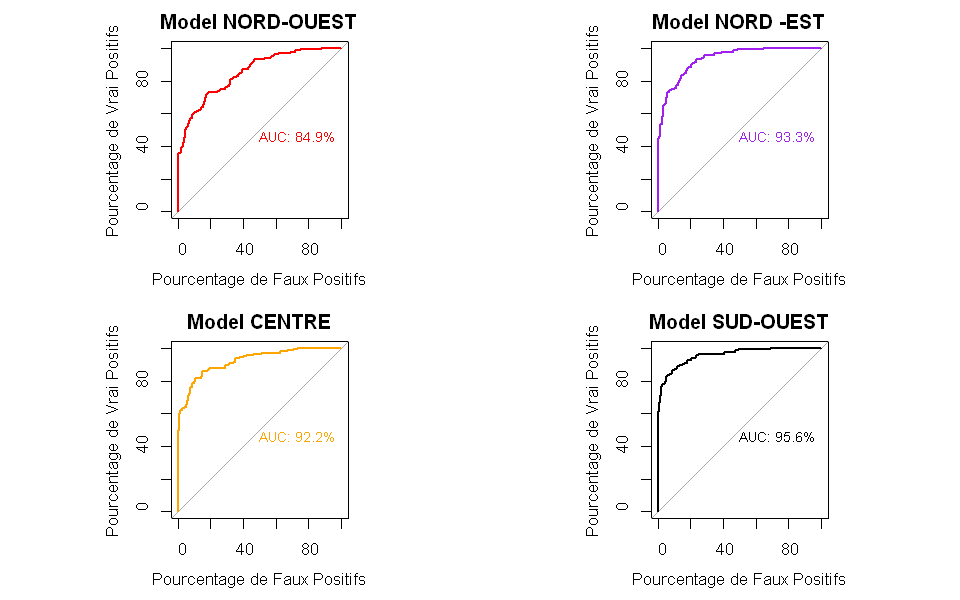

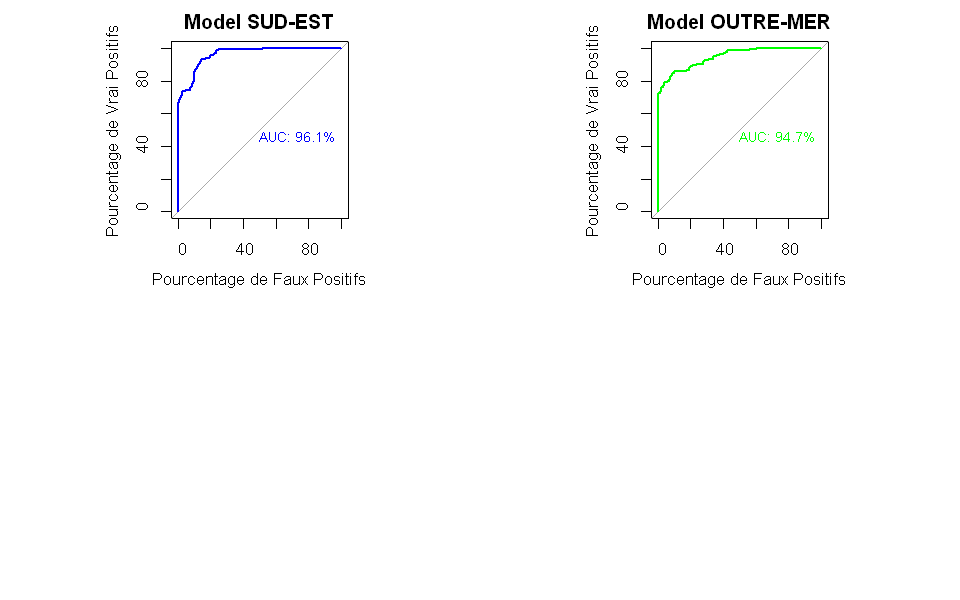

In [59]:
par(mfrow=c(2, 2), pty = "s")
roc1 <- roc(perte1$churn, score1, plot = TRUE, col = 'red', legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs', main = "Model NORD-OUEST")
roc1
roc2 <- roc(perte2$churn, score2, plot = TRUE, col = 'purple', legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs', main = "Model NORD -EST")
roc2
roc3 <- roc(perte3$churn, score3, plot = TRUE, col = 'orange', legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs',  main = "Model CENTRE")
roc3
roc4 <- roc(perte4$churn, score4, plot = TRUE, col = 'black', add = F, legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs', main = "Model SUD-OUEST")
roc4
roc5 <- roc(perte5$churn, score5, plot = TRUE, col = 'blue', add = F, legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs', main = "Model SUD-EST")
roc5
roc6 <- roc(perte6$churn, score6, plot = TRUE, col = 'green', add = F, legacy.axes = T, percent = T, print.auc = TRUE,
            xlab = 'Pourcentage de Faux Positifs', ylab = 'Pourcentage de Vrai Positifs', main = "Model OUTRE-MER")
roc6

<a href="#sommaire">Retour au sommaire</a>
## <span style='color:blue'>2. Test de prédiction du taux d'attribution.<a name="M22"></a>
### <span style='color:brown'>a) Programme.<a name="M221"></a>

In [45]:
attrition <- function(dataframe, model) 
{
    df <- dataframe[, -23]
    for (i in 1:nrow(df)) {
        score <- predict(model, df[i, -1], type = 'prob')[, 'oui']
        if (score > 0.5) {
            df[i, c('score', 'prediction')] <- c(score*100, 'oui')}
        else {
            df[i, c('score', 'prediction')] <- c(score*100, 'non')}
    }
    df$rank <- NA
    df$rank[order(df$score)] <- nrow(df):1
    df[, c('id_client', 'churn', 'score', 'prediction', 'rank')]
}

In [60]:
result_confusion <- function(dataframe, prediction)
{
    confusion <- table(prediction$prediction, dataframe$churn, dnn = c('Predit', 'Actuel'))
    sensibilite <- round(confusion[2, 2]/sum(confusion[, 2])*100, 2)
    cat(sprintf("Sensibilité: %s\n", sensibilite))
    specificite <- round(confusion[1, 1]/sum(confusion[, 1])*100, 2)
    cat(sprintf("Spécificité: %s\n", specificite))
    precision <- round(confusion[2, 2]/sum(confusion[2, ])*100, 2)
    cat(sprintf("Précision: %s\n", precision))
    F_score <- round(2*(precision*sensibilite)/(precision + sensibilite), 2)
    cat(sprintf("F-mesure: %s\n", F_score))
    confusion
}

<a href="#sommaire">Retour au sommaire</a>
### <span style='color:brown'>b) Essai.<a name="M222"></a>

In [61]:
test_branche1 <- test[which(test$branche == 'NORD-OUEST'),]
essai1 <- attrition(test_branche1, model1)
essai1

,id_client,churn,score,prediction,rank
2203,1223,oui,61.1383985751386,oui,18
2244,1685,non,54.5915735540204,oui,26
2260,6126,oui,67.0134717182463,oui,8
2265,4064,non,46.338903301967,non,28
2297,3642,non,66.1795740282965,oui,11
2323,4625,non,61.2926028479948,oui,17
2337,1970,oui,39.8388642768005,non,35
2366,3178,oui,38.7583218268448,non,36
...,...,...,...,...,...
3038,2074,oui,63.6237921341191,oui,14


In [62]:
result_confusion(test_branche1, essai1)

Sensibilité: 32.35
Spécificité: 31.58
Précision: 45.83
F-mesure: 37.93


      Actuel
Predit non oui
   non   6  23
   oui  13  11

In [63]:
test_branche2 <- test[which(test$branche == 'NORD-EST'),]
essai2 <- attrition(test_branche2, model2)
essai2

,id_client,churn,score,prediction,rank
2202,532,non,8.7334067444071,non,45
2208,2014,non,0.192850470782994,non,176
2218,3783,non,0.133636390214643,non,181
2221,2436,non,24.0761746373232,non,117
2235,4616,non,0.332376210331284,non,172
2236,3845,oui,99.9999997154729,oui,16
2240,1862,non,1.74877654301617,non,155
2242,5873,non,4.63227966318586,non,88
...,...,...,...,...,...
3111,3947,non,1.89498432894645,non,152


In [64]:
result_confusion(test_branche2, essai2)

Sensibilité: 73.24
Spécificité: 91.15
Précision: 83.87
F-mesure: 78.2


      Actuel
Predit non oui
   non 103  19
   oui  10  52

In [65]:
test_branche3 <- test[which(test$branche == 'CENTRE'),]
essai3 <- attrition(test_branche3, model3)
essai3

,id_client,churn,score,prediction,rank
2204,1595,oui,93.7778527912924,oui,30
2211,5296,non,18.7204223598205,non,124
2215,2707,oui,99.9999996804034,oui,14
2216,2197,non,4.77941555448212,non,92
2222,1162,non,2.02106047635377,non,122
2223,4772,non,4.30107151929437,non,96
2225,973,oui,6.03448286139013,non,71
2228,1772,oui,99.999989302389,oui,28
...,...,...,...,...,...
3089,3305,non,51.0441226524384,oui,80


In [66]:
result_confusion(test_branche3, essai3)

Sensibilité: 78.79
Spécificité: 89.11
Précision: 82.54
F-mesure: 80.62


      Actuel
Predit non oui
   non  90  14
   oui  11  52

In [67]:
test_branche4 <- test[which(test$branche == 'SUD-OUEST'),]
essai4 <- attrition(test_branche4, model4)
essai4

,id_client,churn,score,prediction,rank
2201,4181,non,19.2002580414262,non,115
2206,1509,oui,78.3353900771663,oui,52
2207,3130,non,12.16491107863,non,128
2210,1008,oui,29.6796008471377,non,103
2214,6928,non,8.42181060603226,non,50
2224,5815,oui,3.19353352395394,non,101
2226,5289,non,3.53804018452097,non,96
2233,6977,non,3.83506371856411,non,94
...,...,...,...,...,...
3066,2514,oui,92.4314121628982,oui,34


In [68]:
result_confusion(test_branche4, essai4)

Sensibilité: 72.6
Spécificité: 90.53
Précision: 85.48
F-mesure: 78.52


      Actuel
Predit non oui
   non  86  20
   oui   9  53

In [69]:
test_branche5 <- test[which(test$branche == 'SUD-EST'),]
essai5 <- attrition(test_branche5, model5)
essai5

,id_client,churn,score,prediction,rank
2205,3893,non,74.7288524669999,oui,41
2209,380,non,0.00502810297525189,non,186
2212,6138,non,2.45897890079447,non,119
2213,6147,non,10.942737352251,non,131
2217,672,oui,81.2362342225658,oui,36
2227,3815,oui,85.1162469395832,oui,33
2231,3491,non,3.44701093911326,non,106
2232,3010,non,7.76928243410512,non,47
...,...,...,...,...,...
3088,2031,non,0.188856667638682,non,165


In [70]:
result_confusion(test_branche5, essai5)

Sensibilité: 77.61
Spécificité: 91.6
Précision: 83.87
F-mesure: 80.62


      Actuel
Predit non oui
   non 109  15
   oui  10  52

In [71]:
test_branche6 <- test[which(test$branche == 'OUTRE-MER'),]
essai6 <- attrition(test_branche6, model6)
essai6

,id_client,churn,score,prediction,rank
2219,3922,non,0.69611353464545,non,147
2220,6602,non,1.19851947614347,non,142
2229,1742,oui,12.6643841412121,non,125
2230,1114,non,29.3755994864329,non,92
2238,3536,non,16.8436970020227,non,118
2249,226,non,0.0660443161393155,non,165
2264,947,non,0.0899190159338612,non,163
2266,638,oui,4.80890891508623,non,76
...,...,...,...,...,...
3085,1328,non,36.6923710567948,non,81


In [72]:
result_confusion(test_branche6, essai6)

Sensibilité: 68.85
Spécificité: 89.62
Précision: 79.25
F-mesure: 73.68


      Actuel
Predit non oui
   non  95  19
   oui  11  42

Dans notre cas, imaginons que les clients qui sont prédits positifs se voient proposer une réduction de tarif. On peut alors schématiquement envisager deux stratégies opposées :

Stratégie “ne pas perdre de clients” : on veut détecter la majorité des clients en partance. On choisit donc une sensibilité élevée, quitte à être peu précis et proposer des réductions de tarif à des clients qui n’allaient pas partir.

Stratégie “ne pas perdre de marges” : on veut éviter de proposer des réductions de tarif à des clients qui n’avaient pas l’intention de résilier, ce qui génère une perte de marge. On cherche donc à avoir un nombre de faux positifs faibles, ce qui coïncide avec une spécificité élevée. Mais notons que la précision est un meilleur indicateur pour mener cette stratégie, car on cherche à être précis sur les prédictions de résiliations, là où la spécificité traduit le taux de non-résiliations correctement prédites.

<a href="#sommaire">Retour au sommaire</a>